# Wildfire & Crop Monitoring using Remote Sensing and Machine Learning

## UMBC Data Science Master Degree by Dr. Chaojie Wang
## Authors: Akhil Kanukula, Sanjay Varatharajan

## Introduction

##### Wildfires and agricultural productivity are two pressing challenges with direct impacts on food security, climate change, and economic stability. The increasing frequency and intensity of wildfires, often exacerbated by drought, heatwaves, and land-use changes, have led to devastating losses of crops, ecosystems, and infrastructure. Simultaneously, monitoring crop health and yield is vital for managing supply chains, ensuring farmer profitability, and supporting policy decisions.

##### This project aims to leverage satellite remote sensing data and machine learning techniques to develop a Wildfire & Crop Monitoring Platform. The platform will integrate geospatial datasets such as NASA FIRMS wildfire data, Sentinel-2 multispectral imagery, and ERA5 reanalysis climate variables to provide insights into:

##### Wildfire detection and risk prediction (fire hotspots, burned area mapping, and environmental drivers).

##### Crop monitoring and yield estimation (vegetation indices such as NDVI/EVI, drought stress, and climate effects).

##### By combining exploratory data analysis (EDA), predictive modeling, and geospatial visualization, the project will demonstrate how data-driven approaches can help stakeholders—including farmers, policymakers, and emergency response teams—make timely and informed decisions. Ultimately, the system has the potential to scale into a web-based decision-support platform, enabling real-world applications such as early warning systems and agricultural advisories.

## Background

##### Wildfires and agricultural monitoring are critical concerns in today’s world due to their economic, environmental, and social impacts. In recent years, climate change has intensified drought conditions, altered precipitation patterns, and increased the frequency of extreme weather events, all of which contribute to higher wildfire risks and fluctuating crop yields.

##### According to NASA and the FAO (Food and Agriculture Organization), wildfires burn an estimated 400 million hectares of land annually, destroying crops, forests, and biodiversity. At the same time, agriculture faces growing pressure to feed an expanding global population under increasingly uncertain climate conditions. Early detection of wildfires and accurate assessment of crop health are therefore essential for disaster management, food security, and sustainable resource allocation.

## Why Does This Matter?

##### Economic Impact: Crop losses and wildfire damages can cost billions annually. Farmers, insurers, and governments need reliable forecasting tools to mitigate these losses.

##### Food Security: Crop monitoring ensures stable yields, supports trade decisions, and helps identify potential shortages.

##### Climate Change Adaptation: Both wildfire patterns and crop health are climate-sensitive. Understanding these dynamics supports adaptation strategies.

##### Public Safety: Timely wildfire detection can save lives and reduce property loss.

## Research Questions

##### This project will focus on the following research questions:

##### How can remote sensing data be used to detect and predict wildfire risks in near real-time?

##### What vegetation and climate indicators are most predictive of crop health and yield variation?

##### Can machine learning models trained on geospatial data provide accurate, scalable, and actionable insights for wildfire and agricultural monitoring?

##### How can these insights be integrated into a web-based decision-support platform for use by farmers, policymakers, and emergency response teams?

## Modules Installed

In [2]:
#!pip install xarray netCDF4


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 17.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 43.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#!pip install netCDF4



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install rasterio numpy matplotlib

  Using cached rasterio-1.4.3-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached click-8.3.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
Using cached rasterio-1.4.3-cp312-cp312-win_amd64.whl (25.4 MB)
Using cached click-8.3.0-py3-none-any.whl (107 kB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl (11 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install h5py

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 28.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")

## Data 

##### Versioned downloads: All fetch scripts live in a Git repo; params (AOI, date range, collection IDs) documented alongside.

##### Zero-prompt auth: _netrc at C:\Users\Sanjay\\_netrc enables non-interactive curl/wget to Earthdata (uses app password, not primary password).

##### Pre-approved DAAC apps: LP DAAC / NSIDC / LAADS authorized once in Earthdata Login to prevent redirect loops.

##### Robust transfers: curl -L --fail --retry 5 --continue-at - --netrc-file "$HOME/_netrc" (or wget --continue --tries=5 --save-cookies …) to auto-resume and follow redirects.

##### Structured outputs: D:\606Data\<DATASET>\Data\ plus logs\download_success.log and logs\download_failure.log.

##### Safety: _netrc, cookies.txt, and any secrets are .gitignored and never committed.

##### Special case (MODIS HDF4): Convert via conda run -n geo gdal_translate → GeoTIFF; process GeoTIFFs in the main Python 3.12 environment.

##### Reproducibility: Keep urls.txt and a small PARAMS.md (time window: 2024-07-20→2024-08-20; AOI: California) to exactly recreate the pull.

**Earthdata `.netrc` (redacted)**

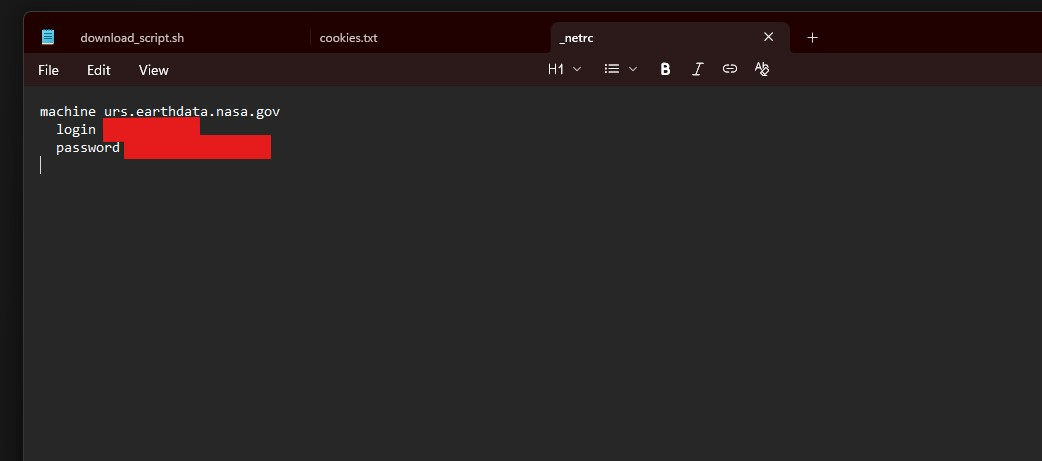

In [1]:
from IPython.display import Image, display, Markdown
display(Markdown("**Earthdata `.netrc` (redacted)**"))
display(Image(filename=r"C:\Users\sanjay\Desktop\netrc Picture.jpg"))  


**NASA Earthdata Website**

'https://search.earthdata.nasa.gov/'

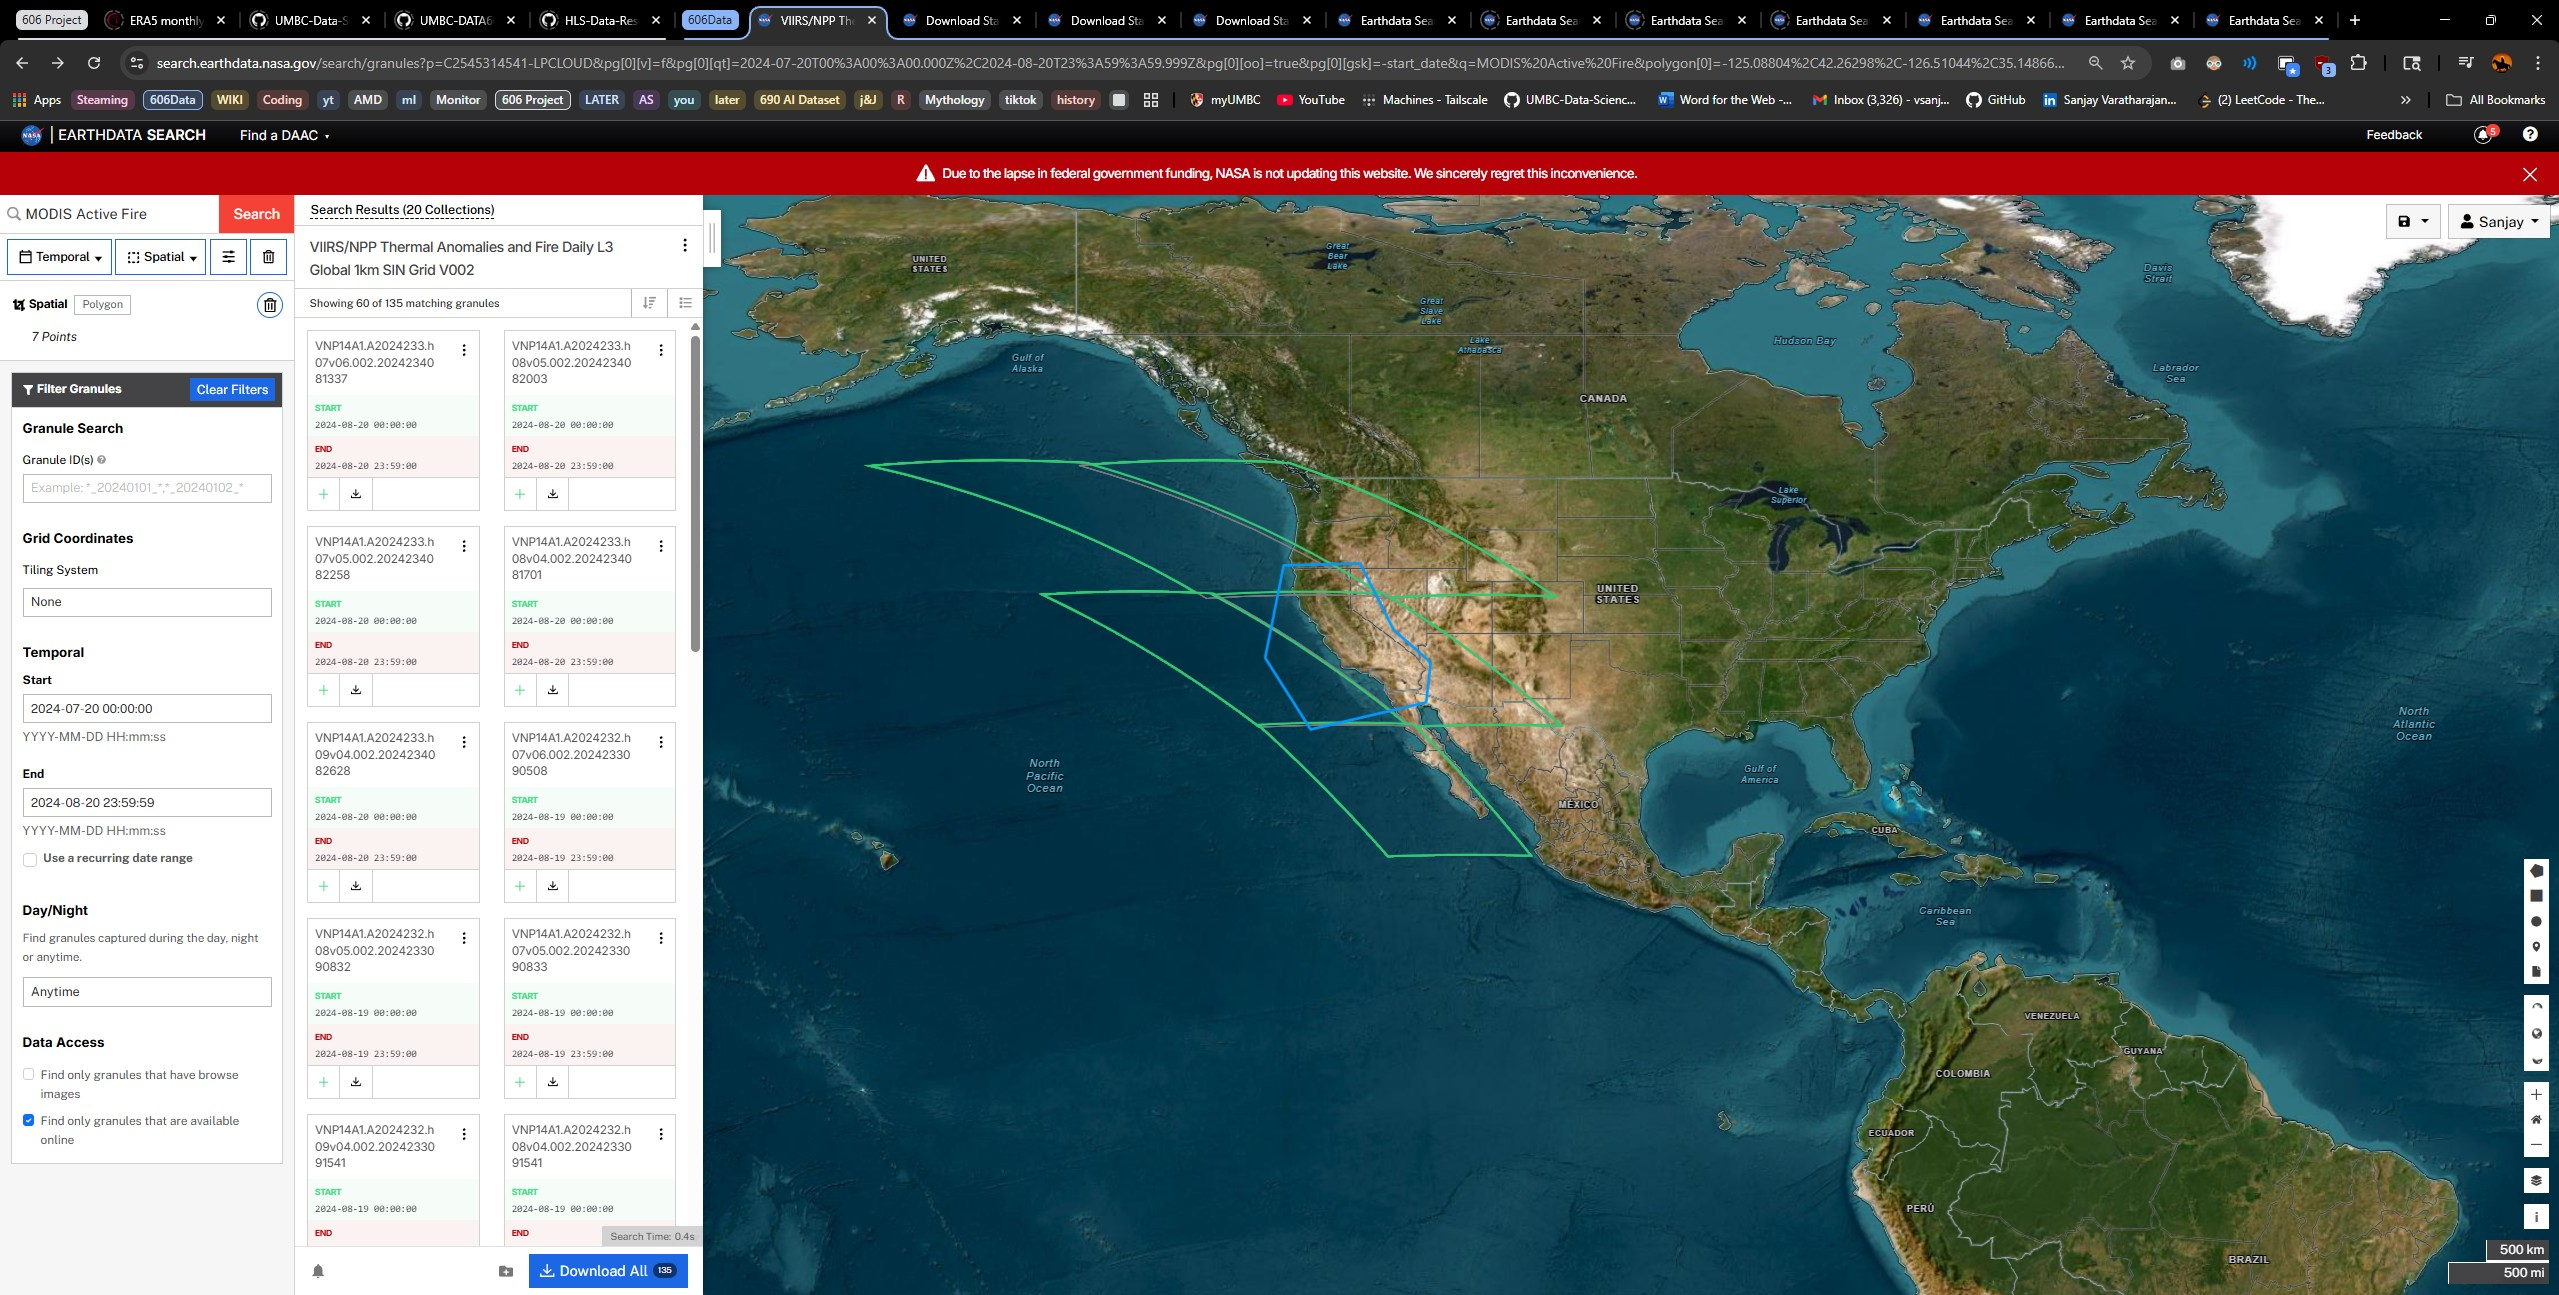

In [8]:
from IPython.display import Image, display, Markdown
display(Markdown("**NASA Earthdata Website**"))
display("https://search.earthdata.nasa.gov/")
display(Image(filename=r"C:\Users\sanjay\Desktop\NASA_Website.jpg"))  


**Climate Data Store Website**

'https://cds.climate.copernicus.eu/'

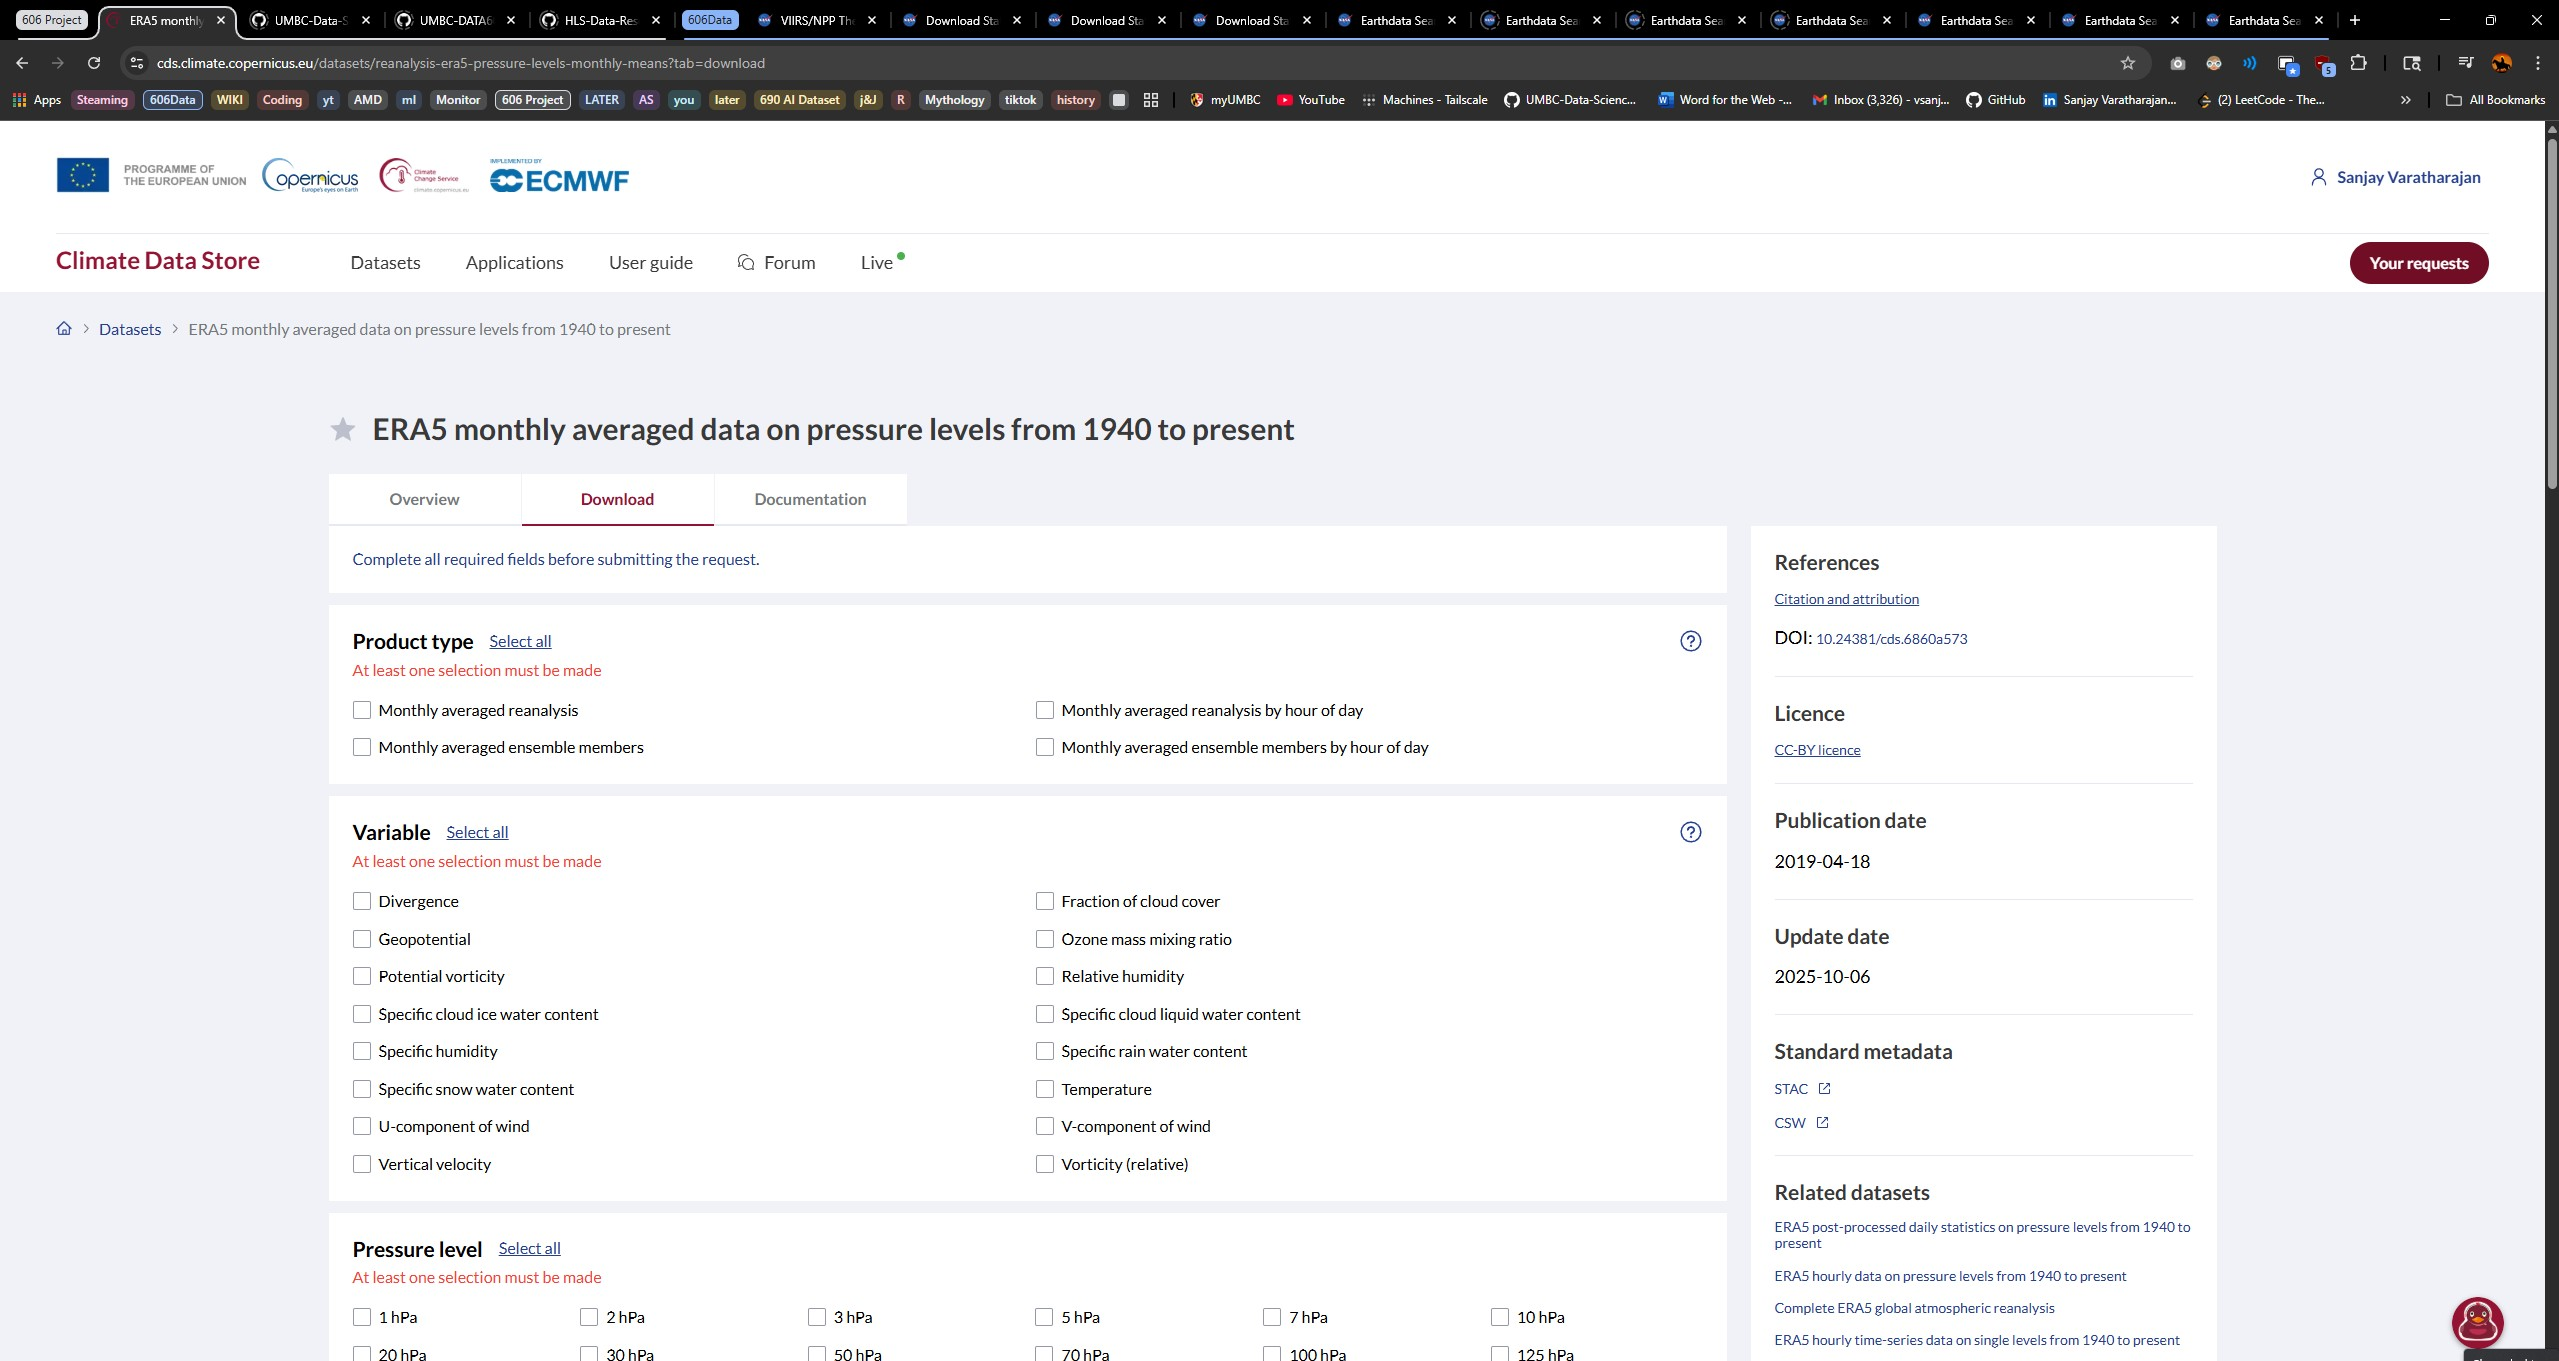

In [7]:
from IPython.display import Image, display, Markdown
display(Markdown("**Climate Data Store Website**"))
display("https://cds.climate.copernicus.eu/")
display(Image(filename=r"C:\Users\sanjay\Desktop\Climate_Data_Store_Website_Picture.jpg"))  


### ERA5

<xarray.Dataset> Size: 116MB
Dimensions:         (valid_time: 2, pressure_level: 2, latitude: 721,
                     longitude: 1440)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 16B 2024-07-01 2024-08-01
  * pressure_level  (pressure_level) float64 16B 1e+03 850.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          (valid_time) <U4 32B ...
Data variables:
    cc              (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    z               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    r               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    t               (valid_time, pressure_level, latitude, longitude) float32 17MB ...
    u               (valid_tim

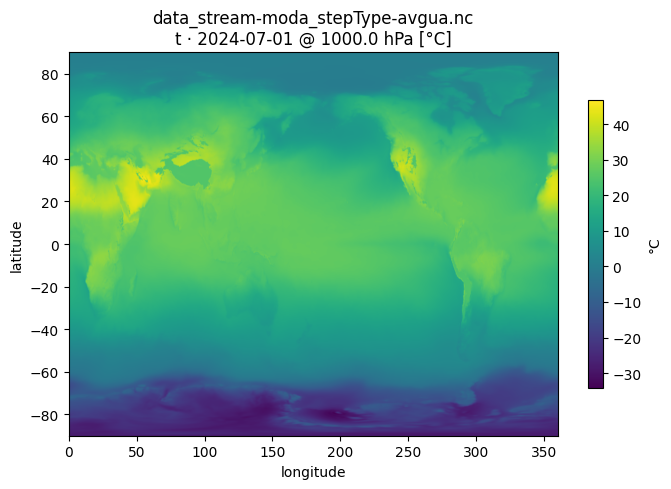

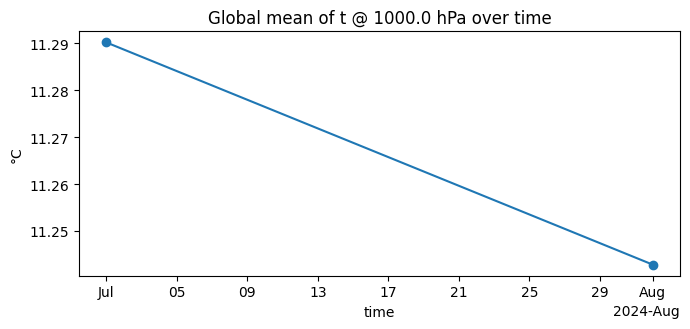

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

FILE = r"D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\data_stream-moda_stepType-avgua.nc"

ds = None
xr_err = None
try:
    import xarray as xr
    ds = xr.open_dataset(FILE)
except Exception as e:
    xr_err = e

if ds is None:
    from netCDF4 import Dataset as NC4Dataset
    nc = NC4Dataset(FILE, "r")
    print("Opened with netCDF4. Global attributes:")
    for k in nc.ncattrs():
        print(f"  - {k}: {getattr(nc, k)}")
    print("\nVariables:")
    for name, var in nc.variables.items():
        print(f"  - {name}: shape={getattr(var, 'shape', None)}, dtype={getattr(var,'dtype',None)}")
    nc.close()
    raise SystemExit(f"Tip: install xarray for easier analysis. xarray error was: {xr_err}")

print(ds)                    
print("\nGlobal attributes:")
for k,v in ds.attrs.items():
    print(f"  {k}: {v}")

PREFERRED = ("t","u","v","q","r","z","cc")
def pick_science_var(ds):
    for name in PREFERRED:
        if name in ds.data_vars:
            return name
    best_name, best_n = None, -1
    for name, da in ds.data_vars.items():
        if np.issubdtype(da.dtype, np.number) and 2 <= da.ndim <= 4:
            n = int(np.prod(da.shape))
            if n > best_n:
                best_name, best_n = name, n
    return best_name

var_name = pick_science_var(ds)
if var_name is None:
    print("⚠️ No suitable numeric variable found. Variables present:")
    for k, v in ds.data_vars.items():
        print(f"  - {k}: dtype={v.dtype}, dims={v.dims}, shape={tuple(v.shape)}")
else:
    print(f"\nPicked variable: {var_name}")

da = ds[var_name]

def _find(name_list, candidates):
    return next((c for c in candidates if c.lower() in name_list), None)

lat_name = _find({"lat","latitude"}, da.coords)
lon_name = _find({"lon","longitude"}, da.coords)
time_name = _find({"time"}, da.coords)

LEVEL = 1000.0   
TIME_INDEX = 0    

sel_kwargs = {}
if "valid_time" in da.dims:
    sel_kwargs["valid_time"] = da["valid_time"][TIME_INDEX]
if "pressure_level" in da.dims:
    levels = da["pressure_level"].values
    if float(LEVEL) in levels:
        sel_kwargs["pressure_level"] = float(LEVEL)
    else:
        # fall back to the first available level
        sel_kwargs["pressure_level"] = float(levels[0])
da2 = da.sel(**sel_kwargs) if sel_kwargs else da
while da2.ndim > 2:
    d0 = da2.dims[0]
    mid = da2.sizes[d0] // 2
    da2 = da2.isel({d0: mid})

title_unit = da2.attrs.get("units", "")
if var_name == "t":  
    da2 = da2 - 273.15
    title_unit = "°C"

arr = np.array(da2.values, dtype=np.float32)
arr = np.where(np.isfinite(arr), arr, np.nan)
print("\nQuick stats (2D slice):")
print(f"  min={np.nanmin(arr):.4f}, max={np.nanmax(arr):.4f}, mean={np.nanmean(arr):.4f}, std={np.nanstd(arr):.4f}")

extent = None
if lat_name and lon_name and da2[lat_name].ndim == 1 and da2[lon_name].ndim == 1:
    lat = da2[lat_name].values
    lon = da2[lon_name].values
    extent = [lon.min(), lon.max(), lat.min(), lat.max()]

plt.figure(figsize=(7,5))
if extent is not None:
    plt.imshow(arr, origin="upper", extent=extent, aspect="auto")
    plt.xlabel(lon_name or "lon"); plt.ylabel(lat_name or "lat")
else:
    plt.imshow(arr, origin="upper", aspect="equal")
    plt.xlabel("x"); plt.ylabel("y")

t_text = ""
if "valid_time" in sel_kwargs:
    t_val = np.datetime_as_string(sel_kwargs["valid_time"].values, unit="D")
    t_text += f" · {t_val}"
if "pressure_level" in sel_kwargs:
    t_text += f" @ {sel_kwargs['pressure_level']} hPa"

plt.title(Path(FILE).name + f"\n{var_name}{t_text} [{title_unit}]")
plt.colorbar(shrink=0.75, label=title_unit)
plt.tight_layout()
plt.show()

if "valid_time" in da.dims:
    ts = da
    if "pressure_level" in da.dims:
        ts = ts.sel(pressure_level=sel_kwargs.get("pressure_level", float(da["pressure_level"].values[0])))
    ts = ts.mean(dim=[d for d in ts.dims if d != "valid_time"], skipna=True)
    if var_name == "t":
        ts = ts - 273.15
    plt.figure(figsize=(7,3.4))
    ts.plot(marker="o")
    plt.title(f"Global mean of {var_name}" + (f" @ {sel_kwargs.get('pressure_level')} hPa" if "pressure_level" in da.dims else "") + " over time")
    plt.ylabel("°C" if var_name == "t" else da.attrs.get("units", ""))
    plt.tight_layout()
    plt.show()
ds.close()

### HLS (GeoTIFF: surface reflectance & masks)

Found 3 GeoTIFFs (showing 3).

HLS-VI.S30.T10SDG.2024229T184919.v2.0.EVI.tif
  shape: (3660, 3660) crs: EPSG:32610 dtype(raw): int16 nodata(raw): -19999.0
  scale_used: 0.0001
  scaled stats: {'min': -0.27070000767707825, 'max': 0.241799995303154, 'mean': -0.004124258179217577}


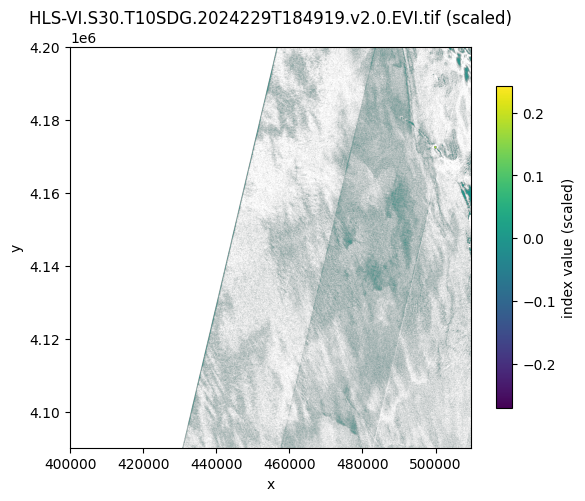


HLS-VI.S30.T10SDG.2024229T184919.v2.0.MSAVI.tif
  shape: (3660, 3660) crs: EPSG:32610 dtype(raw): int16 nodata(raw): -19999.0
  scale_used: 0.0001
  scaled stats: {'min': -0.11409999430179596, 'max': 0.2248999923467636, 'mean': -0.003278027754276991}


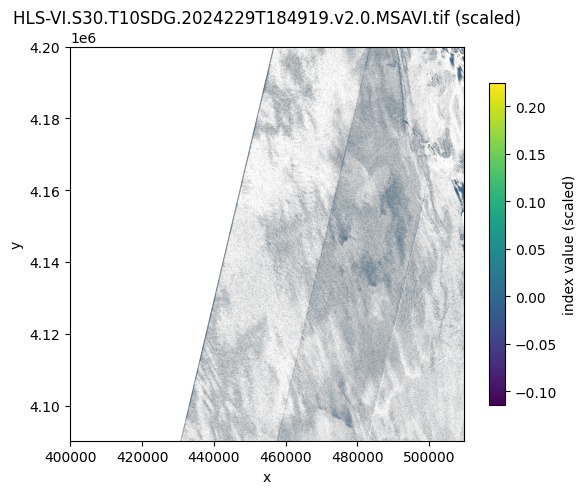


HLS-VI.S30.T10SDG.2024229T184919.v2.0.NBR.tif
  shape: (3660, 3660) crs: EPSG:32610 dtype(raw): int16 nodata(raw): -19999.0
  scale_used: 0.0001
  scaled stats: {'min': -0.9861999750137329, 'max': 0.7410999536514282, 'mean': -0.7138984203338623}


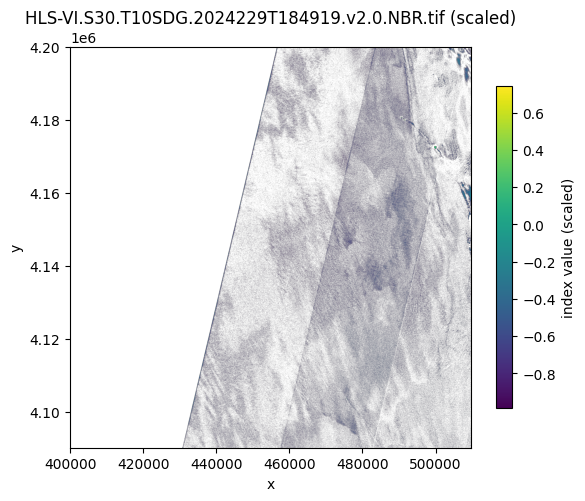

In [5]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import plotting_extent

HLS_DIR = Path(r"D:\606Data\HLS_Dataset")   
SAMPLE = 3                                   
DEFAULT_SCALE = 1e-4                          
FILL_VALUES = {-9999, -19999}                

def read_hls_vi_band(ds):
    """
    Reads band-1 as float32, masks fill values, applies scale.
    Returns (arr_scaled, scale_used).
    """
    arr = ds.read(1).astype("float32")

    fills = set(FILL_VALUES)
    if ds.nodata is not None:
        try:
            if float(ds.nodata) <= -9000:
                fills.add(float(ds.nodata))
        except Exception:
            pass
    if fills:
        mask = np.isin(arr, list(fills))
        arr[mask] = np.nan
    scale_used = DEFAULT_SCALE
    try:
        t = ds.tags()
        for k in ("SCALE", "scale", "Scale", "scale_factor", "SCALE_FACTOR"):
            if k in t:
                scale_used = float(t[k])
                break
        if hasattr(ds, "scales") and ds.scales and ds.scales[0] not in (None, 0, 1):
            scale_used = float(ds.scales[0])
    except Exception:
        pass
    arr *= scale_used
    return arr, scale_used

tifs = sorted([p for p in HLS_DIR.rglob("*.tif")])[:SAMPLE]
print(f"Found {len(tifs)} GeoTIFFs (showing {len(tifs)}).")

for fp in tifs:
    with rasterio.open(fp) as ds:
        arr_scaled, scale_used = read_hls_vi_band(ds)
        valid = arr_scaled[~np.isnan(arr_scaled)]
        stats = {
            "min": float(np.nanmin(valid)) if valid.size else None,
            "max": float(np.nanmax(valid)) if valid.size else None,
            "mean": float(np.nanmean(valid)) if valid.size else None,
        }
        print(f"\n{fp.name}")
        print("  shape:", (ds.height, ds.width),
              "crs:", ds.crs,
              "dtype(raw):", ds.dtypes[0],
              "nodata(raw):", ds.nodata)
        print(f"  scale_used: {scale_used}")
        print("  scaled stats:", stats)

        fig, ax = plt.subplots(figsize=(6, 5))
        extent = plotting_extent(ds)
        im = ax.imshow(arr_scaled, extent=extent, origin="upper", aspect="equal")
        ax.set_title(f"{fp.name} (scaled)")
        ax.set_xlabel("x"); ax.set_ylabel("y")
        cbar = fig.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label("index value (scaled)")
        plt.tight_layout()
        plt.show()

### VIIRS L2 Active Fires (375 m) — robust inspector & plotter

Found 2 VIIRS files (showing 2).

=== VNP14IMG.A2024202.0948.002.2024213180147.nc ===
  detections plotted: 1662
  color var: FP_power (unit=MW)  min=0.222  max=157.400  mean=5.932


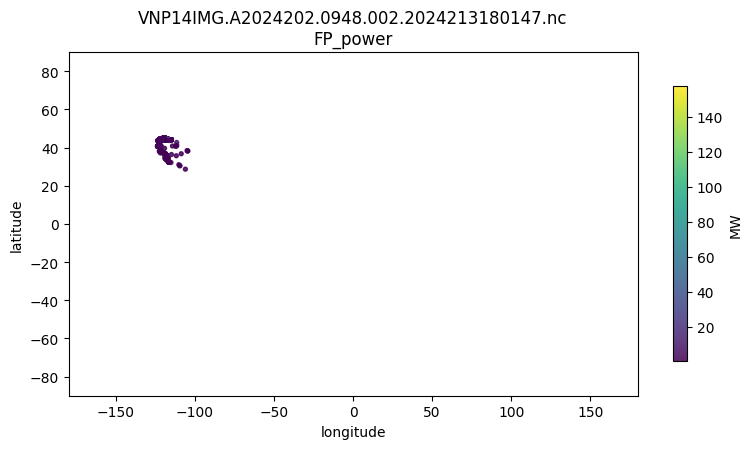


Table preview (first 20 rows):


latitude   longitude  confidence       FRP     Rad13          T4  \
0   45.013725 -119.176033         8.0  2.244241  1.223896  298.109894   
1   45.013065 -119.171227         8.0  2.244241  1.223896  308.979309   
2   45.009724 -119.172256         8.0  2.244241  1.223896  339.417297   
3   45.010387 -119.177101         8.0  2.244241  1.223896  302.848907   
4   45.006397 -119.173416         8.0  5.596195  2.370690  354.152496   
5   45.007069 -119.178307         8.0  5.596195  2.370690  311.019318   
6   45.003746 -119.179466         8.0  5.596195  2.370690  321.430389   
7   45.003059 -119.174522         8.0  5.596195  2.370690  347.826538   
8   45.004417 -119.184357         8.0  1.826275  0.596314  306.143646   
9   45.000404 -119.180519         8.0  3.543900  1.668703  333.728424   
10  44.999706 -119.175476         8.0  3.543900  1.668703  327.437134   
11  45.001076 -119.185425         8.0  1.387290  0.798499  311.917389   
12  45.001110 -119.211037         8.0  3.051391  0.688510  333.869690   
13  44.997059 -119.181541         8.0  3.543900  1.668703  335.849945   
14  45.001823 -119.216209         8.0  1.553185  0.570434  301.412384   
15  44.998398 -119.191307         8.0  1.387290  0.798499  304.047089   
16  44.997734 -119.186485         8.0  1.387290  0.798499  313.106781   
17  44.996361 -119.176491         8.0  3.543900  1.668703  313.258057   
18  44.998497 -119.217384         8.0  6.327569  1.537688  332.035980   
19  44.993702 -119.182556         8.0  5.781779  1.455196  343.498566   

            T5  WinSize      SolZen      SolAz    ViewZen      ViewAz  \
0   286.871216     10.0  110.239998  26.170000  12.880000  102.389999   
1   291.299988     10.0  110.239998  26.180000  12.849999  102.399994   
2   296.636353      0.0  110.239998  26.180000  12.849999  102.269997   
3   290.972382     10.0  110.239998  26.170000  12.880000  102.259995   
4   297.610809      0.0  110.250000  26.180000  12.849999  102.139999   
5   292.413330     10.0  110.250000  26.170000  12.880000  102.129997   
6   292.715485      0.0  110.250000  26.170000  12.880000  102.000000   
7   296.892609      0.0  110.250000  26.180000  12.849999  102.009995   
8   291.489899     10.0  110.250000  26.170000  12.910000  101.989998   
9   293.794525      0.0  110.250000  26.170000  12.880000  101.869995   
10  289.510590      0.0  110.250000  26.170000  12.849999  101.869995   
11  291.843994     10.0  110.250000  26.170000  12.910000  101.860001   
12  292.113525      0.0  110.259995  26.139999  13.059999  101.699997   
13  296.591614      0.0  110.259995  26.170000  12.880000  101.739998   
14  290.408661     10.0  110.259995  26.139999  13.090000  101.699997   
15  291.003632     10.0  110.259995  26.160000  12.940000  101.729996   
16  292.478149     10.0  110.259995  26.160000  12.910000  101.729996   
17  290.509094     10.0  110.259995  26.170000  12.849999  101.739998   
18  292.943115      0.0  110.269997  26.139999  13.090000  101.570000   
19  295.539978      0.0  110.259995  26.170000  12.880000  101.610001   

    DayOfYear  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  
10        0.0  
11        0.0  
12        0.0  
13        0.0  
14        0.0  
15        0.0  
16        0.0  
17        0.0  
18        0.0  
19        0.0

Saved table → D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002\Data\VNP14IMG.A2024202.0948.002.2024213180147.nc.detections.csv

=== VNP14IMG.A2024202.1124.002.2024213180133.nc ===
  detections plotted: 1180
  color var: FP_power (unit=MW)  min=0.402  max=94.716  mean=4.492


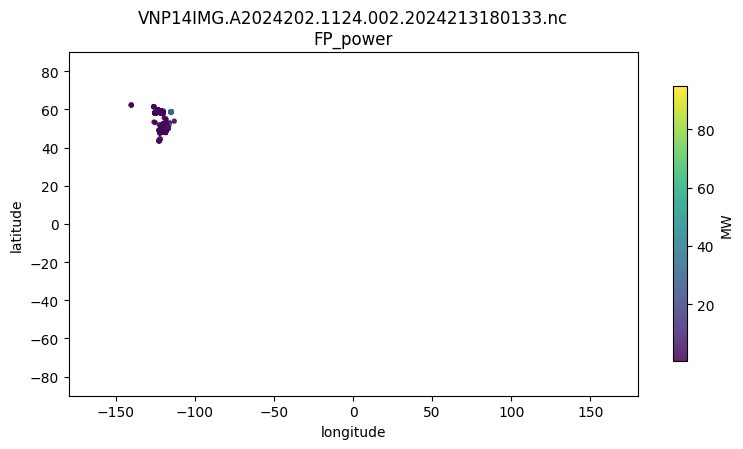


Table preview (first 20 rows):


latitude   longitude  confidence        FRP     Rad13          T4  \
0   58.781475 -115.146660         7.0  46.352467  8.022169  357.149841   
1   58.779427 -115.140953         7.0  46.352467  8.022169  357.198273   
2   58.774700 -115.146660         9.0  46.352467  8.022169  367.000000   
3   58.778778 -115.158028         7.0  94.715607  5.587860  358.059906   
4   58.772644 -115.140938         7.0  52.041512  3.310447  358.103302   
5   58.773907 -115.163368         9.0  55.095074  6.433803  367.000000   
6   58.775841 -115.168755         7.0  55.095074  6.433803  357.179016   
7   58.771927 -115.157822         7.0  47.723213  8.246999  357.179016   
8   58.767803 -115.146347         7.0  24.412096  5.785192  357.179016   
9   58.765774 -115.140678         7.0  24.412096  5.785192  357.053375   
10  58.758923 -115.140518         9.0  28.603861  3.603211  367.000000   
11  58.756962 -115.135048         9.0  28.603861  3.603211  367.000000   
12  58.748608 -115.111839         9.0  48.121578  3.140611  367.000000   
13  58.746567 -115.106171         9.0  20.225452  2.741093  367.000000   
14  58.744553 -115.100601         9.0  20.225452  2.741093  367.000000   
15  58.767002 -115.162987         7.0  47.723213  8.246999  357.156830   
16  58.764935 -115.157234         7.0  47.723213  8.246999  357.167938   
17  58.762863 -115.151474         7.0  24.412096  5.785192  357.156830   
18  58.760868 -115.145912         7.0  24.412096  5.785192  357.167938   
19  58.758022 -115.156883         9.0  35.288116  6.225147  367.000000   

            T5  WinSize     SolZen      SolAz    ViewZen     ViewAz  DayOfYear  
0   287.741638      0.0  89.070000  49.509998  57.789997 -55.389999        1.0  
1   286.550415      0.0  89.070000  49.509998  57.799999 -55.379997        1.0  
2   294.445923      0.0  89.070000  49.509998  57.799999 -55.349998        1.0  
3   285.716614      0.0  89.079994  49.500000  57.779999 -55.360001        1.0  
4   292.265076      0.0  89.070000  49.509998  57.820000 -55.349998        1.0  
5   293.773163      0.0  89.079994  49.500000  57.779999 -55.329998        1.0  
6   289.339630      0.0  89.079994  49.489998  57.770000 -55.340000        1.0  
7   297.723236      0.0  89.079994  49.500000  57.789997 -55.329998        1.0  
8   289.659149      0.0  89.079994  49.509998  57.820000 -55.320000        1.0  
9   285.474457      0.0  89.079994  49.509998  57.829998 -55.309998        1.0  
10  290.396118      0.0  89.079994  49.509998  57.840000 -55.279999        1.0  
11  290.427490      0.0  89.079994  49.520000  57.849998 -55.279999        1.0  
12  292.786285      0.0  89.079994  49.539997  57.899998 -55.259998        1.0  
13  291.555206      0.0  89.079994  49.539997  57.919998 -55.250000        1.0  
14  293.262329      0.0  89.070000  49.549999  57.930000 -55.250000        1.0  
15  288.295929      0.0  89.089996  49.500000  57.789997 -55.299999        1.0  
16  288.662933      0.0  89.079994  49.500000  57.799999 -55.289997        1.0  
17  289.523224      0.0  89.079994  49.509998  57.820000 -55.289997        1.0  
18  289.450470      0.0  89.079994  49.509998  57.829998 -55.289997        1.0  
19  296.041443      0.0  89.089996  49.500000  57.820000 -55.259998        1.0

Saved table → D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002\Data\VNP14IMG.A2024202.1124.002.2024213180133.nc.detections.csv


In [8]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

VIIRS_DIR = Path(r"D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002")
SAMPLE = 2   
SHOW_ROWS = 20  

LAT_CANDS   = ["fp_latitude", "latitude", "lat"]
LON_CANDS   = ["fp_longitude", "longitude", "lon"]
COLOR_CANDS = ["fp_power","fp_frp","frp","power","fp_confidence","confidence","fp_rad13","fp_t4","fp_t5","fp_meant4","fp_meant5"]

TABLE_CAND_GROUPS = {
    "confidence": ["FP_confidence", "confidence"],
    "FRP":        ["FP_power", "FP_FRP", "FRP", "Power", "power"],
    "Rad13":      ["FP_Rad13"],
    "T4":         ["FP_T4", "FP_MeanT4"],
    "T5":         ["FP_T5", "FP_MeanT5"],
    "WinSize":    ["FP_WinSize"],
    "SolZen":     ["FP_SolZenAng"],
    "SolAz":      ["FP_SolAzAng"],
    "ViewZen":    ["FP_ViewZenAng"],
    "ViewAz":     ["FP_ViewAzAng"],
    "DayOfYear":  ["FP_day"],          
}

def pick_name(container_keys, candidates):
    """Return first key in container_keys that matches any candidate (case-insensitive), with fuzzy fallback."""
    low2orig = {str(k).lower(): k for k in container_keys}
    for cand in candidates:
        k = low2orig.get(cand.lower())
        if k: return k
    for k_low, k in low2orig.items():
        for cand in candidates:
            if cand.lower() in k_low:
                return k
    return None

def to_float(a):
    arr = np.array(a, dtype=np.float32).ravel()
    arr[~np.isfinite(arr)] = np.nan
    return arr

files = sorted(list(VIIRS_DIR.rglob("*.nc")))[:SAMPLE]
print(f"Found {len(files)} VIIRS files (showing {len(files)}).")

for fp in files:
    print(f"\n=== {fp.name} ===")
    ds = xr.open_dataset(fp, mask_and_scale=True)

    lat_name = pick_name(ds.variables, LAT_CANDS)
    lon_name = pick_name(ds.variables, LON_CANDS)
    if not (lat_name and lon_name):
        print("  ⚠️ Could not find latitude/longitude variables.")
        print("  Variables (first 25):", list(ds.variables)[:25], "...")
        ds.close()
        continue
    lat = to_float(ds[lat_name].values)
    lon = to_float(ds[lon_name].values)

    m = np.isfinite(lat) & np.isfinite(lon) & (lat >= -90) & (lat <= 90) & (lon >= -180) & (lon <= 180)

    color_name = pick_name(ds.data_vars, COLOR_CANDS)
    c = None
    unit = None
    if color_name:
        c = to_float(ds[color_name].values)
        c = c[:lat.size]  
        unit = ds[color_name].attrs.get("units")
        m = m & np.isfinite(c)
    else:
        pass

    lat, lon = lat[m], lon[m]
    if color_name:
        c = c[m]

    print(f"  detections plotted: {lat.size}")
    if color_name:
        v = c  
        if v.size:
            print(f"  color var: {color_name} (unit={unit})  "
                  f"min={float(np.nanmin(v)):.3f}  max={float(np.nanmax(v)):.3f}  mean={float(np.nanmean(v)):.3f}")
        else:
            print(f"  color var: {color_name} has no finite values; plotting uncolored points.")
            color_name, c, unit = None, None, None

    plt.figure(figsize=(8, 4.6))
    if c is None:
        plt.scatter(lon, lat, s=6, alpha=0.7)
        plt.title(f"{fp.name}\nVIIRS fire detections (points)")
    else:
        sc = plt.scatter(lon, lat, c=c, s=8, alpha=0.85)
        cb = plt.colorbar(sc, shrink=0.8)
        cb.set_label(unit or color_name)
        plt.title(f"{fp.name}\n{color_name}")
    plt.xlabel("longitude"); plt.ylabel("latitude")
    plt.xlim(-180, 180); plt.ylim(-90, 90)
    plt.tight_layout()
    plt.show()

    data = {
        "latitude":  lat,
        "longitude": lon,
    }

    for pretty, cands in TABLE_CAND_GROUPS.items():
        name = pick_name(ds.data_vars, cands)
        if name:
            col = to_float(ds[name].values)[:lat.size]  
            data[pretty] = col[m] if col.size >= m.size else col  

    if "time" in ds.variables:
        try:
            tvals = np.array(ds["time"].values).ravel()
            if tvals.size == 1:
                data["time"] = np.repeat(tvals[0], lat.size)
        except Exception:
            pass
    df = pd.DataFrame(data)
    df = df.dropna(subset=["latitude","longitude"])

    print(f"\nTable preview (first {SHOW_ROWS} rows):")
    display(df.head(SHOW_ROWS))
    out_csv = fp.with_suffix(fp.suffix + ".detections.csv")
    df.to_csv(out_csv, index=False)
    print(f"Saved table → {out_csv}")
    ds.close()

### VIIRS JPSS-1 Active Fires (VJ114IMG, 375 m) — scatter + table export

Sampling 2 JPSS-1 granule(s)...

=== VJ114IMG.A2024229.1942.002.2024230003533.nc ===


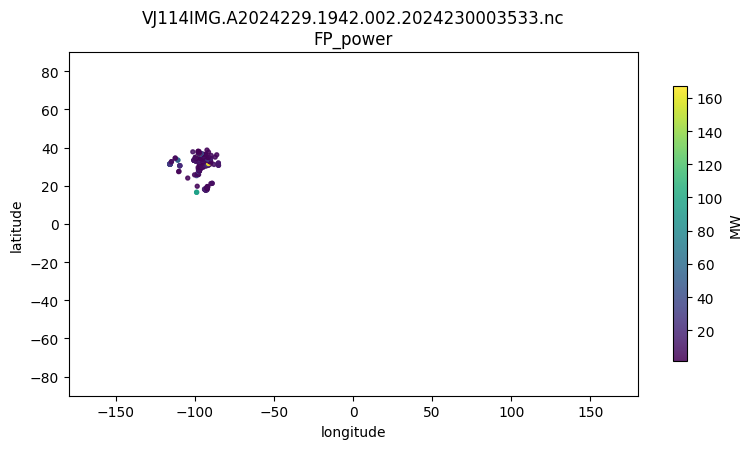

Previewing first 20 detections:


latitude  longitude  confidence        FRP      Rad13          T4  \
0   16.573105 -98.985771         7.0  95.816483  16.759802  207.934128   
1   16.576504 -98.986351         8.0  95.816483  16.759802  344.752197   
2   17.878777 -92.488899         8.0   4.617937   1.265951  332.746521   
3   17.894529 -92.491005         8.0  13.119839   1.663851  340.763702   
4   17.839802 -93.115166         8.0  19.921553   2.084396  338.352661   
5   17.839207 -93.118164         8.0  19.442719   2.081161  343.910553   
6   17.842999 -93.118683         8.0   8.464391   1.456813  336.326233   
7   17.842381 -93.123535         8.0  10.766913   1.607239  332.929016   
8   17.893518 -93.174904         8.0   7.426471   1.426081  336.602875   
9   17.892250 -93.184547         8.0  10.241082   1.600769  338.080505   
10  17.900444 -93.180763         8.0  47.437691   3.837745  352.805634   
11  17.869640 -93.498558         8.0   6.259677   1.293448  336.440308   
12  17.934175 -93.627640         8.0   7.601560   1.395349  335.116913   
13  17.942799 -93.647469         8.0  10.596327   1.621796  334.449066   
14  18.064636 -93.312088         8.0  12.931955   1.639589  346.373138   
15  18.276560 -93.459595         8.0   3.683080   1.126847  333.791016   
16  18.218882 -93.895386         8.0   5.602626   1.228749  335.873199   
17  18.204027 -94.006424         8.0  17.270554   1.791632  340.709534   
18  18.644615 -92.168427         8.0   7.592659   1.455196  347.954803   
19  18.644152 -92.172188         8.0   4.496976   1.236836  339.965088   

            T5  WinSize     SolZen       SolAz    ViewZen     ViewAz  \
0   289.145325      0.0  15.290000  -99.949997  15.509999  79.930000   
1   288.229767     10.0  15.290000  -99.970001  15.509999  80.029999   
2   299.616425     10.0  21.650000  -98.829994  35.259998 -98.029999   
3   299.191376     10.0  21.650000  -98.869995  35.259998 -98.229996   
4   296.563080     10.0  21.059999  -99.159996  31.379999 -98.869995   
5   297.716064     10.0  21.059999  -99.159996  31.410000 -97.320000   
6   295.363434     10.0  21.059999  -99.169998  31.410000 -97.369995   
7   296.091797     10.0  21.049999  -99.169998  31.379999 -97.369995   
8   298.589233     10.0  21.010000  -99.339996  31.099998 -98.220001   
9   298.057892     10.0  21.010000  -99.339996  31.029999 -98.220001   
10  298.266571     10.0  21.010000  -99.360001  31.070000 -98.329994   
11  293.411713     10.0  20.709999  -99.509995  28.980000 -98.639999   
12  294.288391     10.0  20.600000  -99.769997  28.230000 -98.269997   
13  294.781708     10.0  20.590000  -99.799995  28.109999 -98.459999   
14  297.577423     10.0  20.930000  -99.869995  30.469999 -97.849998   
15  290.986389     10.0  20.840000 -100.509995  29.809999 -98.110001   
16  288.025360     10.0  20.420000 -100.699997  26.859999 -98.269997   
17  276.204102     10.0  20.320000 -100.750000  26.090000 -98.309998   
18  296.181458     10.0  22.129999 -100.449997  38.009998 -97.500000   
19  297.118683     10.0  22.119999 -100.449997  37.989998 -97.500000   

    DayOfYear  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  
5         1.0  
6         1.0  
7         1.0  
8         1.0  
9         1.0  
10        1.0  
11        1.0  
12        1.0  
13        1.0  
14        1.0  
15        1.0  
16        1.0  
17        1.0  
18        1.0  
19        1.0


=== VJ114IMG.A2024222.1036.002.2024222164828.nc ===


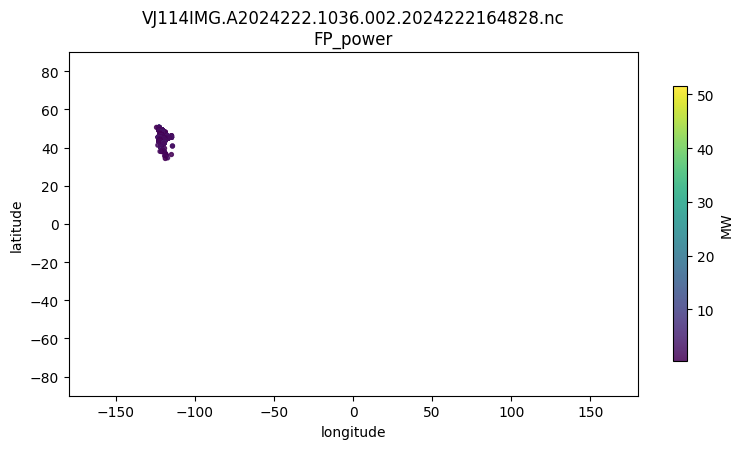

Previewing first 20 detections:


latitude   longitude  confidence        FRP     Rad13          T4  \
0   50.570770 -122.707397         8.0   2.675804  0.588226  325.782196   
1   50.569595 -122.701561         8.0   0.584924  0.494412  301.707367   
2   50.568180 -122.694557         8.0   0.584924  0.494412  296.914948   
3   50.567108 -122.707939         8.0  15.487331  2.671542  354.838196   
4   50.562794 -122.686668         8.0   4.170847  0.740269  329.082733   
5   50.565914 -122.702011         8.0   5.974089  2.174975  309.095947   
6   50.564445 -122.694771         8.0   5.974089  2.174975  314.460083   
7   50.563435 -122.708458         8.0  15.487331  2.671542  332.075897   
8   50.562233 -122.702507         8.0   5.974089  2.174975  337.929291   
9   50.560776 -122.695305         8.0   5.974089  2.174975  343.534119   
10  50.559811 -122.709198         8.0   3.717932  0.703067  324.544952   
11  50.558571 -122.703049         8.0   8.799114  3.012830  349.904022   
12  50.557167 -122.696136         8.0   8.799114  3.012830  342.327301   
13  50.554932 -122.703735         8.0   8.799114  3.012830  339.827820   
14  50.553574 -122.697037         8.0   8.799114  3.012830  341.373840   
15  50.592854 -124.352364         8.0   0.356080  0.487942  300.876038   
16  50.282646 -122.911415         8.0   2.856709  0.861580  330.353088   
17  50.281498 -122.905678         8.0   2.856709  0.861580  313.381714   
18  50.277882 -122.906410         8.0   1.110487  0.531614  303.148407   
19  50.215664 -122.691658         8.0   2.631965  0.785559  330.548523   

            T5  WinSize      SolZen      SolAz    ViewZen     ViewAz  \
0   287.477356      0.0  107.049995  35.230000  23.189999 -71.750000   
1   284.897675     10.0  107.049995  35.230000  23.219999 -71.739998   
2   286.064819     10.0  107.049995  35.239998  23.250000 -71.739998   
3   302.057709      0.0  107.049995  35.230000  23.189999 -71.680000   
4   291.825134      0.0  107.049995  35.250000  23.279999 -71.659996   
5   289.404694     10.0  107.049995  35.239998  23.219999 -71.669998   
6   289.303558     10.0  107.049995  35.239998  23.250000 -71.669998   
7   290.973877      0.0  107.059998  35.230000  23.189999 -71.599998   
8   296.792297      0.0  107.049995  35.239998  23.219999 -71.599998   
9   295.315216      0.0  107.049995  35.239998  23.250000 -71.599998   
10  287.967743      0.0  107.059998  35.230000  23.189999 -71.529999   
11  295.969208      0.0  107.059998  35.239998  23.219999 -71.529999   
12  294.582306      0.0  107.059998  35.239998  23.250000 -71.519997   
13  291.017517      0.0  107.059998  35.239998  23.219999 -71.449997   
14  293.790070      0.0  107.059998  35.239998  23.260000 -71.449997   
15  288.567505     10.0  107.610001  33.709999  15.339999 -73.750000   
16  291.620636      0.0  107.349998  35.110001  22.980000 -72.040001   
17  291.939545     10.0  107.349998  35.119999  23.010000 -72.040001   
18  290.464569     10.0  107.349998  35.119999  23.010000 -71.959999   
19  289.647675      0.0  107.329994  35.329998  24.150000 -71.489998   

    DayOfYear  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
5         0.0  
6         0.0  
7         0.0  
8         0.0  
9         0.0  
10        0.0  
11        0.0  
12        0.0  
13        0.0  
14        0.0  
15        0.0  
16        0.0  
17        0.0  
18        0.0  
19        0.0

In [11]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

VIIRS_DIR = Path(r"D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002")

SAMPLE_FILES = 2      
SHOW_ROWS = 20        

LAT_CANDS   = ["fp_latitude", "latitude", "lat"]
LON_CANDS   = ["fp_longitude", "longitude", "lon"]
COLOR_CANDS = ["fp_power","fp_frp","frp","power","fp_confidence","confidence","fp_rad13","fp_t4","fp_t5","fp_meant4","fp_meant5"]

TABLE_CAND_GROUPS = {
    "confidence": ["FP_confidence", "confidence"],
    "FRP":        ["FP_power", "FP_FRP", "FRP", "Power", "power"],
    "Rad13":      ["FP_Rad13"],
    "T4":         ["FP_T4", "FP_MeanT4"],
    "T5":         ["FP_T5", "FP_MeanT5"],
    "WinSize":    ["FP_WinSize"],
    "SolZen":     ["FP_SolZenAng"],
    "SolAz":      ["FP_SolAzAng"],
    "ViewZen":    ["FP_ViewZenAng"],
    "ViewAz":     ["FP_ViewAzAng"],
    "DayOfYear":  ["FP_day"],
}

def pick_name(container_keys, candidates):
    low2orig = {str(k).lower(): k for k in container_keys}
    for cand in candidates:
        k = low2orig.get(cand.lower())
        if k: return k
    for k_low, k in low2orig.items():
        for cand in candidates:
            if cand.lower() in k_low:
                return k
    return None

def to_float(a):
    arr = np.array(a, dtype=np.float32).ravel()
    arr[~np.isfinite(arr)] = np.nan
    return arr

files = sorted(VIIRS_DIR.rglob("*.nc"))
if not files:
    raise SystemExit("No .nc files found in the folder.")
rng = np.random.default_rng(0)
files = list(rng.choice(files, size=min(SAMPLE_FILES, len(files)), replace=False))

print(f"Sampling {len(files)} JPSS-1 granule(s)...")

for fp in files:
    print(f"\n=== {fp.name} ===")
    ds = xr.open_dataset(fp, mask_and_scale=True)

    lat_name = pick_name(ds.variables, LAT_CANDS)
    lon_name = pick_name(ds.variables, LON_CANDS)
    if not (lat_name and lon_name):
        print("  ⚠️ Could not find latitude/longitude variables.")
        print("  Variables (first 25):", list(ds.variables)[:25], "...")
        ds.close(); 
        continue

    lat = to_float(ds[lat_name].values)
    lon = to_float(ds[lon_name].values)

    base_mask = np.isfinite(lat) & np.isfinite(lon) & (lat >= -90) & (lat <= 90) & (lon >= -180) & (lon <= 180)
    lat, lon = lat[base_mask], lon[base_mask]

    color_name = pick_name(ds.data_vars, COLOR_CANDS)
    c = None; unit = None
    if color_name:
        c_all = to_float(ds[color_name].values)
        n = min(lat.size, lon.size, c_all.size)
        lat, lon, c_all = lat[:n], lon[:n], c_all[:n]
        mask = np.isfinite(c_all)
        lat, lon, c = lat[mask], lon[mask], c_all[mask]
        unit = ds[color_name].attrs.get("units")

    plt.figure(figsize=(8, 4.6))
    if c is None:
        plt.scatter(lon, lat, s=6, alpha=0.75)
        plt.title(f"{fp.name}\nVIIRS fire detections")
    else:
        sc = plt.scatter(lon, lat, c=c, s=8, alpha=0.85)
        cb = plt.colorbar(sc, shrink=0.8); cb.set_label(unit or color_name)
        plt.title(f"{fp.name}\n{color_name}")
    plt.xlabel("longitude"); plt.ylabel("latitude")
    plt.xlim(-180, 180); plt.ylim(-90, 90)
    plt.tight_layout(); plt.show()

    data = {"latitude": lat, "longitude": lon}
    for pretty, cands in TABLE_CAND_GROUPS.items():
        name = pick_name(ds.data_vars, cands)
        if name:
            vals = to_float(ds[name].values)
            vals = vals[:len(lat)]  # align length
            data[pretty] = vals

    if "time" in ds.variables and ds["time"].size == 1:
        t0 = np.array(ds["time"].values).ravel()[0]
        data["time"] = np.repeat(t0, len(lat))

    df = pd.DataFrame(data).dropna(subset=["latitude","longitude"])
    print(f"Previewing first {SHOW_ROWS} detections:")
    display(df.head(SHOW_ROWS))

    ds.close()

### MODIS Burned Area Monthly

Found 10 Burn Date GeoTIFF(s)


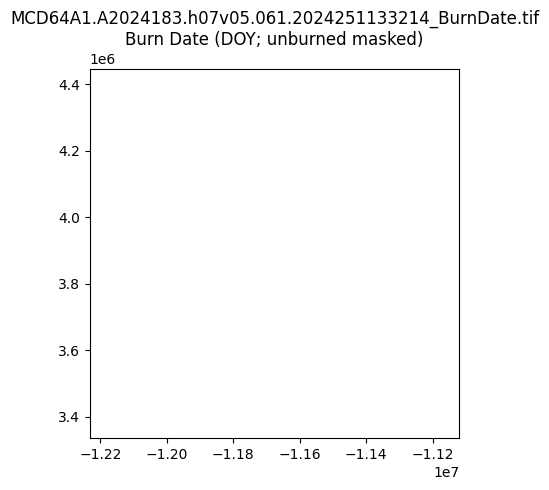

MCD64A1.A2024183.h07v05.061.2024251133214_BurnDate.tif: burned 0/5,760,000 (0.00%), DOY range None–None


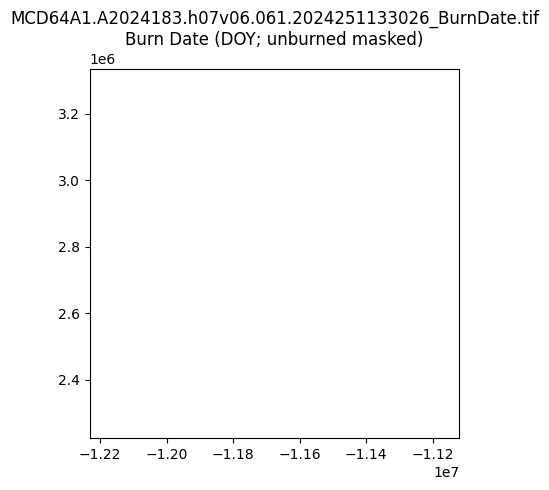

MCD64A1.A2024183.h07v06.061.2024251133026_BurnDate.tif: burned 0/5,760,000 (0.00%), DOY range None–None


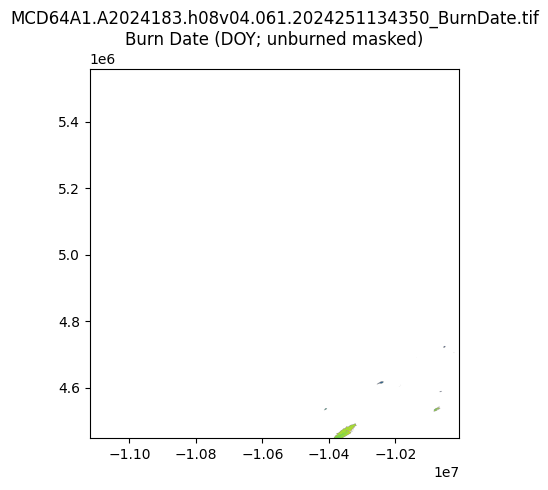

MCD64A1.A2024183.h08v04.061.2024251134350_BurnDate.tif: burned 6,149/5,760,000 (0.11%), DOY range 183–213


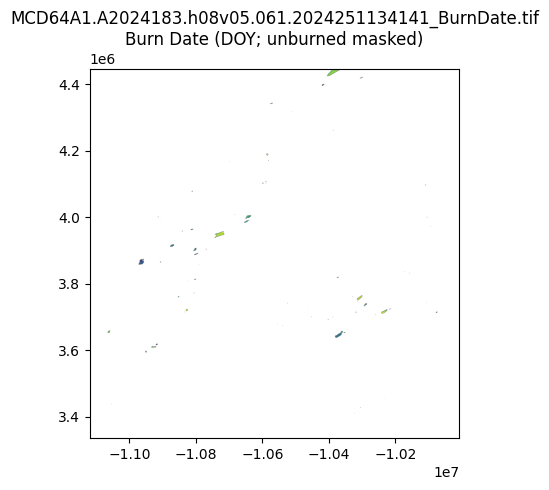

MCD64A1.A2024183.h08v05.061.2024251134141_BurnDate.tif: burned 7,905/5,760,000 (0.14%), DOY range 183–213


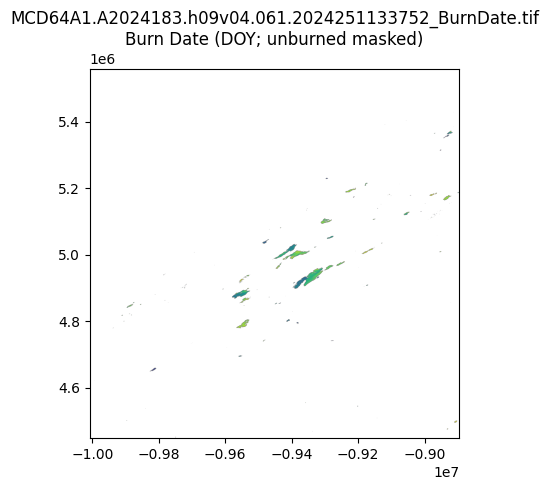

MCD64A1.A2024183.h09v04.061.2024251133752_BurnDate.tif: burned 24,423/5,760,000 (0.42%), DOY range 183–213


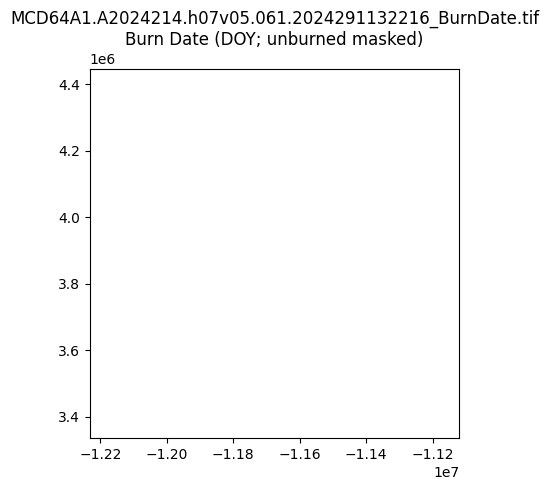

MCD64A1.A2024214.h07v05.061.2024291132216_BurnDate.tif: burned 0/5,760,000 (0.00%), DOY range None–None

Summary (first 15 rows):


file  year  jday    tile  \
0  MCD64A1.A2024183.h07v05.061.2024251133214_Burn...  2024   183  h07v05   
1  MCD64A1.A2024183.h07v06.061.2024251133026_Burn...  2024   183  h07v06   
2  MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  2024   183  h08v04   
3  MCD64A1.A2024183.h08v05.061.2024251134141_Burn...  2024   183  h08v05   
4  MCD64A1.A2024183.h09v04.061.2024251133752_Burn...  2024   183  h09v04   
5  MCD64A1.A2024214.h07v05.061.2024291132216_Burn...  2024   214  h07v05   
6  MCD64A1.A2024214.h07v06.061.2024291133016_Burn...  2024   214  h07v06   
7  MCD64A1.A2024214.h08v04.061.2024291133013_Burn...  2024   214  h08v04   
8  MCD64A1.A2024214.h08v05.061.2024291131948_Burn...  2024   214  h08v05   
9  MCD64A1.A2024214.h09v04.061.2024291132342_Burn...  2024   214  h09v04   

   pixels_valid  pixels_burned  pct_burned  doy_min  doy_max  \
0       5760000              0       0.000      NaN      NaN   
1       5760000              0       0.000      NaN      NaN   
2       5760000           6149       0.107    183.0    213.0   
3       5760000           7905       0.137    183.0    213.0   
4       5760000          24423       0.424    183.0    213.0   
5       5760000              0       0.000      NaN      NaN   
6       5760000              0       0.000      NaN      NaN   
7       5760000            960       0.017    214.0    243.0   
8       5760000           1122       0.019    214.0    244.0   
9       5760000          12484       0.217    214.0    244.0   

                                                path  
0  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
1  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
2  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
3  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
4  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
5  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
6  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
7  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
8  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...  
9  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...

Saved summary → D:\606Data\MODISTera_GEOTIFF_File\MCD64A1_BurnDate_summary.csv


In [2]:
from pathlib import Path
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

TIF_DIR = Path(r"D:\606Data\MODISTera_GEOTIFF_File")
SAMPLE = 6   

FILL_VALUES = {0, 255, 32767, 65535, 9999, -9999, -28672}

def mask_burn(arr):
    arr = arr.astype("float32", copy=False)
    m = np.zeros(arr.shape, dtype=bool)
    for bad in FILL_VALUES:
        m |= (arr == bad)
    arr[m] = np.nan
    arr[~((arr >= 1) & (arr <= 366))] = np.nan
    return arr

def parse_meta(name):
    m = re.search(r"\.A(\d{4})(\d{3})\.(h\d{2}v\d{2})", name)
    if not m:
        return None, None, None
    year, jday, tile = m.group(1), m.group(2), m.group(3)
    return int(year), int(jday), tile

tifs = sorted([p for p in TIF_DIR.glob("*.tif") if p.name.endswith("_BurnDate.tif")])
print(f"Found {len(tifs)} Burn Date GeoTIFF(s)")

rows = []
for i, fp in enumerate(tifs[:SAMPLE], 1):
    with rasterio.open(fp) as ds:
        arr = ds.read(1)
        burned = mask_burn(arr)
        vals = burned[np.isfinite(burned)]
        total_valid = int(np.isfinite(arr).sum())
        burned_count = int(vals.size)
        pct = (burned_count / total_valid * 100.0) if total_valid else 0.0
        doy_min = int(np.nanmin(vals)) if vals.size else None
        doy_max = int(np.nanmax(vals)) if vals.size else None

        fig, ax = plt.subplots(figsize=(6, 5))
        show(burned, transform=ds.transform, ax=ax)
        ax.set_title(f"{fp.name}\nBurn Date (DOY; unburned masked)")
        plt.tight_layout(); plt.show()

        year, jday, tile = parse_meta(fp.name)
        rows.append({
            "file": fp.name,
            "year": year, "jday": jday, "tile": tile,
            "pixels_valid": total_valid,
            "pixels_burned": burned_count,
            "pct_burned": round(pct, 3),
            "doy_min": doy_min, "doy_max": doy_max,
            "path": str(fp)
        })
        print(f"{fp.name}: burned {burned_count:,}/{total_valid:,} ({pct:.2f}%), DOY range {doy_min}–{doy_max}")

for fp in tifs[SAMPLE:]:
    with rasterio.open(fp) as ds:
        arr = ds.read(1)
        burned = mask_burn(arr)
        vals = burned[np.isfinite(burned)]
        total_valid = int(np.isfinite(arr).sum())
        burned_count = int(vals.size)
        pct = (burned_count / total_valid * 100.0) if total_valid else 0.0
        doy_min = int(np.nanmin(vals)) if vals.size else None
        doy_max = int(np.nanmax(vals)) if vals.size else None
        year, jday, tile = parse_meta(fp.name)
        rows.append({
            "file": fp.name,
            "year": year, "jday": jday, "tile": tile,
            "pixels_valid": total_valid,
            "pixels_burned": burned_count,
            "pct_burned": round(pct, 3),
            "doy_min": doy_min, "doy_max": doy_max,
            "path": str(fp)
        })

summary = pd.DataFrame(rows).sort_values(["year","jday","tile","file"]).reset_index(drop=True)
print("\nSummary (first 15 rows):")
display(summary.head(15))
out_csv = TIF_DIR / "MCD64A1_BurnDate_summary.csv"
summary.to_csv(out_csv, index=False)
print("Saved summary →", out_csv)

### SMAP Enhanced L3 Daily 9 km (V006)

Found 2 SMAP .h5 file(s) to preview.

=== SMAP_L3_SM_P_E_20240720_R19240_001.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM', 'Soil_Moisture_Retrieval_Data_Polar_AM', 'Soil_Moisture_Retrieval_Data_Polar_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture shape: (1624, 3856)
Stats: {'count': 852329, 'min': 0.019999999552965164, 'max': 0.8079595565795898, 'mean': 0.21101851761341095, 'std': 0.14117419719696045}
QA (top):
 qa_value   count
        7 2916673
       15 2485447
        0  249392
        1  234610
        8  206454
        9   81595
        5   49383
       13   38590


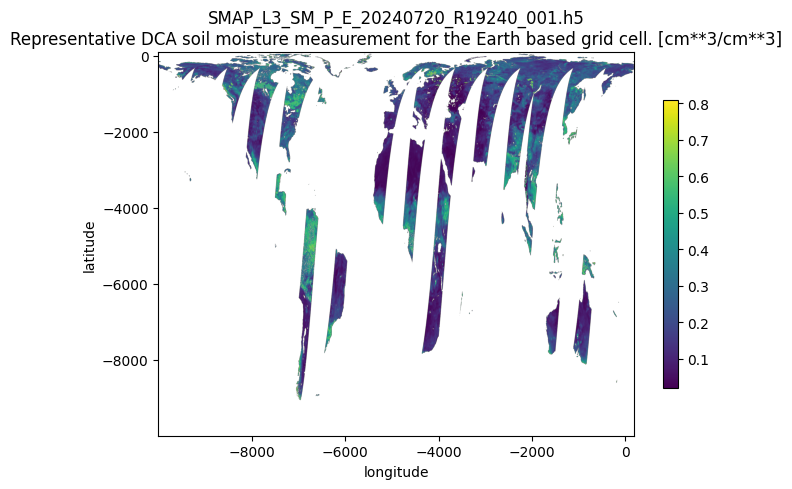


=== SMAP_L3_SM_P_E_20240721_R19240_002.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM', 'Soil_Moisture_Retrieval_Data_Polar_AM', 'Soil_Moisture_Retrieval_Data_Polar_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture shape: (1624, 3856)
Stats: {'count': 814491, 'min': 0.019999999552965164, 'max': 0.9109463691711426, 'mean': 0.21082597970962524, 'std': 0.14101289212703705}
QA (top):
 qa_value   count
        7 3038358
       15 2400720
        0  241766
        1  227268
        8  186155
        9   88496
        5   41580
       13   37801


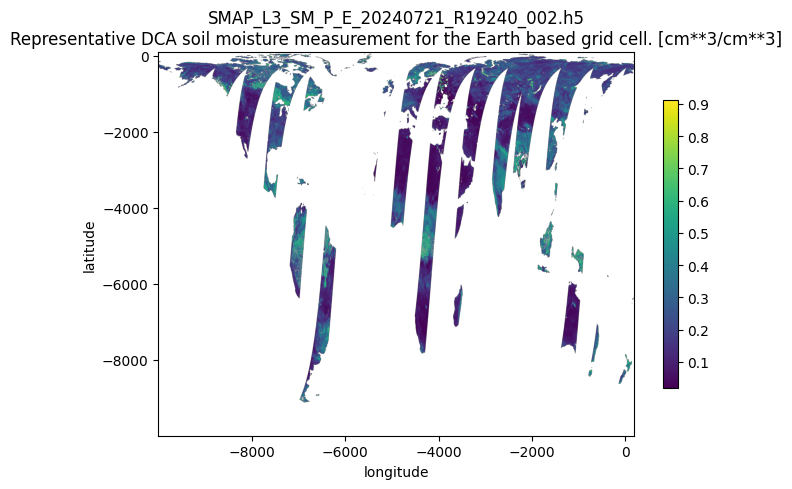

In [3]:
from pathlib import Path
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SMAP_DIR = Path(r"D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006")
SAMPLE = 2  

SCIENCE_CANDS = [
    "soil_moisture", "sm_surface", "surface_soil_moisture",
    "soil_moisture_option1", "soil_moisture_option2", "sm_surface_option1"
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
QA_CANDS  = ["retrieval_qual_flag", "quality_flag", "flag", "qa_flag"]

def find_dataset(h5, cand_list):
    """Return first dataset path in file that matches any candidate (case-insensitive, fuzzy)."""
    found = []
    def visit(name, obj):
        if isinstance(obj, h5py.Dataset):
            found.append(name)
    h5.visititems(lambda n, o: visit(n, o))
    low2orig = {n.lower(): n for n in found}
    for c in cand_list:
        for k_low, k in low2orig.items():
            if k_low.split("/")[-1] == c.lower():
                return low2orig[k_low]
    for c in cand_list:
        for k_low, k in low2orig.items():
            if c.lower() in k_low:
                return low2orig[k_low]
    return None

def read_masked(dset):
    """Read dataset to float32 and apply _FillValue / missing_value if present."""
    arr = dset[()].astype("float32")
    fill = dset.attrs.get("_FillValue")
    miss = dset.attrs.get("missing_value")
    bads = set()
    for v in (fill, miss):
        if v is None: 
            continue
        v = np.array(v).ravel()
        for x in v:
            try:
                bads.add(float(x))
            except Exception:
                pass
    if bads:
        m = np.isin(arr, list(bads))
        arr[m] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(arr):
    v = arr[np.isfinite(arr)]
    if v.size == 0:
        return {"count": 0, "min": None, "max": None, "mean": None, "std": None}
    return {
        "count": int(v.size),
        "min": float(np.nanmin(v)),
        "max": float(np.nanmax(v)),
        "mean": float(np.nanmean(v)),
        "std": float(np.nanstd(v)),
    }

files = sorted(list(SMAP_DIR.rglob("*.h5")))[:SAMPLE]
print(f"Found {len(files)} SMAP .h5 file(s) to preview.")

if not files:
    raise SystemExit("No .h5 files found. Double-check SMAP_DIR.")

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        qa_path  = find_dataset(f, QA_CANDS)

        top_keys = list(f.keys())
        print("Top-level groups/datasets:", top_keys[:10], "..." if len(top_keys) > 10 else "")

        if not sci_path:
            sample_names = []
            def collect_names(n, o):
                if isinstance(o, h5py.Dataset) and len(sample_names) < 20:
                    sample_names.append(n)
            f.visititems(lambda n, o: collect_names(n, o))
            print("⚠️ Could not auto-locate a soil moisture dataset.")
            print("Here are some dataset names I see (first 20):", sample_names)
            continue

        dset = f[sci_path]
        arr = read_masked(dset)
        print("Picked variable:", sci_path, "shape:", arr.shape)
        stats = short_stats(arr)
        print("Stats:", stats)

        unit = (dset.attrs.get("units") or dset.attrs.get("Units") or b"").decode("utf-8", "ignore") if isinstance(dset.attrs.get("units"), bytes) else dset.attrs.get("units")
        lname = dset.attrs.get("long_name")
        if isinstance(lname, bytes): lname = lname.decode("utf-8", "ignore")

        if qa_path:
            qa = read_masked(f[qa_path])
            qa_vals, qa_counts = np.unique(qa[np.isfinite(qa)].astype(int), return_counts=True) if np.isfinite(qa).any() else ([], [])
            if len(qa_vals):
                qa_df = pd.DataFrame({"qa_value": qa_vals, "count": qa_counts}).sort_values("count", ascending=False)
                print("QA (top):")
                print(qa_df.head(10).to_string(index=False))
            else:
                print("QA present but all masked/non-finite.")
        else:
            print("No obvious QA dataset found (looked for:", QA_CANDS, ").")

        lat = f[lat_path][()].astype("float32") if lat_path else None
        lon = f[lon_path][()].astype("float32") if lon_path else None

        title = (lname or sci_path)
        if unit: title += f" [{unit}]"

        plt.figure(figsize=(7,5))
        if lat is not None and lon is not None and lat.shape == arr.shape == lon.shape:
            try:
                lat_min, lat_max = float(np.nanmin(lat)), float(np.nanmax(lat))
                lon_min, lon_max = float(np.nanmin(lon)), float(np.nanmax(lon))
                extent = [lon_min, lon_max, lat_min, lat_max]
                plt.imshow(arr, origin="upper", extent=extent, aspect="auto")
                plt.xlabel("longitude"); plt.ylabel("latitude")
            except Exception:
                step = max(1, int(max(arr.shape) / 1000))  # decimate if big
                m = np.isfinite(arr)
                yx = np.where(m)
                ys, xs = yx[0][::step], yx[1][::step]
                plt.scatter(lon[ys, xs], lat[ys, xs], c=arr[ys, xs], s=3, alpha=0.8)
                plt.xlabel("longitude"); plt.ylabel("latitude")
        else:
            plt.imshow(arr, origin="upper", aspect="equal")
            plt.xlabel("x (grid)"); plt.ylabel("y (grid)")
        plt.title(fp.name + "\n" + title)
        plt.colorbar(shrink=0.75)
        plt.tight_layout()
        plt.show()

### OPERA Dataset

Found 10450 GeoTIFF(s) under D:\606Data\OPERA_Dataset (processing first 20)

[1/20] OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540Z_20240814T032330Z_L9_30_v1_DATA-MASK.tif
  shape=3660x3660  dtype=uint8  crs=EPSG:32610  nodata=None
  top values:
 value    count
     0 13382542
     2    12993
     1       65
  nonzero pixels: 13,058 / 13,395,600  (0.097%)  [looks binary mask]

[2/20] OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540Z_20240814T032330Z_L9_30_v1_GEN-ANOM-MAX.tif
  shape=3660x3660  dtype=int16  crs=EPSG:32610  nodata=-1.0
  top values:
 value    count
     0 13395511
    16        8
    15        8
    29        6
    20        6
    21        5
    22        5
    17        5
    19        4
 32000        4
    18        3
    25        3
  nonzero pixels: 89 / 13,395,600  (0.001%)

[3/20] OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540Z_20240814T032330Z_L9_30_v1_GEN-ANOM.tif
  shape=3660x3660  dtype=int16  crs=EPSG:32610  nodata=-1.0
  top values:
 value  count
     1    340

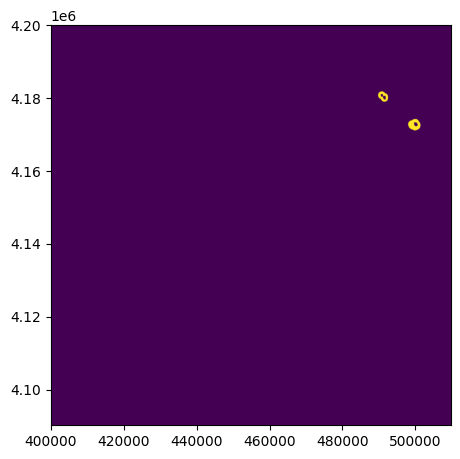

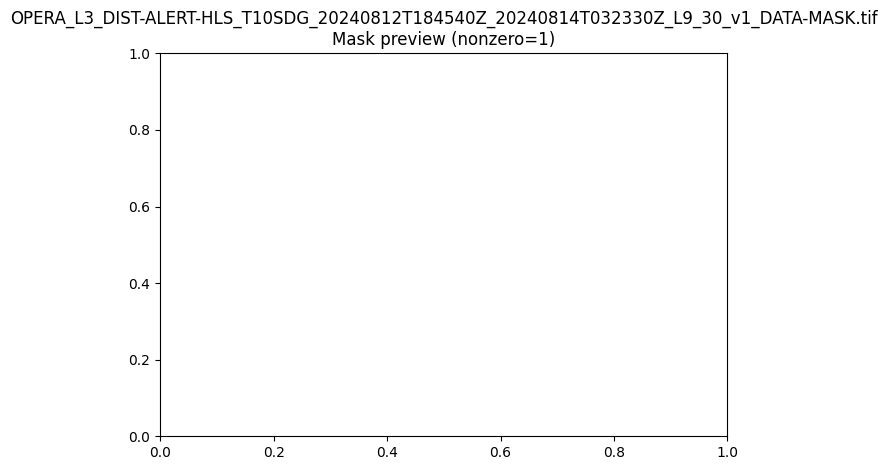

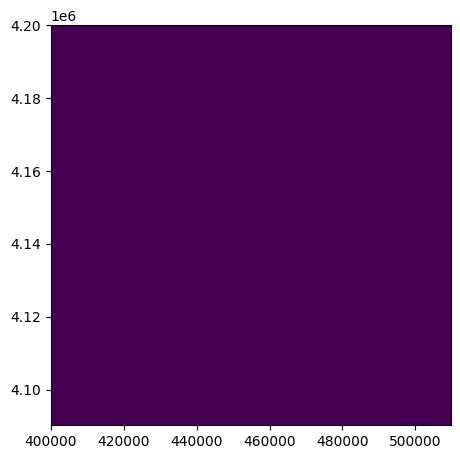

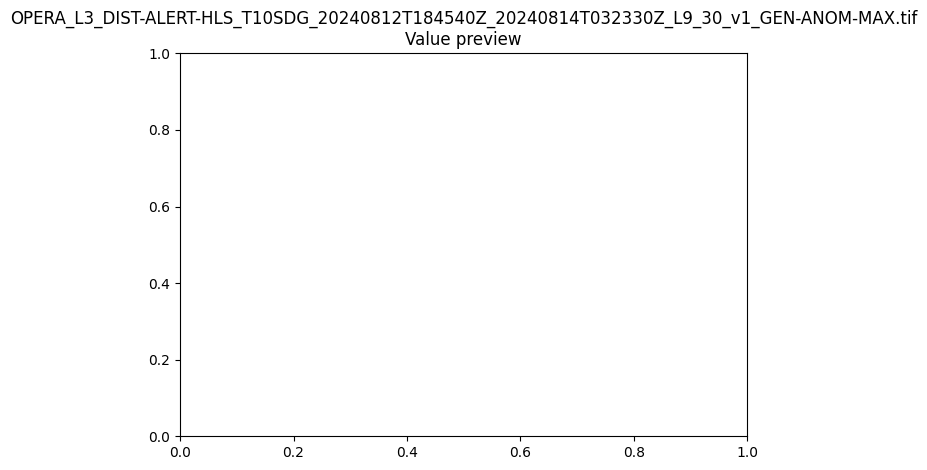

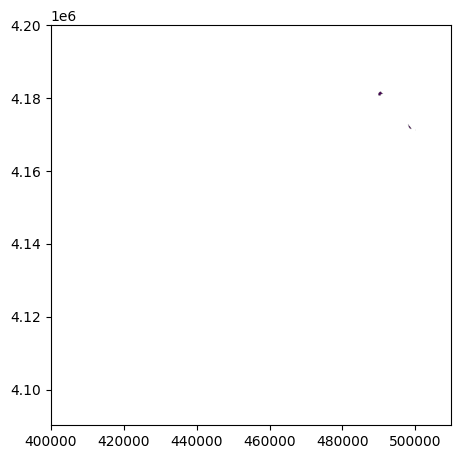

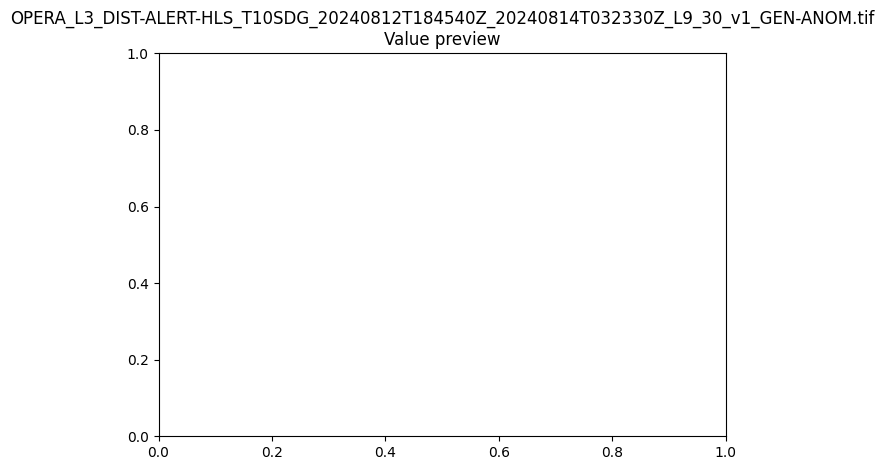

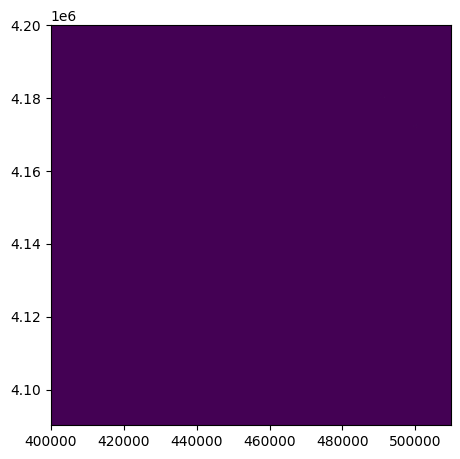

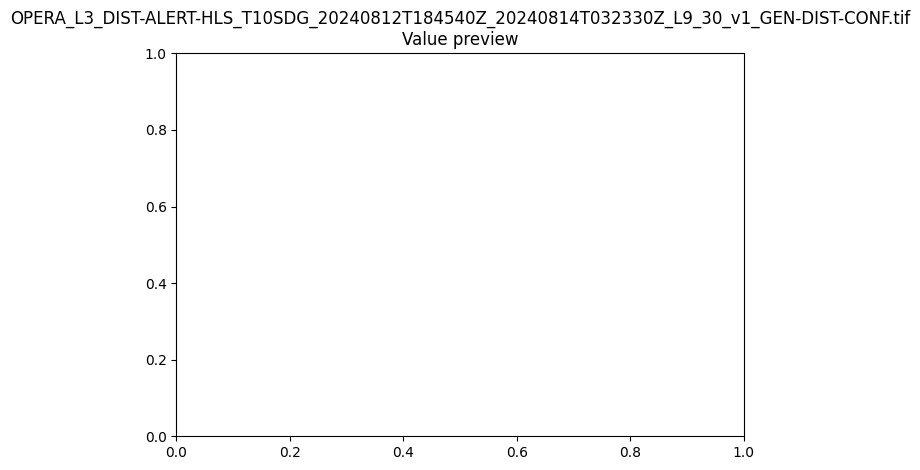

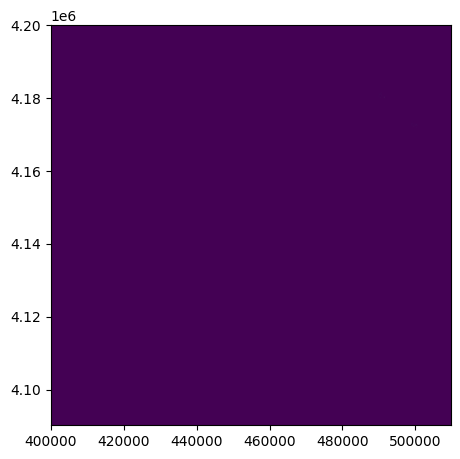

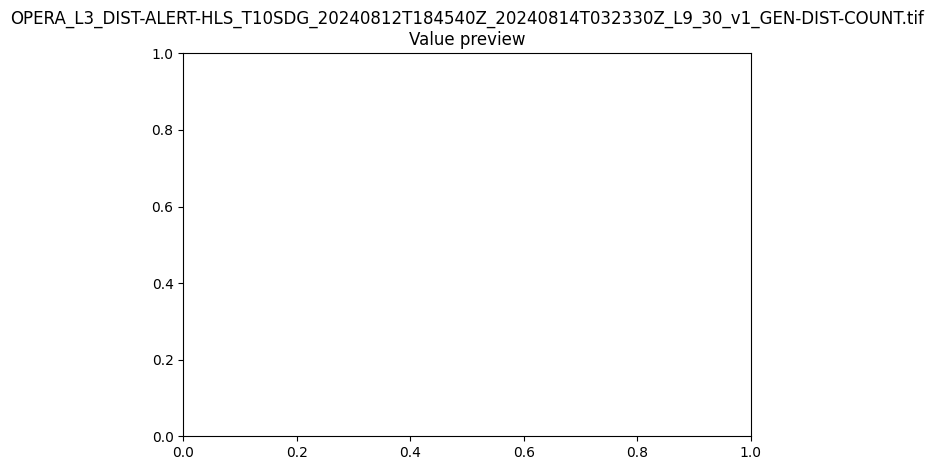

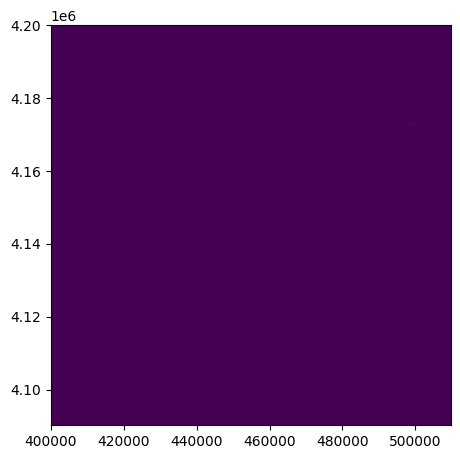

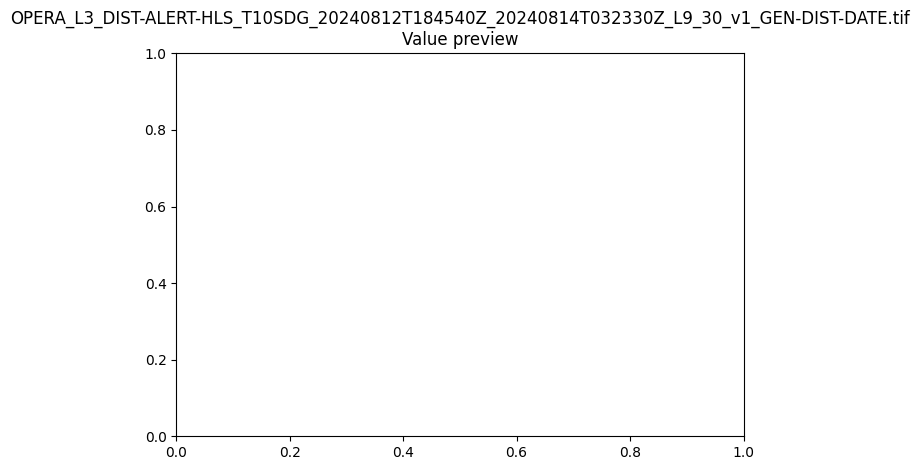


Summary (first 20 rows of summary table):


file  \
0   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
1   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
2   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
3   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
4   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
5   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
6   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
7   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
8   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
9   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
10  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
11  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
12  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
13  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
14  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
15  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
16  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
17  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
18  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
19  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240816T184919...   

                                                 path  height  width  dtype  \
0   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
1   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
2   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
3   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
4   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
5   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
6   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
7   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
8   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
9   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
10  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
11  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
12  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
13  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
14  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
15  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
16  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
17  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   
18  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  int16   
19  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...    3660   3660  uint8   

           crs  nodata  valid_pixels  nonzero_pixels  pct_nonzero  \
0   EPSG:32610     NaN      13395600           13058       0.0975   
1   EPSG:32610    -1.0      13395600              89       0.0007   
2   EPSG:32610    -1.0          1212            1203      99.2574   
3   EPSG:32610    -1.0      13395600              89       0.0007   
4   EPSG:32610   255.0      13395600              89       0.0007   
5   EPSG:32610    -1.0      13395600              89       0.0007   
6   EPSG:32610    -1.0      13395600              89       0.0007   
7   EPSG:32610   255.0      13395600              89       0.0007   
8   EPSG:32610    -1.0      13395600        13395600     100.0000   
9   EPSG:32610   255.0         41234              29       0.0703   
10  EPSG:32610   255.0         12962              61       0.4706   
11  EPSG:32610    -1.0         41234              29       0.0703   
12  EPSG:32610   255.0         41234              29       0.0703   
13  EPSG:32610    -1.0         41234              29       0.0703   
14  EPSG:32610    -1.0         41234              29       0.0703   
15  EPSG:32610   255.0         41234              29       0.0703   
16  EPSG:32610   2

Saved summary → D:\606Data\OPERA_Dataset\OPERA_summary_firstN.csv


In [6]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

OPERA_DIR  = Path(r"D:\606Data\OPERA_Dataset")
MAX_FILES  = 20   
SAMPLE     = 6    
TOP_VALUES = 12
SAVE_VALUE_COUNTS = False
FILL_CANDIDATES = {255, 32767, 65535, 9999, -9999, -28672}

def mask_fills_inplace(arr, nodata, fill_values):
    """Mask nodata and common fill codes in-place by setting them to NaN."""
    if nodata is not None:
        try:
            if np.issubdtype(arr.dtype, np.integer):
                arr[arr == np.array(nodata, dtype=arr.dtype)] = np.nan
            else:
                arr[arr == float(nodata)] = np.nan
        except Exception:
            pass

    if np.issubdtype(arr.dtype, np.integer):
        info = np.iinfo(arr.dtype)
        for bad in fill_values:
            if info.min <= bad <= info.max:
                arr[arr == np.array(bad, dtype=arr.dtype)] = np.nan
    else:
        for bad in fill_values:
            arr[arr == float(bad)] = np.nan

all_tifs = sorted(list(OPERA_DIR.rglob("*.tif")) + list(OPERA_DIR.rglob("*.tiff")))
tifs = all_tifs[:MAX_FILES]
print(f"Found {len(all_tifs)} GeoTIFF(s) under {OPERA_DIR} (processing first {len(tifs)})")
if not tifs:
    raise SystemExit("No GeoTIFFs found. Check the folder path.")

rows = []
for i, fp in enumerate(tifs, 1):
    with rasterio.open(fp) as ds:
        arr = ds.read(1)
        nodata = ds.nodata
        dtype = ds.dtypes[0]
        h, w = ds.height, ds.width

        mask = np.zeros(arr.shape, dtype=bool)

        arrf = arr.astype("float32", copy=True)
        mask_fills_inplace(arrf, nodata, FILL_CANDIDATES)
        mask |= ~np.isfinite(arrf)
        valid = ~mask

        if valid.any():
            vals, counts = np.unique(arr[valid], return_counts=True)  
            order = np.argsort(counts)[::-1]
            vals, counts = vals[order], counts[order]
            top_df = pd.DataFrame({"value": vals[:TOP_VALUES], "count": counts[:TOP_VALUES]})

            unique_set = set(vals.tolist())
            is_binary01 = unique_set.issubset({0, 1}) or (
                unique_set.issubset({0, 1, 2})
                and (2 in unique_set)
                and counts[vals.tolist().index(2)] < 0.01 * valid.sum()
            )
            nz = int((arrf[valid] != 0).sum())
            pct_nz = 100.0 * nz / int(valid.sum())
        else:
            top_df = pd.DataFrame({"value": [], "count": []})
            is_binary01, nz, pct_nz = False, 0, 0.0

        print(f"\n[{i}/{len(tifs)}] {fp.name}")
        print(f"  shape={h}x{w}  dtype={dtype}  crs={ds.crs}  nodata={nodata}")
        print("  top values:")
        print(top_df.to_string(index=False) if len(top_df) else "  (no finite/valid pixels)")
        if valid.any():
            print(f"  nonzero pixels: {nz:,} / {int(valid.sum()):,}  ({pct_nz:.3f}%)"
                  + ("  [looks binary mask]" if is_binary01 else ""))
        if SAVE_VALUE_COUNTS and valid.any():
            out_counts = fp.with_suffix(".value_counts.csv")
            pd.DataFrame({"value": vals, "count": counts}).to_csv(out_counts, index=False)
        rows.append({
            "file": fp.name,
            "path": str(fp),
            "height": h, "width": w, "dtype": dtype,
            "crs": str(ds.crs),
            "nodata": nodata,
            "valid_pixels": int(valid.sum()),
            "nonzero_pixels": nz,
            "pct_nonzero": round(pct_nz, 4),
            "looks_binary_mask": bool(is_binary01)
        })

for fp in tifs[:min(SAMPLE, len(tifs))]:
    with rasterio.open(fp) as ds:
        arr = ds.read(1).astype("float32", copy=True)
        mask_fills_inplace(arr, ds.nodata, FILL_CANDIDATES)

        finite = np.isfinite(arr)
        unique_vals = np.unique(arr[finite]).tolist() if finite.any() else []
        binaryish = len(unique_vals) <= 3 and set(int(v) for v in unique_vals if v == v).issubset({0, 1, 2})

        plt.figure(figsize=(6.2, 5.2))
        if binaryish:
            show((arr != 0).astype("float32"), transform=ds.transform)
            plt.title(fp.name + "\nMask preview (nonzero=1)")
        else:
            show(arr, transform=ds.transform)
            plt.title(fp.name + "\nValue preview")
        plt.tight_layout(); plt.show()

summary = pd.DataFrame(rows).sort_values("file").reset_index(drop=True)
print("\nSummary (first 20 rows of summary table):")
display(summary.head(20))

out_csv = OPERA_DIR / "OPERA_summary_firstN.csv"
summary.to_csv(out_csv, index=False)
print("Saved summary →", out_csv)

### SMAP L3 Daily 36 km (V009)

Found 2 SMAP .h5 file(s) to preview.

=== SMAP_L3_SM_P_20240720_R19240_001.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture | shape: (406, 964)
Stats: {'count': 53263, 'min': 0.019999999552965164, 'max': 0.748695433139801, 'mean': 0.20944444835186005, 'std': 0.1389470249414444} | units: cm**3/cm**3
QA (top values):
 qa_value  count
        7 178769
       15 159040
        0  15005
        1  15000
        8  12906
        9   5678
        5   2781
       13   2205


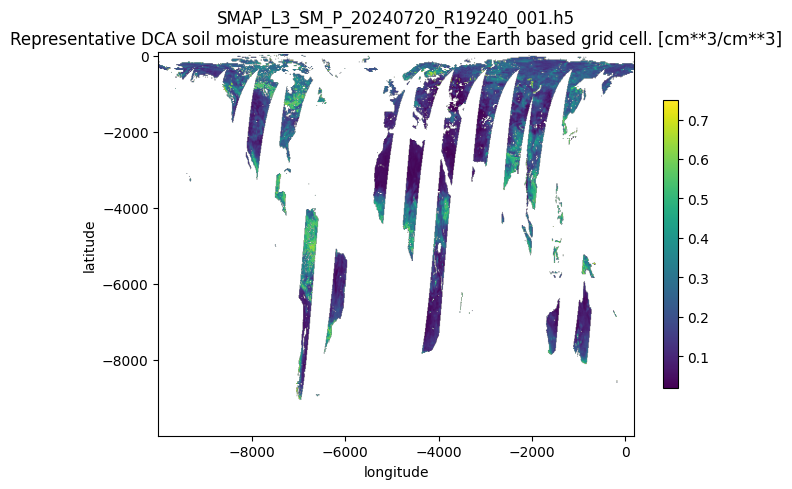


=== SMAP_L3_SM_P_20240721_R19240_002.h5 ===
Top-level groups/datasets: ['Metadata', 'Soil_Moisture_Retrieval_Data_AM', 'Soil_Moisture_Retrieval_Data_PM'] 
Picked variable: Soil_Moisture_Retrieval_Data_AM/soil_moisture | shape: (406, 964)
Stats: {'count': 50845, 'min': 0.019999999552965164, 'max': 0.8185527324676514, 'mean': 0.20902147889137268, 'std': 0.13878007233142853} | units: cm**3/cm**3
QA (top values):
 qa_value  count
        7 186623
       15 153550
        1  14562
        0  14503
        8  11684
        9   6058
        5   2317
       13   2087


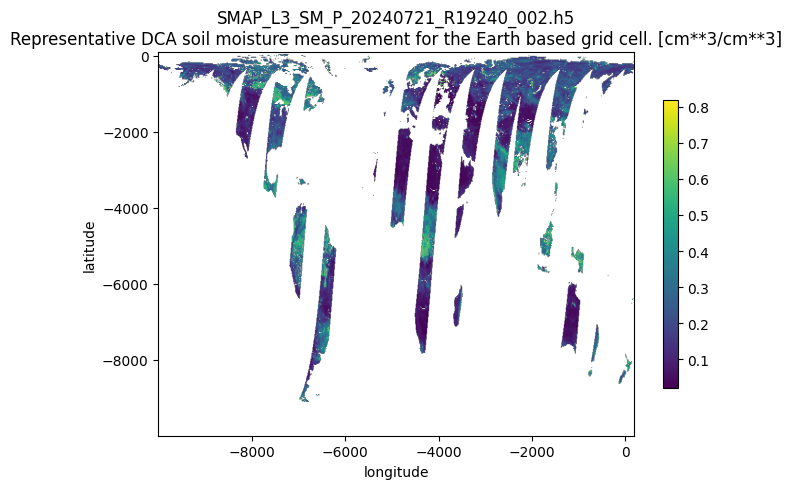

In [7]:
from pathlib import Path
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SMAP_DIR = Path(r"D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009")
SAMPLE   = 2    
WRITE_CSV_SUMMARY = False

SCIENCE_CANDS = [
    "soil_moisture", "sm_surface", "surface_soil_moisture",
    "soil_moisture_am", "soil_moisture_pm",
    "soil_moisture_option1", "soil_moisture_option2",
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
QA_CANDS  = [
    "retrieval_qual_flag", "quality_flag", "retrieval_quality_flag",
    "flag", "qa_flag", "retrieval_qual_flag_am", "retrieval_qual_flag_pm"
]

def list_all_datasets(h5):
    paths = []
    def visit(name, obj):
        if isinstance(obj, h5py.Dataset):
            paths.append(name)
    h5.visititems(lambda n, o: visit(n, o))
    return paths

def find_dataset(h5, cand_list):
    """Return first dataset path matching one of the candidates (case-insensitive)."""
    all_ds = list_all_datasets(h5)
    low2orig = {p.lower(): p for p in all_ds}
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if p.split("/")[-1].lower() == c_low:
                return p
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if c_low in p.lower():
                return p
    return None

def apply_scale_offset(arr, dset):
    """Apply CF-style scale_factor/add_offset if present."""
    sf = dset.attrs.get("scale_factor")
    ao = dset.attrs.get("add_offset")
    def as_float(x):
        try:
            return float(np.array(x).ravel()[0])
        except Exception:
            return None
    sf = as_float(sf)
    ao = as_float(ao)
    if sf is not None or ao is not None:
        arr = arr.astype("float32", copy=False)
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        arr = arr * sf + ao
    return arr

def read_masked(dset):
    """Read dataset, apply scale/offset, mask _FillValue/missing_value & non-finite."""
    arr = dset[()]  
    arr = apply_scale_offset(arr, dset)
    arr = arr.astype("float32", copy=False)
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = dset.attrs.get(key)
        if v is None: 
            continue
        v = np.array(v).ravel()
        for x in v:
            try:
                bads.add(float(x))
            except Exception:
                pass
    if bads:
        m = np.isin(arr, list(bads))
        arr[m] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(arr):
    v = arr[np.isfinite(arr)]
    if v.size == 0:
        return {"count": 0, "min": None, "max": None, "mean": None, "std": None}
    return {
        "count": int(v.size),
        "min": float(np.nanmin(v)),
        "max": float(np.nanmax(v)),
        "mean": float(np.nanmean(v)),
        "std": float(np.nanstd(v)),
    }

files = sorted(SMAP_DIR.rglob("*.h5"))[:SAMPLE]
print(f"Found {len(files)} SMAP .h5 file(s) to preview.")
if not files:
    raise SystemExit("No .h5 files found. Check SMAP_DIR path.")

summary_rows = []

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        qa_path  = find_dataset(f, QA_CANDS)

        print("Top-level groups/datasets:", list(f.keys())[:10], "..." if len(f.keys()) > 10 else "")

        if not sci_path:
            ds_names = list_all_datasets(f)[:25]
            print("⚠️ Could not auto-locate a soil moisture dataset.")
            print("Here are some dataset names I see (first 25):")
            for n in ds_names: print("  -", n)
            continue

        dset = f[sci_path]
        sm = read_masked(dset)
        unit = dset.attrs.get("units") or dset.attrs.get("Units")
        if isinstance(unit, bytes):
            unit = unit.decode("utf-8", "ignore")
        lname = dset.attrs.get("long_name")
        if isinstance(lname, bytes):
            lname = lname.decode("utf-8", "ignore")

        stats = short_stats(sm)
        print("Picked variable:", sci_path, "| shape:", sm.shape)
        print("Stats:", stats, "| units:", unit or "(none)")

        if qa_path:
            qa = read_masked(f[qa_path])
            if np.isfinite(qa).any():
                vals, counts = np.unique(qa[np.isfinite(qa)].astype(int), return_counts=True)
                order = np.argsort(counts)[::-1]
                vals, counts = vals[order], counts[order]
                top_df = pd.DataFrame({"qa_value": vals[:10], "count": counts[:10]})
                print("QA (top values):")
                print(top_df.to_string(index=False))
            else:
                print("QA present but fully masked/non-finite.")
        else:
            print("No obvious QA dataset found (looked for:", QA_CANDS, ").")

        lat = f[lat_path][()].astype("float32") if lat_path else None
        lon = f[lon_path][()].astype("float32") if lon_path else None

        title = (lname or sci_path)
        if unit: title += f" [{unit}]"
        plt.figure(figsize=(7,5))
        if lat is not None and lon is not None and lat.shape == sm.shape == lon.shape:
            try:
                extent = [float(np.nanmin(lon)), float(np.nanmax(lon)),
                          float(np.nanmin(lat)), float(np.nanmax(lat))]
                plt.imshow(sm, origin="upper", extent=extent, aspect="auto")
                plt.xlabel("longitude"); plt.ylabel("latitude")
            except Exception:
                m = np.isfinite(sm)
                y, x = np.where(m)
                step = max(1, int(max(sm.shape)/1000))
                y, x = y[::step], x[::step]
                plt.scatter(lon[y, x], lat[y, x], c=sm[y, x], s=3, alpha=0.8)
                plt.xlabel("longitude"); plt.ylabel("latitude")
        else:
            plt.imshow(sm, origin="upper", aspect="equal")
            plt.xlabel("x (grid)"); plt.ylabel("y (grid)")
        plt.title(fp.name + "\n" + title)
        plt.colorbar(shrink=0.75)
        plt.tight_layout(); plt.show()

        summary_rows.append({
            "file": fp.name,
            "path": str(fp),
            "variable": sci_path,
            "units": unit,
            "count": stats["count"],
            "min": stats["min"],
            "max": stats["max"],
            "mean": stats["mean"],
            "std": stats["std"],
            "has_latlon": bool(lat_path and lon_path),
            "qa_var": qa_path or ""
        })

if WRITE_CSV_SUMMARY and summary_rows:
    out_csv = SMAP_DIR / "SMAP_L3_36km_summary.csv"
    pd.DataFrame(summary_rows).to_csv(out_csv, index=False)
    print("Saved summary →", out_csv)

### SMAP/Sentinel-1 L2 Radiometer–Radar Scene, 3 km EASE-Grid (V003)

In [ ]:
from pathlib import Path
import random
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path(r"D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003")
SAMPLE_K = 2         
RANDOM_SEED = 42    
WRITE_CSV_SUMMARY = False

SCIENCE_CANDS = [
    "soil_moisture", "surface_soil_moisture", "sm_surface",
    "soil_moisture_ap", "soil_moisture_aa", "soil_moisture_radar",
    "soil_moisture_option1", "soil_moisture_option2",
    "retrieved_soil_moisture"
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
QA_CANDS  = [
    "retrieval_qual_flag", "retrieval_quality_flag", "quality_flag",
    "surface_flag", "processing_flag", "radar_quality_flag",
    "tb_quality_flag", "s1_quality_flag"
]
TIME_CANDS = ["scene_center_time", "tb_time_utc", "time_utc", "time"]

def list_all_datasets(h5):
    paths = []
    def visit(name, obj):
        if isinstance(obj, h5py.Dataset):
            paths.append(name)
    h5.visititems(lambda n, o: visit(n, o))
    return paths

def find_dataset(h5, cand_list):
    all_ds = list_all_datasets(h5)
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if p.split("/")[-1].lower() == c_low:
                return p
    for c in cand_list:
        c_low = c.lower()
        for p in all_ds:
            if c_low in p.lower():
                return p
    return None

def _as_float_scalar(x):
    try: return float(np.array(x).ravel()[0])
    except Exception: return None

def apply_scale_offset(arr, dset):
    sf = _as_float_scalar(dset.attrs.get("scale_factor"))
    ao = _as_float_scalar(dset.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        arr = arr.astype("float32", copy=False)
        arr = arr * sf + ao
    return arr

def read_masked(dset):
    arr = dset[()]
    arr = apply_scale_offset(arr, dset)
    arr = arr.astype("float32", copy=False)
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = dset.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    if bads:
        arr[np.isin(arr, list(bads))] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(arr):
    v = arr[np.isfinite(arr)]
    return {"count": int(v.size),
            "min": float(np.nanmin(v)) if v.size else None,
            "max": float(np.nanmax(v)) if v.size else None,
            "mean": float(np.nanmean(v)) if v.size else None,
            "std": float(np.nanstd(v)) if v.size else None}

all_files = sorted(DATA_DIR.rglob("*.h5"))
print(f"Found {len(all_files)} .h5 file(s).")
if not all_files:
    raise SystemExit("No .h5 files found. Check DATA_DIR path.")

if RANDOM_SEED is not None:
    random.seed(RANDOM_SEED)
files = random.sample(all_files, k=min(SAMPLE_K, len(all_files)))
print("Random picks:")
for f in files: print(" -", f.name)

summary = []

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        top = list(f.keys())
        print("Top-level groups/datasets:", top[:10], "..." if len(top) > 10 else "")

        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        qa_path  = find_dataset(f, QA_CANDS)
        time_path= find_dataset(f, TIME_CANDS)

        if not sci_path:
            ds_names = list_all_datasets(f)[:30]
            print("⚠️ Could not auto-locate a soil moisture dataset. First 30 datasets:")
            for n in ds_names: print("  -", n)
            continue

        dset = f[sci_path]
        sm = read_masked(dset)
        unit = dset.attrs.get("units") or dset.attrs.get("Units")
        unit = unit.decode("utf-8","ignore") if isinstance(unit, bytes) else unit
        lname = dset.attrs.get("long_name")
        lname = lname.decode("utf-8","ignore") if isinstance(lname, bytes) else lname
        stats = short_stats(sm)

        print("Picked variable:", sci_path, "| shape:", sm.shape)
        print("Stats:", stats, "| units:", unit or "(none)")

        if qa_path:
            qa = read_masked(f[qa_path])
            if np.isfinite(qa).any():
                vals, counts = np.unique(qa[np.isfinite(qa)].astype(int), return_counts=True)
                order = np.argsort(counts)[::-1]
                print("QA (top values):")
                print(pd.DataFrame({"qa_value": vals[order][:10], "count": counts[order][:10]}).to_string(index=False))
            else:
                print("QA present but fully masked/non-finite.")
        else:
            print("No obvious QA dataset found.")

        lat = f[lat_path][()].astype("float32") if lat_path else None
        lon = f[lon_path][()].astype("float32") if lon_path else None

        title = (lname or sci_path) + (f" [{unit}]" if unit else "")
        plt.figure(figsize=(7,5))
        if (lat is not None) and (lon is not None) and lat.shape == sm.shape == lon.shape:
            try:
                extent = [float(np.nanmin(lon)), float(np.nanmax(lon)),
                          float(np.nanmin(lat)), float(np.nanmax(lat))]
                plt.imshow(sm, origin="upper", extent=extent, aspect="auto")
                plt.xlabel("longitude"); plt.ylabel("latitude")
            except Exception:
                m = np.isfinite(sm); y,x = np.where(m)
                step = max(1, int(max(sm.shape)/1000)); y,x = y[::step], x[::step]
                plt.scatter(lon[y,x], lat[y,x], c=sm[y,x], s=3, alpha=0.8)
                plt.xlabel("longitude"); plt.ylabel("latitude")
        else:
            plt.imshow(sm, origin="upper", aspect="equal")
            plt.xlabel("x (grid)"); plt.ylabel("y (grid)")
        plt.title(fp.name + "\n" + title)
        plt.colorbar(shrink=0.75)
        plt.tight_layout(); plt.show()

        summary.append({
            "file": fp.name, "path": str(fp), "variable": sci_path,
            "units": unit or "", **stats,
            "has_latlon": bool(lat_path and lon_path),
            "qa_var": qa_path or "", "time": str(np.array(f[time_path][()]).ravel()[0]) if time_path else ""
        })

if WRITE_CSV_SUMMARY and summary:
    out_csv = DATA_DIR / "SMAP_S1_L2_3km_summary.csv"
    pd.DataFrame(summary).to_csv(out_csv, index=False)
    print("Saved summary →", out_csv)


### VIIRS NPP Thermal Anomalies & Fire Daily L3 1 km SIN Grid (V002)

Found 135 .h5 granule(s)
Random picks:
 - VNP14A1.A2024223.h08v04.002.2024226182033.h5
 - VNP14A1.A2024214.h08v05.002.2024221162948.h5

=== VNP14A1.A2024223.h08v04.002.2024226182033.h5 ===
Top-level groups: ['HDFEOS', 'HDFEOS INFORMATION'] 
FireMask (top values):
 FireMask_value   count
              3 1264626
              5  133495
              4   41863
              9       9
              8       6
              7       1
FRP stats (HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields/MaxFRP): {'count': 16, 'min': 3.799999952316284, 'max': 114.20000457763672, 'mean': 35.96875, 'std': 35.57577896118164}


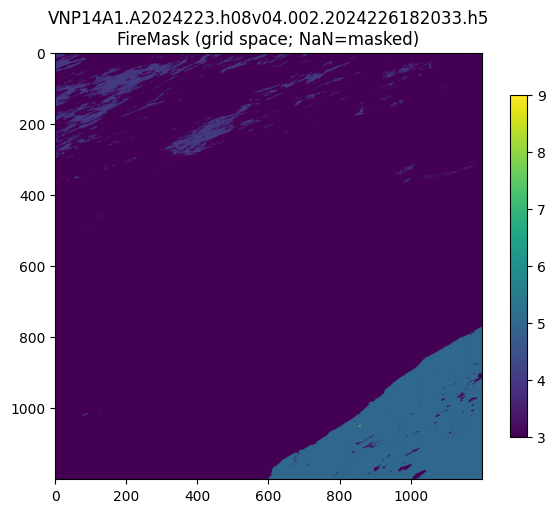

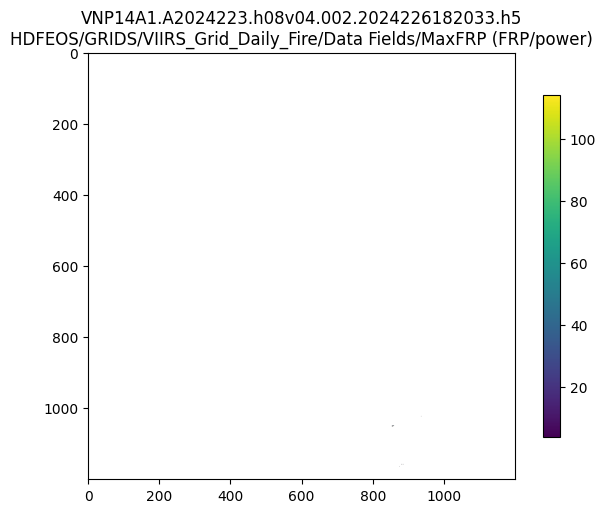

file  \
0  VNP14A1.A2024223.h08v04.002.2024226182033.h5   

                                           mask_path  \
0  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   

                                            frp_path qf_path  mask_unique  \
0  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...                    6   

   frp_count  frp_min     frp_max  frp_mean  
0         16      3.8  114.200005  35.96875


=== VNP14A1.A2024214.h08v05.002.2024221162948.h5 ===
Top-level groups: ['HDFEOS', 'HDFEOS INFORMATION'] 
FireMask (top values):
 FireMask_value   count
              5 1087151
              3  318129
              4   34695
              9      15
              8       8
              7       2
FRP stats (HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields/MaxFRP): {'count': 25, 'min': 5.800000190734863, 'max': 243.5, 'mean': 42.65199661254883, 'std': 51.7050895690918}


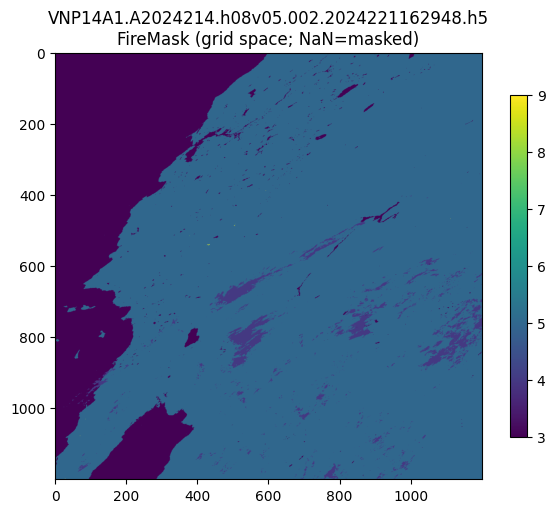

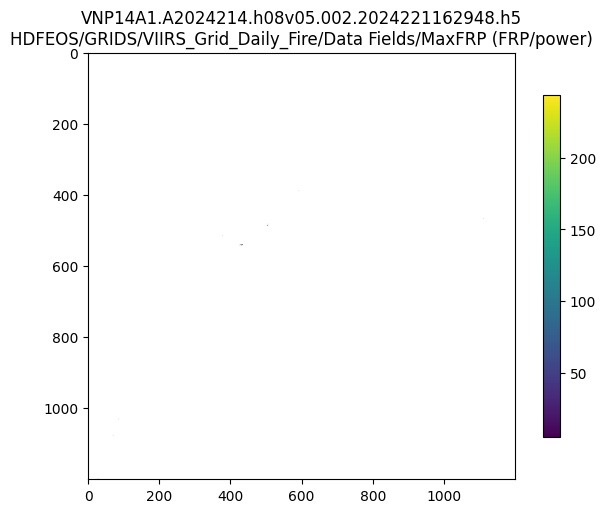

file  \
0  VNP14A1.A2024214.h08v05.002.2024221162948.h5   

                                           mask_path  \
0  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   

                                            frp_path qf_path  mask_unique  \
0  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...                    6   

   frp_count  frp_min  frp_max   frp_mean  
0         25      5.8    243.5  42.651997

In [12]:
from pathlib import Path
import random
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

VIIRS_DIR  = Path(r"D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002")
SAMPLE_K   = 2      
RANDOM_SEED = 7     

MASK_CANDS = ["FireMask", "fire_mask", "Fire_Mask"]
FRP_CANDS  = ["MaxFRP", "FRP", "power", "FP_power", "FireRadiativePower"]
QF_CANDS   = ["QF1","QF2","Quality","DQF","QualityFlag"]

FILL_SENTINELS = {255, 32767, 65535, 9999, -9999, -28672}

def list_all_datasets(h5):
    out = []
    def v(n, o):
        if isinstance(o, h5py.Dataset):
            out.append(n)
    h5.visititems(v)
    return out

def find_first(h5, candidates):
    ds = list_all_datasets(h5)
    for cand in candidates:
        for p in ds:
            if p.split("/")[-1].lower() == cand.lower():
                return p
    for cand in candidates:
        for p in ds:
            if cand.lower() in p.lower():
                return p
    return None

def read_masked_float(dset):
    """Read HDF5 dataset → float32, apply scale/offset and mask _FillValue/missing."""
    arr = dset[()]
    def as_float(x):
        try: return float(np.array(x).ravel()[0])
        except Exception: return None
    sf = as_float(dset.attrs.get("scale_factor"))
    ao = as_float(dset.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        arr = arr.astype("float32", copy=False)
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        arr = arr * sf + ao
    arr = arr.astype("float32", copy=False)
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = dset.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    for b in FILL_SENTINELS: bads.add(float(b))
    if bads:
        m = np.isin(arr, list(bads))
        arr[m] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def short_stats(a):
    v = a[np.isfinite(a)]
    return dict(
        count=int(v.size),
        min=float(np.nanmin(v)) if v.size else None,
        max=float(np.nanmax(v)) if v.size else None,
        mean=float(np.nanmean(v)) if v.size else None,
        std=float(np.nanstd(v)) if v.size else None
    )

all_files = sorted(VIIRS_DIR.rglob("*.h5"))
print(f"Found {len(all_files)} .h5 granule(s)")
if not all_files:
    raise SystemExit("No .h5 files found. Check VIIRS_DIR.")
if RANDOM_SEED is not None:
    random.seed(RANDOM_SEED)
files = random.sample(all_files, k=min(SAMPLE_K, len(all_files)))
print("Random picks:")
for f in files: print(" -", f.name)

for fp in files:
    print(f"\n=== {fp.name} ===")
    with h5py.File(fp, "r") as f:
        top = list(f.keys())
        print("Top-level groups:", top[:10], "..." if len(top) > 10 else "")

        mask_path = find_first(f, MASK_CANDS)
        frp_path  = find_first(f, FRP_CANDS)
        qf_path   = find_first(f, QF_CANDS)

        if mask_path is None:
            print("⚠️ Could not find FireMask; showing first 25 datasets to help:")
            for n in list_all_datasets(f)[:25]:
                print("  -", n)
            continue

        FireMask_ds = f[mask_path]
        FireMask = FireMask_ds[()]
        FireMask_f = FireMask.astype("float32", copy=True)
        fv = FireMask_ds.attrs.get("_FillValue")
        miss = FireMask_ds.attrs.get("missing_value")
        bads = set()
        for s in (fv, miss):
            if s is None: continue
            for x in np.array(s).ravel():
                try: bads.add(float(x))
                except Exception: pass
        for b in FILL_SENTINELS: bads.add(float(b))
        for b in bads:
            FireMask_f[FireMask_f == b] = np.nan

        finite = np.isfinite(FireMask_f)
        if finite.any():
            vals, cnts = np.unique(FireMask[finite], return_counts=True)
            order = np.argsort(cnts)[::-1]
            vals, cnts = vals[order], cnts[order]
            counts_df = pd.DataFrame({"FireMask_value": vals[:12], "count": cnts[:12]})
            print("FireMask (top values):")
            print(counts_df.to_string(index=False))
        else:
            print("FireMask appears fully masked/non-finite.")

        frp_stats = None
        if frp_path is not None:
            FRP = read_masked_float(f[frp_path])
            frp_stats = short_stats(FRP)
            print(f"FRP stats ({frp_path}):", frp_stats)

        plt.figure(figsize=(6.4,5.2))
        plt.imshow(FireMask_f, origin="upper", aspect="equal")
        plt.title(fp.name + "\nFireMask (grid space; NaN=masked)")
        plt.colorbar(shrink=0.8)
        plt.tight_layout(); plt.show()

        if frp_path is not None and np.isfinite(FRP).any():
            plt.figure(figsize=(6.4,5.2))
            plt.imshow(FRP, origin="upper", aspect="equal")
            plt.title(fp.name + f"\n{frp_path} (FRP/power)")
            plt.colorbar(shrink=0.8)
            plt.tight_layout(); plt.show()

        if qf_path:
            QF = read_masked_float(f[qf_path])
            if np.isfinite(QF).any():
                qv, qc = np.unique(QF[np.isfinite(QF)].astype(int), return_counts=True)
                order = np.argsort(qc)[::-1]
                print("Quality flag (top):")
                print(pd.DataFrame({"QF": qv[order][:10], "count": qc[order][:10]}).to_string(index=False))
            else:
                print("Quality flag present but masked/non-finite.")

        out = {
            "file": fp.name,
            "mask_path": mask_path,
            "frp_path": frp_path or "",
            "qf_path": qf_path or "",
            "mask_unique": int(vals.size) if finite.any() else 0,
            "frp_count": frp_stats["count"] if frp_path and frp_stats else 0,
            "frp_min": frp_stats["min"] if frp_path and frp_stats else None,
            "frp_max": frp_stats["max"] if frp_path and frp_stats else None,
            "frp_mean": frp_stats["mean"] if frp_path and frp_stats else None,
        }
        display(pd.DataFrame([out]))

### Dataset Picture 

Dataset

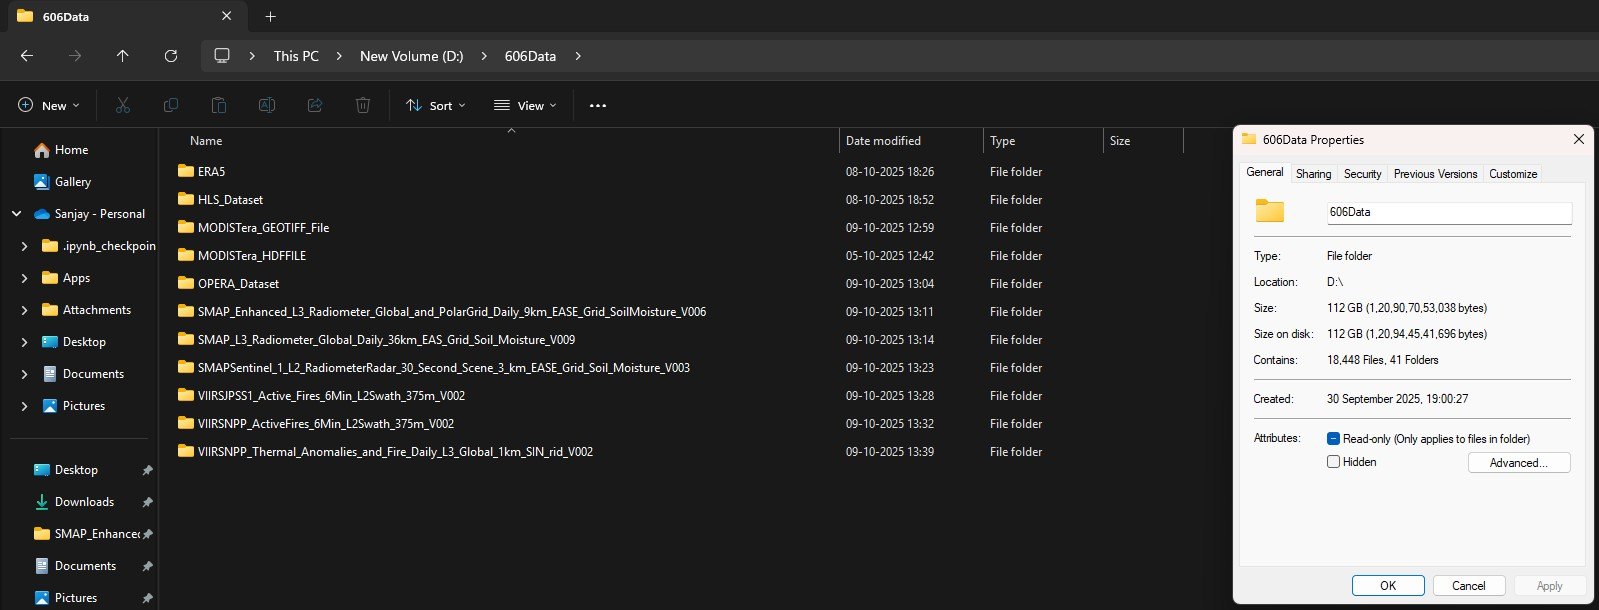

In [9]:
from IPython.display import Image, display, Markdown
display(Markdown("Dataset"))
display(Image(filename=r"C:\Users\sanjay\Desktop\Data_Picture.jpg"))  


## Metadata

### ERA 5

In [15]:
from pathlib import Path
import os, json
import numpy as np
import pandas as pd
import xarray as xr

ROOT = Path(r"D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9")
OUT_DIR = ROOT / "_metadata"
OUT_DIR.mkdir(exist_ok=True)

CANDS = []
CANDS += sorted(ROOT.rglob("*.nc"))
CANDS += sorted(ROOT.rglob("*.grib"))
CANDS += sorted(ROOT.rglob("*.grb"))
CANDS += sorted(ROOT.rglob("*.grib2"))
CANDS = sorted(set(CANDS))
print(f"Found {len(CANDS)} ERA5 file(s) to inspect.")

def to180(lon_vals):
    """Convert 0..360 → -180..180 (for reporting only)."""
    arr = np.array(lon_vals, dtype=float)
    arr = np.where(arr > 180.0, arr - 360.0, arr)
    return arr

def safe_attr(obj, key):
    v = obj.attrs.get(key)
    if isinstance(v, (bytes, bytearray)):
        try: v = v.decode("utf-8", "ignore")
        except Exception: pass
    return v

rows = []
perfile_units_paths = []

for i, fp in enumerate(CANDS, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    print(f"\n[{i}/{len(CANDS)}] {fp.name}  ({size_mb:.2f} MB)")
    engine_used = None
    ds = None

    try:
        ds = xr.open_dataset(fp)
        engine_used = getattr(getattr(ds, "_engine", None), "name", None) or "auto"
    except Exception as e1:
        try:
            if fp.suffix.lower() in (".grib", ".grb", ".grib2"):
                ds = xr.open_dataset(fp, engine="cfgrib")
                engine_used = "cfgrib"
            else:
                raise
        except Exception as e2:
            print("  ⚠️ Could not open file with xarray:", e2)
            rows.append({
                "file": fp.name, "path": str(fp), "size_mb": round(size_mb,2),
                "engine": None, "open_error": str(e2)[:300]
            })
            continue

    dims = {k:int(v) for k,v in ds.sizes.items()}
    coord_report = {}

    if "latitude" in ds.coords:
        lat = ds["latitude"].values
        lat_min, lat_max = float(np.nanmin(lat)), float(np.nanmax(lat))
        coord_report["latitude_min"] = lat_min
        coord_report["latitude_max"] = lat_max

    if "longitude" in ds.coords:
        lon = ds["longitude"].values
        lon_r = to180(lon)
        coord_report["longitude_min"] = float(np.nanmin(lon_r))
        coord_report["longitude_max"] = float(np.nanmax(lon_r))
        coord_report["longitude_original_range"] = f"{float(np.nanmin(lon))}..{float(np.nanmax(lon))}"

    time_key = None
    for cand in ["time","valid_time","forecast_time"]:
        if cand in ds.coords:
            time_key = cand; break
    if time_key:
        try:
            tvals = pd.to_datetime(ds[time_key].values)
            coord_report["time_start"] = str(pd.Series(tvals).min())
            coord_report["time_end"]   = str(pd.Series(tvals).max())
            coord_report["time_len"]   = int(len(tvals))
            coord_report["time_name"]  = time_key
        except Exception:
            coord_report["time_name"] = time_key

    if "pressure_level" in ds.coords:
        p = ds["pressure_level"].values
        coord_report["plevels"] = ",".join(map(lambda x: str(float(x)), np.array(p).ravel()[:12]))
        coord_report["plevels_count"] = int(np.size(p))

    var_list = []
    units_map = {}
    for name, da in ds.data_vars.items():
        dt = str(da.dtype)
        shape = tuple(int(s) for s in da.shape)
        units = safe_attr(da, "units") or safe_attr(da, "Units")
        long_name = safe_attr(da, "long_name")
        var_list.append(f"{name}[{dt}]{shape}")
        if units is not None:
            units_map[name] = units
        elif long_name:
            units_map[name] = f"(unit not set; long_name='{long_name}')"

    units_path = OUT_DIR / f"{fp.stem}_variables_units.json"
    with open(units_path, "w", encoding="utf-8") as fju:
        json.dump(units_map, fju, indent=2, ensure_ascii=False)
    perfile_units_paths.append(units_path)

    gattrs = {k: safe_attr(ds, k) for k in ds.attrs.keys()}
    keep_keys = ["Conventions","institution","history","GRIB_centreDescription"]
    gshort = {k:gattrs.get(k) for k in keep_keys if k in gattrs}

    rows.append({
        "file": fp.name,
        "path": str(fp),
        "size_mb": round(size_mb, 2),
        "engine": engine_used,
        "dims": json.dumps(dims),
        "vars_count": len(ds.data_vars),
        "vars_sample": ", ".join(var_list[:6]) + (" ..." if len(var_list) > 6 else ""),
        **coord_report,
        "global_attrs_short": json.dumps(gshort, ensure_ascii=False)
    })

    print("  dims:", dims)
    if "time_start" in coord_report:
        print(f"  time: {coord_report['time_start']} → {coord_report['time_end']}  (n={coord_report['time_len']})")
    if "plevels_count" in coord_report:
        print(f"  pressure_level (n={coord_report['plevels_count']}): {coord_report.get('plevels','')}")
    if "latitude_min" in coord_report:
        print(f"  lat: {coord_report['latitude_min']}..{coord_report['latitude_max']}")
    if "longitude_min" in coord_report:
        print(f"  lon(°E): {coord_report['longitude_original_range']}  |  lon(±180): {coord_report['longitude_min']}..{coord_report['longitude_max']}")
    print("  variables:", rows[-1]["vars_sample"])

    ds.close()

summary = pd.DataFrame(rows)
csv_path = OUT_DIR / "era5_metadata_summary.csv"
summary.to_csv(csv_path, index=False)
print(f"\nSaved summary CSV → {csv_path}")

print("Per-file variables→units JSON files:")
for p in perfile_units_paths[:5]:
    print(" -", p.name)
if len(perfile_units_paths) > 5:
    print(f" ... (+{len(perfile_units_paths)-5} more)")

Found 1 ERA5 file(s) to inspect.

[1/1] data_stream-moda_stepType-avgua.nc  (36.73 MB)
  dims: {'valid_time': 2, 'pressure_level': 2, 'latitude': 721, 'longitude': 1440}
  time: 2024-07-01 00:00:00 → 2024-08-01 00:00:00  (n=2)
  pressure_level (n=2): 1000.0,850.0
  lat: -90.0..90.0
  lon(°E): 0.0..359.75  |  lon(±180): -179.75..180.0
  variables: cc[float32](2, 2, 721, 1440), z[float32](2, 2, 721, 1440), r[float32](2, 2, 721, 1440), q[float32](2, 2, 721, 1440), t[float32](2, 2, 721, 1440), u[float32](2, 2, 721, 1440) ...

Saved summary CSV → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_metadata\era5_metadata_summary.csv
Per-file variables→units JSON files:
 - data_stream-moda_stepType-avgua_variables_units.json


### MODIS Tera Burned Area

In [16]:
from pathlib import Path
import os, json
import numpy as np
import pandas as pd
import rasterio

ROOT = Path(r"D:\606Data\MODISTera_GEOTIFF_File")
OUT  = ROOT / "_metadata"
OUT.mkdir(exist_ok=True)

FILL_SENTINELS = {0, 255, 32767, 65535, 9999, -9999, -28672}

tifs = sorted(list(ROOT.glob("*.tif")) + list(ROOT.glob("*.tiff")))
print(f"Found {len(tifs)} GeoTIFF(s) in {ROOT}")
if not tifs:
    raise SystemExit("No GeoTIFFs found. Check the path or conversion step.")

meta_rows = []
all_counts = []  
for i, fp in enumerate(tifs, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    with rasterio.open(fp) as ds:
        driver = ds.driver
        crs = str(ds.crs) if ds.crs else ""
        h, w = ds.height, ds.width
        dtype = ds.dtypes[0]
        transform = ds.transform
        resx, resy = transform.a, -transform.e  # pixel size (abs)
        nodata = ds.nodata

        arr = ds.read(1)
        arrf = arr.astype("float32", copy=True)

        if nodata is not None:
            arrf[arr == nodata] = np.nan
        if np.issubdtype(arr.dtype, np.integer):
            info = np.iinfo(arr.dtype)
            for bad in FILL_SENTINELS:
                if info.min <= bad <= info.max:
                    arrf[arr == bad] = np.nan
        else:
            for bad in FILL_SENTINELS:
                arrf[arrf == float(bad)] = np.nan

        m = (arrf >= 1) & (arrf <= 366)
        arrf[~m] = np.nan

        finite = np.isfinite(arrf)
        n_valid = int(finite.sum())
        v = arrf[finite]
        if v.size:
            vmin, vmax = int(np.nanmin(v)), int(np.nanmax(v))
            mean = float(np.nanmean(v))
            std  = float(np.nanstd(v))
        else:
            vmin = vmax = None
            mean = std  = None

        finite_before = np.isfinite(arr.astype("float32"))
        n_finite_before = int(finite_before.sum())
        pct_burned = (100.0 * n_valid / n_finite_before) if n_finite_before else 0.0

        if v.size:
            bins = np.arange(1, 368)
            hist, edges = np.histogram(v.astype("int32"), bins=bins)
            for doy, cnt in zip(bins[:-1], hist):
                if cnt:
                    all_counts.append({"file": fp.name, "DOY": int(doy), "count": int(cnt)})
        else:
            all_counts.append({"file": fp.name, "DOY": None, "count": 0})

        meta_rows.append({
            "file": fp.name,
            "path": str(fp),
            "size_mb": round(size_mb, 2),
            "driver": driver,
            "crs": crs,
            "width": w, "height": h,
            "dtype": dtype,
            "nodata": nodata,
            "res_x": float(resx), "res_y": float(resy),
            "transform": str(transform),
            "valid_burn_pixels": n_valid,
            "finite_pixels_before_filter": n_finite_before,
            "pct_burned": round(pct_burned, 4),
            "doy_min": vmin, "doy_max": vmax,
            "mean_doy": round(mean, 3) if mean is not None else None,
            "std_doy": round(std, 3) if std is not None else None,
        })

meta_df = pd.DataFrame(meta_rows).sort_values("file").reset_index(drop=True)
counts_df = pd.DataFrame(all_counts)
counts_df = counts_df.dropna(subset=["DOY"]) if "DOY" in counts_df.columns else counts_df

meta_csv   = OUT / "modis_ba_geotiff_metadata.csv"
counts_csv = OUT / "modis_ba_geotiff_doy_counts.csv"
meta_df.to_csv(meta_csv, index=False)
counts_df.to_csv(counts_csv, index=False)

print("\nSaved:")
print(" -", meta_csv)
print(" -", counts_csv)

print("\nPreview — metadata (first 8 rows):")
display(meta_df.head(8))

print("\nPreview — DOY counts (first 12 rows):")
display(counts_df.head(12))


Found 10 GeoTIFF(s) in D:\606Data\MODISTera_GEOTIFF_File

Saved:
 - D:\606Data\MODISTera_GEOTIFF_File\_metadata\modis_ba_geotiff_metadata.csv
 - D:\606Data\MODISTera_GEOTIFF_File\_metadata\modis_ba_geotiff_doy_counts.csv

Preview — metadata (first 8 rows):


file  \
0  MCD64A1.A2024183.h07v05.061.2024251133214_Burn...   
1  MCD64A1.A2024183.h07v06.061.2024251133026_Burn...   
2  MCD64A1.A2024183.h08v04.061.2024251134350_Burn...   
3  MCD64A1.A2024183.h08v05.061.2024251134141_Burn...   
4  MCD64A1.A2024183.h09v04.061.2024251133752_Burn...   
5  MCD64A1.A2024214.h07v05.061.2024291132216_Burn...   
6  MCD64A1.A2024214.h07v06.061.2024291133016_Burn...   
7  MCD64A1.A2024214.h08v04.061.2024291133013_Burn...   

                                                path  size_mb driver  \
0  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   
1  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   
2  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   
3  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   
4  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   
5  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   
6  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   
7  D:\606Data\MODISTera_GEOTIFF_File\MCD64A1.A202...    11.01  GTiff   

                                                 crs  width  height  dtype  \
0  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   
1  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   
2  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   
3  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   
4  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   
5  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   
6  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   
7  PROJCS["unnamed",GEOGCS["Unknown datum based u...   2400    2400  int16   

   nodata       res_x       res_y  \
0    -1.0  463.312717  463.312717   
1    -1.0  463.312717  463.312717   
2    -1.0  463.312717  463.312717   
3    -1.0  463.312717  463.312717   
4    -1.0  463.312717  463.312717   
5    -1.0  463.312717  463.312717   
6    -1.0  463.312717  463.312717   
7    -1.0  463.312717  463.312717   

                                           transform  valid_burn_pixels  \
0  | 463.31, 0.00,-12231455.72|\n| 0.00,-463.31, ...                  0   
1  | 463.31, 0.00,-12231455.72|\n| 0.00,-463.31, ...                  0   
2  | 463.31, 0.00,-11119505.20|\n| 0.00,-463.31, ...               6149   
3  | 463.31, 0.00,-11119505.20|\n| 0.00,-463.31, ...               7905   
4  | 463.31, 0.00,-10007554.68|\n| 0.00,-463.31, ...              24423   
5  | 463.31, 0.00,-12231455.72|\n| 0.00,-463.31, ...                  0   
6  | 463.31, 0.00,-12231455.72|\n| 0.00,-463.31, ...                  0   
7  | 463.31, 0.00,-11119505.20|\n| 0.00,-463.31, ...                960   

   finite_pixels_before_filter  pct_burned  doy_min  doy_max  mean_doy  \
0                      5760000      0.0000      NaN      NaN       NaN   
1                      5760000      0.0000      NaN      NaN       NaN   
2                      5760000      0.1068    183.0    213.0   207.570   
3                      5760000      0.1372    183.0    213.0   202.505   
4                      5760000      0.4240    183.0    213.0   202.608   
5                      5760000      0.0000      NaN      NaN       NaN   
6                      5760000      0.0000      NaN      NaN       NaN   
7                      5760000      0.0167    214.0    243.0   219.792   

   std_doy  
0      NaN  
1      NaN  
2    4.568  
3    7.728  
4    5.666  
5      NaN  
6      NaN  
7    4.423


Preview — DOY counts (first 12 rows):


file    DOY  count
2   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  183.0      3
3   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  184.0      4
4   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  185.0      3
5   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  186.0      2
6   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  188.0     17
7   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  189.0      9
8   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  190.0     73
9   MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  191.0    142
10  MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  192.0     15
11  MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  193.0     39
12  MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  194.0     23
13  MCD64A1.A2024183.h08v04.061.2024251134350_Burn...  195.0     16

### HLS Dataset

In [19]:
from pathlib import Path
import os, re, json
import numpy as np
import pandas as pd
import rasterio

HLS_DIR = Path(r"D:\606Data\HLS_Dataset")
OUT_DIR = HLS_DIR / "HLS__metadata"
OUT_DIR.mkdir(exist_ok=True)

PREVIEW_META = 12
PREVIEW_QA   = 20

FILL_SENTINELS = {-9999, 0, 255, 32767, 65535, 9999, -28672}

PAT = re.compile(
    r"^(HLS[LS]30)\.(T[0-9A-Z]{5})\.([0-9]{8})T[0-9]{6}\.[vV][0-9\.]+\.([A-Za-z0-9_]+)\.tiff?$"
)

tifs = sorted(list(HLS_DIR.rglob("*.tif")) + list(HLS_DIR.rglob("*.tiff")))
print(f"Found {len(tifs)} GeoTIFF(s) under {HLS_DIR}")
if not tifs:
    raise SystemExit("No GeoTIFFs found. Check HLS_DIR.")

meta_rows = []
qa_rows   = [] 

for i, fp in enumerate(tifs, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    m = PAT.match(fp.name)
    product = tile = acqdate = band = ""
    if m:
        product, tile, acqdate, band = m.groups()
    else:
        band = fp.stem.split(".")[-1]

    with rasterio.open(fp) as ds:
        driver = ds.driver
        crs = str(ds.crs) if ds.crs else ""
        h, w = ds.height, ds.width
        dtype = ds.dtypes[0]
        transform = ds.transform
        resx, resy = transform.a, -transform.e  
        nodata = ds.nodata
        bounds = ds.bounds  

        arr = ds.read(1)
        arrf = arr.astype("float32", copy=True)

        if nodata is not None:
            arrf[arr == nodata] = np.nan

        if np.issubdtype(arr.dtype, np.integer):
            info = np.iinfo(arr.dtype)
            for bad in FILL_SENTINELS:
                if info.min <= bad <= info.max:
                    arrf[arr == bad] = np.nan
        else:
            for bad in FILL_SENTINELS:
                arrf[arrf == float(bad)] = np.nan

        finite = np.isfinite(arrf)
        n_valid = int(finite.sum())
        v = arrf[finite]
        stats = {
            "count_valid": n_valid,
            "min": float(np.nanmin(v)) if v.size else None,
            "max": float(np.nanmax(v)) if v.size else None,
            "mean": float(np.nanmean(v)) if v.size else None,
            "std": float(np.nanstd(v)) if v.size else None,
            "pct_valid": (100.0 * n_valid / (h*w)) if (h*w) else 0.0,
        }

        is_qa_like = str(band).lower() in {"qa", "fmask", "qa_pixel", "qa_radsat"} or "qa" in str(band).lower()
        if is_qa_like and n_valid:
            vals, cnts = np.unique(arr[finite], return_counts=True)
            order = np.argsort(cnts)[::-1]
            vals, cnts = vals[order], cnts[order]
            top_k = min(len(vals), 32)
            for j in range(top_k):
                qa_rows.append({
                    "file": fp.name,
                    "product": product,
                    "tile": tile,
                    "acqdate": acqdate,
                    "band": band,
                    "value": int(vals[j]),
                    "count": int(cnts[j])
                })
        meta_rows.append({
            "file": fp.name,
            "path": str(fp),
            "product": product,         
            "tile": tile,               
            "acqdate": acqdate,         
            "band": band,               
            "size_mb": round(size_mb, 2),
            "driver": driver,
            "crs": crs,
            "width": w, "height": h,
            "dtype": dtype,
            "nodata": nodata,
            "res_x": float(resx), "res_y": float(resy),
            "left": float(bounds.left), "bottom": float(bounds.bottom),
            "right": float(bounds.right), "top": float(bounds.top),
            "valid_px": stats["count_valid"],
            "pct_valid": round(stats["pct_valid"], 3),
            "min": stats["min"], "max": stats["max"],
            "mean": stats["mean"], "std": stats["std"],
        })

meta_df = pd.DataFrame(meta_rows).sort_values(["acqdate","tile","band","file"]).reset_index(drop=True)
meta_csv = OUT_DIR / "hls_geotiff_metadata.csv"
meta_df.to_csv(meta_csv, index=False)

qa_df = pd.DataFrame(qa_rows)
qa_csv = OUT_DIR / "hls_qa_value_counts.csv"
if not qa_df.empty:
    qa_df.to_csv(qa_csv, index=False)

print("Saved:")
print(" -", meta_csv)
if not qa_df.empty:
    print(" -", qa_csv)
else:
    print(" - (no QA/Fmask layers found, QA counts not written)")

print("\nPreview — file metadata:")
display(meta_df.head(PREVIEW_META))

if not qa_df.empty:
    print("\nPreview — QA/Fmask value counts:")
    display(qa_df.head(PREVIEW_QA))


Found 6700 GeoTIFF(s) under D:\606Data\HLS_Dataset
Saved:
 - D:\606Data\HLS_Dataset\HLS__metadata\hls_geotiff_metadata.csv
 - D:\606Data\HLS_Dataset\HLS__metadata\hls_qa_value_counts.csv

Preview — file metadata:


file  \
0   HLS-VI.S30.T10SDG.2024229T184919.v2.0.EVI.tif   
1   HLS-VI.S30.T10SDG.2024232T185919.v2.0.EVI.tif   
2   HLS-VI.S30.T10SDH.2024214T184921.v2.0.EVI.tif   
3   HLS-VI.S30.T10SDH.2024229T184919.v2.0.EVI.tif   
4   HLS-VI.S30.T10SDH.2024232T185919.v2.0.EVI.tif   
5   HLS-VI.S30.T10SDJ.2024204T184921.v2.0.EVI.tif   
6   HLS-VI.S30.T10SDJ.2024207T185921.v2.0.EVI.tif   
7   HLS-VI.S30.T10SDJ.2024214T184921.v2.0.EVI.tif   
8   HLS-VI.S30.T10SDJ.2024219T184919.v2.0.EVI.tif   
9   HLS-VI.S30.T10SDJ.2024222T185919.v2.0.EVI.tif   
10  HLS-VI.S30.T10SDJ.2024224T184921.v2.0.EVI.tif   
11  HLS-VI.S30.T10SDJ.2024229T184919.v2.0.EVI.tif   

                                                 path product tile acqdate  \
0   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDG....                        
1   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDG....                        
2   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDH....                        
3   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDH....                        
4   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDH....                        
5   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDJ....                        
6   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDJ....                        
7   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDJ....                        
8   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDJ....                        
9   D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDJ....                        
10  D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDJ....                        
11  D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDJ....                        

   band  size_mb driver         crs  width  ...      left     bottom  \
0   EVI     4.17  GTiff  EPSG:32610   3660  ...  399960.0  4090200.0   
1   EVI    12.42  GTiff  EPSG:32610   3660  ...  399960.0  4090200.0   
2   EVI     3.38  GTiff  EPSG:32610   3660  ...  399960.0  4190220.0   
3   EVI     5.61  GTiff  EPSG:32610   3660  ...  399960.0  4190220.0   
4   EVI    13.40  GTiff  EPSG:32610   3660  ...  399960.0  4190220.0   
5   EVI     4.06  GTiff  EPSG:32610   3660  ...  399960.0  4290240.0   
6   EVI    19.04  GTiff  EPSG:32610   3660  ...  399960.0  4290240.0   
7   EVI     4.13  GTiff  EPSG:32610   3660  ...  399960.0  4290240.0   
8   EVI     3.70  GTiff  EPSG:32610   3660  ...  399960.0  4290240.0   
9   EVI    16.19  GTiff  EPSG:32610   3660  ...  399960.0  4290240.0   
10  EVI     4.10  GTiff  EPSG:32610   3660  ...  399960.0  4290240.0   
11  EVI     4.18  GTiff  EPSG:32610   3660  ...  399960.0  4290240.0   

       right        top  valid_px  pct_valid      min      max         mean  \
0   509760.0  4200000.0   1729847     12.914  -2707.0   2418.0   -42.061203   
1   509760.0  4200000.0   7374507     55.052  -8096.0   2449.0    39.179848   
2   509760.0  4300020.0   1855056     13.848  -1591.0  25446.0  3919.207764   
3   509760.0  4300020.0   2925738     21.841 -13372.0  11855.0  2638.375977   
4   509760.0  4300020.0   7893971     58.930 -13144.0  10927.0  1288.350098   
5   509760.0  4400040.0   2242490     16.740  -1314.0   9006.0  3285.313232   
6   509760.0  4400040.0  10516607     78.508 -32768.0  25492.0  3395.770508   
7   509760.0  4400040.0   2285720     17.063  -1649.0  24475.0  3223.399902   
8   509760.0  4400040.0   2020123     15.080  -1172.0  22767.0  3146.602051   
9   509760.0  4400040.0   9271649     69.214 -32768.0  30502.0  3701.856201   
10  509760.0  4400040.0   2271263     16.955  -1379.0   8956.0  3132.961182   
11  509760.0  4400040.0   2320085     17.320  -2045.0   9023.0  3115.052002   

            std  
0     60.220764  
1    110.554359  
2   1406.486206  
3   1979.845825  
4   1875.846802  
5   1075.197632  
6   1862.136841  
7   1070.025757  
8   1049.113037  
9   1445.769897  
10  1043.399658  
11  1031.737427  

[12 rows x 25 columns]


Preview — QA/Fmask value counts:


file product tile acqdate   band  \
0   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
1   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
2   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
3   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
4   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
5   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
6   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
7   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
8   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
9   HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
10  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
11  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
12  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
13  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
14  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
15  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
16  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
17  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
18  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   
19  HLS.S30.T10SDG.2024229T184919.v2.0.Fmask.tif                       Fmask   

    value    count  
0     160  7562891  
1     224   358400  
2      96   141754  
3     130     1840  
4     132     1412  
5     196      441  
6     164      305  
7     128      254  
8     134      183  
9     194      101  
10    228       80  
11    176       68  
12     64       58  
13     66       44  
14    198       41  
15     68        8  
16    180        5  
17    144        5  
18    240        4  
19    148        3

### OPERA Dataset

In [20]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import rasterio

ROOT = Path(r"D:\606Data\OPERA_Dataset\Data")
OUT  = ROOT.parent / "OPERA__metadata"
OUT.mkdir(exist_ok=True, parents=True)

PREVIEW_META_ROWS    = 12     # how many metadata rows to display
PREVIEW_COUNTS_ROWS  = 20     # how many value-count rows to display
WRITE_VALUE_COUNTS   = True   # set False if you don't want the tall counts CSV
MAX_COUNTS_PER_FILE  = 32     # cap number of unique values recorded per file


FILL_SENTINELS = {0, 255, 32767, 65535, 9999, -9999, -28672}

tifs = sorted(list(ROOT.rglob("*.tif")) + list(ROOT.rglob("*.tiff")))
print(f"Found {len(tifs)} GeoTIFF(s) under {ROOT}")
if not tifs:
    raise SystemExit("No GeoTIFFs found. Check the folder path.")

meta_rows   = []
counts_rows = []

for i, fp in enumerate(tifs, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    with rasterio.open(fp) as ds:
        driver = ds.driver
        crs = str(ds.crs) if ds.crs else ""
        h, w = ds.height, ds.width
        dtype = ds.dtypes[0]
        transform = ds.transform
        resx, resy = transform.a, abs(transform.e)  
        nodata = ds.nodata
        bounds = ds.bounds  

        arr = ds.read(1)
        arrf = arr.astype("float32", copy=True)

        if nodata is not None:
            arrf[arr == nodata] = np.nan

        if np.issubdtype(arr.dtype, np.integer):
            info = np.iinfo(arr.dtype)
            for bad in FILL_SENTINELS:
                if info.min <= bad <= info.max:
                    arrf[arr == bad] = np.nan
        else:
            for bad in FILL_SENTINELS:
                arrf[arrf == float(bad)] = np.nan
        finite = np.isfinite(arrf)
        n_valid = int(finite.sum())
        v = arrf[finite]
        if v.size:
            vmin = float(np.nanmin(v))
            vmax = float(np.nanmax(v))
            vmean = float(np.nanmean(v))
            vstd = float(np.nanstd(v))
            nonzero = int((v != 0).sum())
            pct_nonzero = 100.0 * nonzero / n_valid
        else:
            vmin = vmax = vmean = vstd = None
            nonzero = 0
            pct_nonzero = 0.0

        is_int_like = np.issubdtype(arr.dtype, np.integer)
        needs_counts = WRITE_VALUE_COUNTS and is_int_like and (n_valid > 0)

        meta_rows.append({
            "file": fp.name,
            "path": str(fp),
            "size_mb": round(size_mb, 2),
            "driver": driver,
            "crs": crs,
            "width": w, "height": h,
            "dtype": dtype,
            "nodata": nodata,
            "res_x": float(resx), "res_y": float(resy),
            "left": float(bounds.left), "bottom": float(bounds.bottom),
            "right": float(bounds.right), "top": float(bounds.top),
            "valid_pixels": n_valid,
            "min": vmin, "max": vmax, "mean": vmean, "std": vstd,
            "nonzero_pixels": nonzero,
            "pct_nonzero": round(pct_nonzero, 4),
        })

        if needs_counts:
            vals, cnts = np.unique(arr[finite], return_counts=True)
            order = np.argsort(cnts)[::-1]
            vals, cnts = vals[order], cnts[order]
            topk = min(MAX_COUNTS_PER_FILE, len(vals))
            for k in range(topk):
                counts_rows.append({
                    "file": fp.name,
                    "value": int(vals[k]),
                    "count": int(cnts[k])
                })

meta_df = pd.DataFrame(meta_rows).sort_values("file").reset_index(drop=True)
meta_csv = OUT / "opera_geotiff_metadata.csv"
meta_df.to_csv(meta_csv, index=False)

print("\nSaved:")
print(" -", meta_csv)
if WRITE_VALUE_COUNTS and counts_rows:
    counts_df = pd.DataFrame(counts_rows)
    counts_csv = OUT / "opera_value_counts.csv"
    counts_df.to_csv(counts_csv, index=False)
    print(" -", counts_csv)

print("\nPreview — metadata:")
display(meta_df.head(PREVIEW_META_ROWS))

if WRITE_VALUE_COUNTS and counts_rows:
    print("\nPreview — value counts:")
    display(pd.DataFrame(counts_rows).head(PREVIEW_COUNTS_ROWS))

Found 10450 GeoTIFF(s) under D:\606Data\OPERA_Dataset\Data

Saved:
 - D:\606Data\OPERA_Dataset\OPERA__metadata\opera_geotiff_metadata.csv
 - D:\606Data\OPERA_Dataset\OPERA__metadata\opera_value_counts.csv

Preview — metadata:


file  \
0   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
1   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
2   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
3   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
4   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
5   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
6   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
7   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
8   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
9   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
10  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   
11  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...   

                                                 path  size_mb driver  \
0   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.04  GTiff   
1   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.05  GTiff   
2   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.07  GTiff   
3   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.05  GTiff   
4   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.04  GTiff   
5   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.05  GTiff   
6   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.05  GTiff   
7   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.04  GTiff   
8   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.07  GTiff   
9   D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.05  GTiff   
10  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.04  GTiff   
11  D:\606Data\OPERA_Dataset\Data\OPERA_L3_DIST-AL...     0.09  GTiff   

           crs  width  height  dtype  nodata  res_x  ...     bottom     right  \
0   EPSG:32610   3660    3660  uint8     NaN   30.0  ...  4090200.0  509760.0   
1   EPSG:32610   3660    3660  int16    -1.0   30.0  ...  4090200.0  509760.0   
2   EPSG:32610   3660    3660  int16    -1.0   30.0  ...  4090200.0  509760.0   
3   EPSG:32610   3660    3660  int16    -1.0   30.0  ...  4090200.0  509760.0   
4   EPSG:32610   3660    3660  uint8   255.0   30.0  ...  4090200.0  509760.0   
5   EPSG:32610   3660    3660  int16    -1.0   30.0  ...  4090200.0  509760.0   
6   EPSG:32610   3660    3660  int16    -1.0   30.0  ...  4090200.0  509760.0   
7   EPSG:32610   3660    3660  uint8   255.0   30.0  ...  4090200.0  509760.0   
8   EPSG:32610   3660    3660  int16    -1.0   30.0  ...  4090200.0  509760.0   
9   EPSG:32610   3660    3660  uint8   255.0   30.0  ...  4090200.0  509760.0   
10  EPSG:32610   3660    3660  uint8   255.0   30.0  ...  4090200.0  509760.0   
11  EPSG:32610   3660    3660  int16    -1.0   30.0  ...  4090200.0  509760.0   

          top  valid_pixels     min      max         mean          std  \
0   4200000.0         13058     1.0      2.0     1.995022     0.070378   
1   4200000.0            89    15.0  32000.0  1487.752808  6620.464844   
2   4200000.0          1203     1.0  32000.0   109.383209  1841.976196   
3   4200000.0            89    15.0    528.0    71.022469    98.590057   
4   4200000.0            89     1.0      4.0     1.337079     0.635005   
5   4200000.0            89  1037.0   1320.0  1257.820190    58.972771   
6   4200000.0            89     1.0     42.0     3.067416     7.763061   
7   4200000.0            89     1.0      8.0     2.044944     2.114212   
8   4200000.0      13395600  1092.0   1320.0  1092.212036     6.340553   
9   4200000.0            29    10.0     23.0    15.034483     3.537803   
10  4200000.0            61     1.0     19.0     3.557377     3.241759   
11  4200000.0            29    10.0    315.0    45.620689    66.177612   

    nonzero_pixels  pct_nonzero  
0            13058        100.0  
1               89        100.0  
2             1203        100.0  
3               89        100.0  
4               89        100.0  
5               89        100.0  
6               89        100.0  
7               89        100.0  
8         13395600        100.0  



Preview — value counts:


file  value  count
0   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...      2  12993
1   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...      1     65
2   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     15      8
3   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     16      8
4   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     29      6
5   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     20      6
6   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     21      5
7   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     17      5
8   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     22      5
9   OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...  32000      4
10  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     19      4
11  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     23      3
12  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     25      3
13  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     18      3
14  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     28      2
15  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     72      2
16  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...     39      2
17  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...    153      1
18  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...    224      1
19  OPERA_L3_DIST-ALERT-HLS_T10SDG_20240812T184540...    284      1

### SMAP L3 Enhanced Daily 9 km (V006)

In [21]:
from pathlib import Path
import os, json
import numpy as np
import pandas as pd
import h5py
import re

ROOT = Path(r"D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006\Data")
OUT  = ROOT.parent / "SMAP9__metadata"
OUT.mkdir(exist_ok=True, parents=True)

PREVIEW = 12

SCIENCE_CANDS = [
    "soil_moisture", "surface_soil_moisture", "sm_surface",
    "soil_moisture_ap", "soil_moisture_option1", "soil_moisture_option2",
    "retrieved_soil_moisture", "smap_soil_moisture"
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
TIME_CANDS = ["time_utc", "tb_time_utc", "scene_center_time", "time"]

def list_all_datasets(h5):
    out = []
    def visit(n, o):
        if isinstance(o, h5py.Dataset):
            out.append(n)
    h5.visititems(visit)
    return out

def find_dataset(h5, candidates):
    ds = list_all_datasets(h5)
    for c in candidates:
        c_low = c.lower()
        for p in ds:
            if p.split("/")[-1].lower() == c_low:
                return p
    for c in candidates:
        c_low = c.lower()
        for p in ds:
            if c_low in p.lower():
                return p
    return None

def as_float_scalar(x):
    try:
        return float(np.array(x).ravel()[0])
    except Exception:
        return None

def read_masked_float(dset):
    arr = dset[()]
    sf = as_float_scalar(dset.attrs.get("scale_factor"))
    ao = as_float_scalar(dset.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        arr = arr.astype("float32", copy=False)
        arr = arr * sf + ao
    arr = arr.astype("float32", copy=False)
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = dset.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    if bads:
        arr[np.isin(arr, list(bads))] = np.nan
    arr[~np.isfinite(arr)] = np.nan
    return arr

def safe_text(v):
    if isinstance(v, (bytes, bytearray)):
        try: return v.decode("utf-8", "ignore")
        except Exception: return str(v)
    return v

files = sorted(ROOT.rglob("*.h5"))
print(f"Found {len(files)} SMAP 9 km .h5 file(s) under {ROOT}")
if not files:
    raise SystemExit("No .h5 files found. Check the path.")

summary_rows = []
var_unit_rows = []   

for i, fp in enumerate(files, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    print(f"[{i}/{len(files)}] {fp.name}  ({size_mb:.2f} MB)")
    with h5py.File(fp, "r") as f:
        for p in list_all_datasets(f):
            d = f[p]
            units = safe_text(d.attrs.get("units") or d.attrs.get("Units"))
            lname = safe_text(d.attrs.get("long_name"))
            var_unit_rows.append({
                "file": fp.name,
                "dataset": p,
                "dtype": str(d.dtype),
                "shape": "x".join(map(str, d.shape)),
                "units": units or "",
                "long_name": lname or ""
            })

        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        time_path= find_dataset(f, TIME_CANDS)

        sci_stats = {"count": None, "min": None, "max": None, "mean": None, "std": None}
        sci_units = None
        sci_long  = None
        sci_shape = None

        if sci_path:
            d = f[sci_path]
            data = read_masked_float(d)
            m = np.isfinite(data)
            v = data[m]
            sci_units = safe_text(d.attrs.get("units") or d.attrs.get("Units"))
            sci_long  = safe_text(d.attrs.get("long_name"))
            sci_shape = "x".join(map(str, data.shape))
            if v.size:
                sci_stats = {
                    "count": int(v.size),
                    "min": float(np.nanmin(v)),
                    "max": float(np.nanmax(v)),
                    "mean": float(np.nanmean(v)),
                    "std": float(np.nanstd(v))
                }

        lat_min = lat_max = lon_min = lon_max = None
        if lat_path and lon_path:
            try:
                lat = f[lat_path][()].astype("float32")
                lon = f[lon_path][()].astype("float32")
                lat = lat[np.isfinite(lat)]
                lon = lon[np.isfinite(lon)]
                if lat.size:
                    lat_min, lat_max = float(np.nanmin(lat)), float(np.nanmax(lat))
                if lon.size:
                    lon_min, lon_max = float(np.nanmin(lon)), float(np.nanmax(lon))
            except Exception:
                pass

        time_value = None
        if time_path:
            try:
                tv = np.array(f[time_path][()]).ravel()
                if tv.size:
                    time_value = safe_text(tv[0])
            except Exception:
                pass
        if time_value is None:
            m = re.search(r"\.(\d{8})T?\d{0,6}\.", fp.name)
            if m:
                time_value = m.group(1)

        summary_rows.append({
            "file": fp.name,
            "path": str(fp),
            "size_mb": round(size_mb, 2),
            "science_var": sci_path or "",
            "science_units": sci_units or "",
            "science_long_name": sci_long or "",
            "science_shape": sci_shape or "",
            "val_count": sci_stats["count"],
            "val_min": sci_stats["min"],
            "val_max": sci_stats["max"],
            "val_mean": sci_stats["mean"],
            "val_std": sci_stats["std"],
            "lat_min": lat_min, "lat_max": lat_max,
            "lon_min": lon_min, "lon_max": lon_max,
            "time": time_value or ""
        })

summary_df = pd.DataFrame(summary_rows).sort_values("file").reset_index(drop=True)
vars_df    = pd.DataFrame(var_unit_rows).sort_values(["file","dataset"]).reset_index(drop=True)

sum_csv = OUT / "smap9_file_summary.csv"
var_csv = OUT / "smap9_variables_units.csv"
summary_df.to_csv(sum_csv, index=False)
vars_df.to_csv(var_csv, index=False)

print("\nSaved:")
print(" -", sum_csv)
print(" -", var_csv)

print("\nPreview — file summary:")
display(summary_df.head(PREVIEW))

print("\nPreview — variables → units:")
display(vars_df.head(PREVIEW))

Found 32 SMAP 9 km .h5 file(s) under D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006\Data
[1/32] SMAP_L3_SM_P_E_20240720_R19240_001.h5  (663.55 MB)
[2/32] SMAP_L3_SM_P_E_20240721_R19240_002.h5  (670.01 MB)
[3/32] SMAP_L3_SM_P_E_20240722_R19240_001.h5  (645.23 MB)
[4/32] SMAP_L3_SM_P_E_20240723_R19240_002.h5  (671.69 MB)
[5/32] SMAP_L3_SM_P_E_20240724_R19240_001.h5  (656.55 MB)
[6/32] SMAP_L3_SM_P_E_20240725_R19240_001.h5  (653.28 MB)
[7/32] SMAP_L3_SM_P_E_20240726_R19240_001.h5  (649.15 MB)
[8/32] SMAP_L3_SM_P_E_20240727_R19240_001.h5  (663.06 MB)
[9/32] SMAP_L3_SM_P_E_20240728_R19240_001.h5  (663.46 MB)
[10/32] SMAP_L3_SM_P_E_20240729_R19240_001.h5  (670.01 MB)
[11/32] SMAP_L3_SM_P_E_20240730_R19240_001.h5  (659.14 MB)
[12/32] SMAP_L3_SM_P_E_20240731_R19240_002.h5  (671.56 MB)
[13/32] SMAP_L3_SM_P_E_20240801_R19240_002.h5  (656.08 MB)
[14/32] SMAP_L3_SM_P_E_20240802_R19240_002.h5  (613.72 MB)
[15/32] SMAP_L3_SM_P_E_20240803_R19240_002.

file  \
0   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
1   SMAP_L3_SM_P_E_20240721_R19240_002.h5   
2   SMAP_L3_SM_P_E_20240722_R19240_001.h5   
3   SMAP_L3_SM_P_E_20240723_R19240_002.h5   
4   SMAP_L3_SM_P_E_20240724_R19240_001.h5   
5   SMAP_L3_SM_P_E_20240725_R19240_001.h5   
6   SMAP_L3_SM_P_E_20240726_R19240_001.h5   
7   SMAP_L3_SM_P_E_20240727_R19240_001.h5   
8   SMAP_L3_SM_P_E_20240728_R19240_001.h5   
9   SMAP_L3_SM_P_E_20240729_R19240_001.h5   
10  SMAP_L3_SM_P_E_20240730_R19240_001.h5   
11  SMAP_L3_SM_P_E_20240731_R19240_002.h5   

                                                 path  size_mb  \
0   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   663.55   
1   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   670.01   
2   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   645.23   
3   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   671.69   
4   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   656.55   
5   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   653.28   
6   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   649.15   
7   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   663.06   
8   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   663.46   
9   D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   670.01   
10  D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   659.14   
11  D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_...   671.56   

                                      science_var science_units  \
0   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
1   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
2   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
3   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
4   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
5   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
6   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
7   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
8   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
9   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
10  Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
11  Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   

                                    science_long_name science_shape  \
0   Representative DCA soil moisture measurement f...     1624x3856   
1   Representative DCA soil moisture measurement f...     1624x3856   
2   Representative DCA soil moisture measurement f...     1624x3856   
3   Representative DCA soil moisture measurement f...     1624x3856   
4   Representative DCA soil moisture measurement f...     1624x3856   
5   Representative DCA soil moisture measurement f...     1624x3856   
6   Representative DCA soil moisture measurement f...     1624x3856   
7   Representative DCA soil moisture measurement f...     1624x3856   
8   Representative DCA soil moisture measurement f...     1624x3856   
9   Representative DCA soil moisture measurement f...     1624x3856   
10  Representative DCA soil moisture measurement f...     1624x3856   
11  Representative DCA soil moisture measurement f...     1624x3856   

    val_count  val_min   val_max  val_mean   val_std  lat_min    lat_max  \
0      852329     0.02  0.807960  0.211019  0.141174  -9999.0  84.656418   
1      814491     0.02  0.910946  0.210826  0.141013  -9999.0  84.656418   
2      797460     0.02  0.867505  0.209736  0.137657  -9999.0  84.656418   
3      827050     0.02  0.859862  0.209127  0.141113  -9999.0  84.656418   
4      766033     0.02  0.910946  0.208936  0.135418  -9999.0  84.656418   
5      857421     0.02  0.826092  0.211228  0.139319  -9999.0  84.656418   
6      810936     0.02  0.910946  0.209432  0.140290  -9999.0  84.656418   
7      770377     0.02  0.902149  0.209916  0.139037  -9999.0  84.656418   
8      852152     0.02  0.807960  0.206146  0.140539  -9999.0  84.656418   
9      813007     0.02  0.880496  0.


Preview — variables → units:


file  \
0   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
1   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
2   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
3   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
4   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
5   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
6   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
7   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
8   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
9   SMAP_L3_SM_P_E_20240720_R19240_001.h5   
10  SMAP_L3_SM_P_E_20240720_R19240_001.h5   
11  SMAP_L3_SM_P_E_20240720_R19240_001.h5   

                                              dataset    dtype      shape  \
0   Soil_Moisture_Retrieval_Data_AM/EASE_column_index   uint16  1624x3856   
1      Soil_Moisture_Retrieval_Data_AM/EASE_row_index   uint16  1624x3856   
2              Soil_Moisture_Retrieval_Data_AM/albedo  float32  1624x3856   
3         Soil_Moisture_Retrieval_Data_AM/albedo_scah  float32  1624x3856   
4         Soil_Moisture_Retrieval_Data_AM/albedo_scav  float32  1624x3856   
5   Soil_Moisture_Retrieval_Data_AM/boresight_inci...  float32  1624x3856   
6        Soil_Moisture_Retrieval_Data_AM/bulk_density  float32  1624x3856   
7       Soil_Moisture_Retrieval_Data_AM/clay_fraction  float32  1624x3856   
8   Soil_Moisture_Retrieval_Data_AM/freeze_thaw_fr...  float32  1624x3856   
9   Soil_Moisture_Retrieval_Data_AM/grid_surface_s...   uint16  1624x3856   
10           Soil_Moisture_Retrieval_Data_AM/latitude  float32  1624x3856   
11  Soil_Moisture_Retrieval_Data_AM/latitude_centroid  float32  1624x3856   

            units                                          long_name  
0                  The column index of the 9 km EASE grid cell th...  
1                  The row index of the 9 km EASE grid cell that ...  
2                  Diffuse reflecting power of the Earth&apos;s s...  
3                  Diffuse reflecting power of the Earth&apos;s s...  
4                  Diffuse reflecting power of the Earth&apos;s s...  
5         degrees  Representative angle between the antenna bores...  
6                  A unitless value that is indicative of aggrega...  
7                  A unitless value that is indicative of aggrega...  
8                  Fraction of the 9 km grid cell that is denoted...  
9                  Indicates if the grid point lies on land (0) o...  
10  degrees_north  Latitude of the center of the Earth based grid...  
11        degrees  Weighted average of the latitude of the center...

### SMAP L3 Daily 36 km (V009)

In [22]:
from pathlib import Path
import os, re, json
import numpy as np
import pandas as pd
import h5py

ROOT = Path(r"D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009\Data")
OUT  = ROOT.parent / "SMAP36__metadata"
OUT.mkdir(exist_ok=True, parents=True)

PREVIEW = 12  

SCIENCE_CANDS = [
    "soil_moisture", "surface_soil_moisture", "sm_surface",
    "soil_moisture_ap", "soil_moisture_option1", "soil_moisture_option2",
    "retrieved_soil_moisture", "smap_soil_moisture"
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
TIME_CANDS = ["time_utc", "tb_time_utc", "scene_center_time", "time"]

def list_all_datasets(h5):
    out = []
    def _v(n, o):
        if isinstance(o, h5py.Dataset):
            out.append(n)
    h5.visititems(_v); return out

def find_dataset(h5, candidates):
    ds = list_all_datasets(h5)
    for c in candidates:
        cl = c.lower()
        for p in ds:
            if p.split("/")[-1].lower() == cl:
                return p
    for c in candidates:
        cl = c.lower()
        for p in ds:
            if cl in p.lower():
                return p
    return None

def as_float_scalar(x):
    try:
        return float(np.array(x).ravel()[0])
    except Exception:
        return None

def read_masked_float(d):
    a = d[()]
    sf = as_float_scalar(d.attrs.get("scale_factor"))
    ao = as_float_scalar(d.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        a = a.astype("float32", copy=False)
        a = a * sf + ao
    a = a.astype("float32", copy=False)
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = d.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    if bads:
        a[np.isin(a, list(bads))] = np.nan
    a[~np.isfinite(a)] = np.nan
    return a

def safe_text(v):
    if isinstance(v, (bytes, bytearray)):
        try: return v.decode("utf-8", "ignore")
        except Exception: return str(v)
    return v

files = sorted(ROOT.rglob("*.h5"))
print(f"Found {len(files)} SMAP 36 km .h5 file(s) under {ROOT}")
if not files:
    raise SystemExit("No .h5 files found. Check the path.")

summary_rows, var_unit_rows = [], []

for i, fp in enumerate(files, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    print(f"[{i}/{len(files)}] {fp.name}  ({size_mb:.2f} MB)")
    with h5py.File(fp, "r") as f:
        for p in list_all_datasets(f):
            d = f[p]
            var_unit_rows.append({
                "file": fp.name,
                "dataset": p,
                "dtype": str(d.dtype),
                "shape": "x".join(map(str, d.shape)),
                "units": safe_text(d.attrs.get("units") or d.attrs.get("Units") or "") or "",
                "long_name": safe_text(d.attrs.get("long_name") or "") or ""
            })

        sci_path = find_dataset(f, SCIENCE_CANDS)
        lat_path = find_dataset(f, LAT_CANDS)
        lon_path = find_dataset(f, LON_CANDS)
        time_path= find_dataset(f, TIME_CANDS)

        sci_stats = {"count": None, "min": None, "max": None, "mean": None, "std": None}
        sci_units = sci_long = ""
        sci_shape = ""

        if sci_path:
            d = f[sci_path]
            data = read_masked_float(d)
            m = np.isfinite(data)
            v = data[m]
            sci_units = safe_text(d.attrs.get("units") or d.attrs.get("Units")) or ""
            sci_long  = safe_text(d.attrs.get("long_name")) or ""
            sci_shape = "x".join(map(str, data.shape))
            if v.size:
                sci_stats = {
                    "count": int(v.size),
                    "min": float(np.nanmin(v)),
                    "max": float(np.nanmax(v)),
                    "mean": float(np.nanmean(v)),
                    "std": float(np.nanstd(v))
                }

        lat_min = lat_max = lon_min = lon_max = None
        if lat_path and lon_path:
            try:
                lat = f[lat_path][()].astype("float32")
                lon = f[lon_path][()].astype("float32")
                lat = lat[np.isfinite(lat)]
                lon = lon[np.isfinite(lon)]
                if lat.size: lat_min, lat_max = float(lat.min()), float(lat.max())
                if lon.size: lon_min, lon_max = float(lon.min()), float(lon.max())
            except Exception:
                pass

        time_value = None
        if time_path:
            try:
                tv = np.array(f[time_path][()]).ravel()
                if tv.size:
                    time_value = safe_text(tv[0])
            except Exception:
                pass
        if time_value is None:
            m = re.search(r"\.(\d{8})T?\d{0,6}\.", fp.name)
            if m:
                time_value = m.group(1)

        summary_rows.append({
            "file": fp.name,
            "path": str(fp),
            "size_mb": round(size_mb, 2),
            "science_var": sci_path or "",
            "science_units": sci_units,
            "science_long_name": sci_long,
            "science_shape": sci_shape,
            "val_count": sci_stats["count"],
            "val_min": sci_stats["min"],
            "val_max": sci_stats["max"],
            "val_mean": sci_stats["mean"],
            "val_std": sci_stats["std"],
            "lat_min": lat_min, "lat_max": lat_max,
            "lon_min": lon_min, "lon_max": lon_max,
            "time": time_value or ""
        })

summary_df = pd.DataFrame(summary_rows).sort_values("file").reset_index(drop=True)
vars_df    = pd.DataFrame(var_unit_rows).sort_values(["file","dataset"]).reset_index(drop=True)

sum_csv = OUT / "smap36_file_summary.csv"
var_csv = OUT / "smap36_variables_units.csv"
summary_df.to_csv(sum_csv, index=False)
vars_df.to_csv(var_csv, index=False)

print("\nSaved:")
print(" -", sum_csv)
print(" -", var_csv)

print("\nPreview — file summary:")
display(summary_df.head(PREVIEW))

print("\nPreview — variables → units:")
display(vars_df.head(PREVIEW))

Found 32 SMAP 36 km .h5 file(s) under D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009\Data
[1/32] SMAP_L3_SM_P_20240720_R19240_001.h5  (31.67 MB)
[2/32] SMAP_L3_SM_P_20240721_R19240_002.h5  (31.95 MB)
[3/32] SMAP_L3_SM_P_20240722_R19240_001.h5  (31.14 MB)
[4/32] SMAP_L3_SM_P_20240723_R19240_002.h5  (31.94 MB)
[5/32] SMAP_L3_SM_P_20240724_R19240_001.h5  (31.50 MB)
[6/32] SMAP_L3_SM_P_20240725_R19240_001.h5  (31.41 MB)
[7/32] SMAP_L3_SM_P_20240726_R19240_001.h5  (31.10 MB)
[8/32] SMAP_L3_SM_P_20240727_R19240_001.h5  (31.83 MB)
[9/32] SMAP_L3_SM_P_20240728_R19240_001.h5  (31.68 MB)
[10/32] SMAP_L3_SM_P_20240729_R19240_001.h5  (31.95 MB)
[11/32] SMAP_L3_SM_P_20240730_R19240_001.h5  (31.70 MB)
[12/32] SMAP_L3_SM_P_20240731_R19240_001.h5  (31.95 MB)
[13/32] SMAP_L3_SM_P_20240801_R19240_001.h5  (31.49 MB)
[14/32] SMAP_L3_SM_P_20240802_R19240_002.h5  (29.56 MB)
[15/32] SMAP_L3_SM_P_20240803_R19240_001.h5  (30.94 MB)
[16/32] SMAP_L3_SM_P_20240804_R19240_002.h5  (31.8

file  \
0   SMAP_L3_SM_P_20240720_R19240_001.h5   
1   SMAP_L3_SM_P_20240721_R19240_002.h5   
2   SMAP_L3_SM_P_20240722_R19240_001.h5   
3   SMAP_L3_SM_P_20240723_R19240_002.h5   
4   SMAP_L3_SM_P_20240724_R19240_001.h5   
5   SMAP_L3_SM_P_20240725_R19240_001.h5   
6   SMAP_L3_SM_P_20240726_R19240_001.h5   
7   SMAP_L3_SM_P_20240727_R19240_001.h5   
8   SMAP_L3_SM_P_20240728_R19240_001.h5   
9   SMAP_L3_SM_P_20240729_R19240_001.h5   
10  SMAP_L3_SM_P_20240730_R19240_001.h5   
11  SMAP_L3_SM_P_20240731_R19240_001.h5   

                                                 path  size_mb  \
0   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.67   
1   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.95   
2   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.14   
3   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.94   
4   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.50   
5   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.41   
6   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.10   
7   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.83   
8   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.68   
9   D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.95   
10  D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.70   
11  D:\606Data\SMAP_L3_Radiometer_Global_Daily_36k...    31.95   

                                      science_var science_units  \
0   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
1   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
2   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
3   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
4   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
5   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
6   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
7   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
8   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
9   Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
10  Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   
11  Soil_Moisture_Retrieval_Data_AM/soil_moisture   cm**3/cm**3   

                                    science_long_name science_shape  \
0   Representative DCA soil moisture measurement f...       406x964   
1   Representative DCA soil moisture measurement f...       406x964   
2   Representative DCA soil moisture measurement f...       406x964   
3   Representative DCA soil moisture measurement f...       406x964   
4   Representative DCA soil moisture measurement f...       406x964   
5   Representative DCA soil moisture measurement f...       406x964   
6   Representative DCA soil moisture measurement f...       406x964   
7   Representative DCA soil moisture measurement f...       406x964   
8   Representative DCA soil moisture measurement f...       406x964   
9   Representative DCA soil moisture measurement f...       406x964   
10  Representative DCA soil moisture measurement f...       406x964   
11  Representative DCA soil moisture measurement f...       406x964   

    val_count  val_min   val_max  val_mean   val_std  lat_min    lat_max  \
0       53263     0.02  0.748695  0.209444  0.138947  -9999.0  83.631973   
1       50845     0.02  0.818553  0.209021  0.138780  -9999.0  83.631973   
2       49819     0.02  0.752206  0.207763  0.135183  -9999.0  83.631973   
3       51738     0.02  0.749543  0.207706  0.139022  -9999.0  83.631973   
4       47914     0.02  0.808022  0.206711  0.132618  -9999.0  83.631973   
5       53496     0.02  0.812783  0.209279  0.137088  -9999.0  83.631973   
6       50359     0.02  0.762051  0.208261  0.138153  -9999.0  83.631973   
7       47881     0.02  0.751600  0.207518  0.136252  -9999.0  83.631973   
8       52895     0.02  0.743049  0.204635  0.138821  -9999.0  83.631973   
9       50438     0.02  0.775451  0.207602  0.137715  -9999.


Preview — variables → units:


file  \
0   SMAP_L3_SM_P_20240720_R19240_001.h5   
1   SMAP_L3_SM_P_20240720_R19240_001.h5   
2   SMAP_L3_SM_P_20240720_R19240_001.h5   
3   SMAP_L3_SM_P_20240720_R19240_001.h5   
4   SMAP_L3_SM_P_20240720_R19240_001.h5   
5   SMAP_L3_SM_P_20240720_R19240_001.h5   
6   SMAP_L3_SM_P_20240720_R19240_001.h5   
7   SMAP_L3_SM_P_20240720_R19240_001.h5   
8   SMAP_L3_SM_P_20240720_R19240_001.h5   
9   SMAP_L3_SM_P_20240720_R19240_001.h5   
10  SMAP_L3_SM_P_20240720_R19240_001.h5   
11  SMAP_L3_SM_P_20240720_R19240_001.h5   

                                              dataset    dtype      shape  \
0   Soil_Moisture_Retrieval_Data_AM/EASE_column_index   uint16    406x964   
1      Soil_Moisture_Retrieval_Data_AM/EASE_row_index   uint16    406x964   
2              Soil_Moisture_Retrieval_Data_AM/albedo  float32    406x964   
3         Soil_Moisture_Retrieval_Data_AM/albedo_scah  float32    406x964   
4         Soil_Moisture_Retrieval_Data_AM/albedo_scav  float32    406x964   
5   Soil_Moisture_Retrieval_Data_AM/boresight_inci...  float32    406x964   
6        Soil_Moisture_Retrieval_Data_AM/bulk_density  float32    406x964   
7       Soil_Moisture_Retrieval_Data_AM/clay_fraction  float32    406x964   
8   Soil_Moisture_Retrieval_Data_AM/freeze_thaw_fr...  float32    406x964   
9   Soil_Moisture_Retrieval_Data_AM/grid_surface_s...   uint16    406x964   
10    Soil_Moisture_Retrieval_Data_AM/landcover_class    uint8  406x964x3   
11  Soil_Moisture_Retrieval_Data_AM/landcover_clas...  float32  406x964x3   

      units                                          long_name  
0            The column index of the 36 km EASE grid cell t...  
1            The row index of the 36 km EASE grid cell that...  
2            Diffuse reflecting power of the Earth&apos;s s...  
3            Diffuse reflecting power of the Earth&apos;s s...  
4            Diffuse reflecting power of the Earth&apos;s s...  
5   degrees  Representative angle between the antenna bores...  
6            A unitless value that is indicative of aggrega...  
7            A unitless value that is indicative of aggrega...  
8            Fraction of the 36 km grid cell that is denote...  
9            Indicates if the grid point lies on land (0) o...  
10           An enumerated type that specifies the most com...  
11           The fraction of the grid cell that contains th...

### SMAP–Sentinel-1 L2 Radiometer/Radar 3-km Scene (V003)

In [23]:
from pathlib import Path
import os, re, json
import numpy as np
import pandas as pd
import h5py

ROOT = Path(r"D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003")
OUT  = ROOT / "SMAPS1L2__metadata"
OUT.mkdir(exist_ok=True, parents=True)

PREVIEW = 12               
QA_TOP_PER_FILE = 32      

SCIENCE_CANDS = [
    "soil_moisture", "sm_surface", "soil_moisture_option1", "soil_moisture_option2",
    "retrieved_soil_moisture", "smap_soil_moisture", "soil_moisture_pm", "sm_ap",
]
LAT_CANDS = ["cell_lat", "latitude", "lat"]
LON_CANDS = ["cell_lon", "longitude", "lon"]
TIME_CANDS = ["time_utc", "scene_center_time", "tb_time_utc", "event_time_utc", "time"]

QA_CANDS = [
    "soil_moisture_qc", "soil_moisture_qual_flag", "retrieval_qual_flag",
    "quality_flag", "quality_flags", "flag", "flags", "soil_moisture_flag"
]

def list_all_datasets(h5):
    out = []
    def _v(n, o):
        if isinstance(o, h5py.Dataset):
            out.append(n)
    h5.visititems(_v)
    return out

def find_dataset(h5, candidates):
    ds = list_all_datasets(h5)
    for c in candidates:
        cl = c.lower()
        for p in ds:
            if p.split("/")[-1].lower() == cl:
                return p
    for c in candidates:
        cl = c.lower()
        for p in ds:
            if cl in p.lower():
                return p
    return None

def as_float_scalar(x):
    try:
        return float(np.array(x).ravel()[0])
    except Exception:
        return None

def read_masked_float(d):
    a = d[()]
    sf = as_float_scalar(d.attrs.get("scale_factor"))
    ao = as_float_scalar(d.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        a = a.astype("float32", copy=False)
        a = a * sf + ao
    a = a.astype("float32", copy=False)
    # mask fill/missing
    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = d.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    if bads:
        a[np.isin(a, list(bads))] = np.nan
    a[~np.isfinite(a)] = np.nan
    return a

def safe_text(v):
    if isinstance(v, (bytes, bytearray)):
        try: return v.decode("utf-8", "ignore")
        except Exception: return str(v)
    return v

files = sorted(ROOT.rglob("*.h5"))
print(f"Found {len(files)} SMAP–S1 L2 .h5 file(s) under {ROOT}")
if not files:
    raise SystemExit("No .h5 files found. Check the folder.")

summary_rows, var_unit_rows, qa_rows = [], [], []

for i, fp in enumerate(files, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    print(f"[{i}/{len(files)}] {fp.name}  ({size_mb:.2f} MB)")
    with h5py.File(fp, "r") as f:
        # dump variables → units/long_name
        for p in list_all_datasets(f):
            d = f[p]
            var_unit_rows.append({
                "file": fp.name,
                "dataset": p,
                "dtype": str(d.dtype),
                "shape": "x".join(map(str, d.shape)),
                "units": safe_text(d.attrs.get("units") or d.attrs.get("Units") or "") or "",
                "long_name": safe_text(d.attrs.get("long_name") or "") or ""
            })

        sci_path  = find_dataset(f, SCIENCE_CANDS)
        lat_path  = find_dataset(f, LAT_CANDS)
        lon_path  = find_dataset(f, LON_CANDS)
        time_path = find_dataset(f, TIME_CANDS)
        qa_path   = find_dataset(f, QA_CANDS)

        sci_stats = {"count": None, "min": None, "max": None, "mean": None, "std": None}
        sci_units = sci_long = ""
        sci_shape = ""

        if sci_path:
            d = f[sci_path]
            data = read_masked_float(d)
            m = np.isfinite(data)
            v = data[m]
            sci_units = safe_text(d.attrs.get("units") or d.attrs.get("Units")) or ""
            sci_long  = safe_text(d.attrs.get("long_name")) or ""
            sci_shape = "x".join(map(str, data.shape))
            if v.size:
                sci_stats = {
                    "count": int(v.size),
                    "min": float(np.nanmin(v)),
                    "max": float(np.nanmax(v)),
                    "mean": float(np.nanmean(v)),
                    "std": float(np.nanstd(v))
                }

        lat_min = lat_max = lon_min = lon_max = None
        try:
            if lat_path and lon_path:
                lat = f[lat_path][()].astype("float32")
                lon = f[lon_path][()].astype("float32")
                lat = lat[np.isfinite(lat)]
                lon = lon[np.isfinite(lon)]
                if lat.size: lat_min, lat_max = float(lat.min()), float(lat.max())
                if lon.size: lon_min, lon_max = float(lon.min()), float(lon.max())
        except Exception:
            pass

        time_value = None
        if time_path:
            try:
                tv = np.array(f[time_path][()]).ravel()
                if tv.size:
                    time_value = safe_text(tv[0])
            except Exception:
                pass
        if time_value is None:
            m = re.search(r"\.(\d{8})T?\d{0,6}\.", fp.name)
            if m:
                time_value = m.group(1)

        if qa_path:
            dqa = f[qa_path]
            q = dqa[()]
            q = np.array(q).ravel()
            q = q[np.isfinite(q)]
            if q.size:
                vals, cnts = np.unique(q, return_counts=True)
                order = np.argsort(cnts)[::-1]
                vals, cnts = vals[order], cnts[order]
                topk = min(QA_TOP_PER_FILE, len(vals))
                for k in range(topk):
                    qa_rows.append({
                        "file": fp.name,
                        "qa_path": qa_path,
                        "value": int(vals[k]) if np.issubdtype(vals.dtype, np.integer) else float(vals[k]),
                        "count": int(cnts[k])
                    })

        summary_rows.append({
            "file": fp.name,
            "path": str(fp),
            "size_mb": round(size_mb, 2),
            "science_var": sci_path or "",
            "science_units": sci_units,
            "science_long_name": sci_long,
            "science_shape": sci_shape,
            "val_count": sci_stats["count"],
            "val_min": sci_stats["min"],
            "val_max": sci_stats["max"],
            "val_mean": sci_stats["mean"],
            "val_std": sci_stats["std"],
            "lat_min": lat_min, "lat_max": lat_max,
            "lon_min": lon_min, "lon_max": lon_max,
            "time": time_value or "",
            "qa_var": qa_path or ""
        })

summary_df = pd.DataFrame(summary_rows).sort_values("file").reset_index(drop=True)
vars_df    = pd.DataFrame(var_unit_rows).sort_values(["file","dataset"]).reset_index(drop=True)
qa_df      = pd.DataFrame(qa_rows).sort_values(["file","count"], ascending=[True, False]).reset_index(drop=True)

sum_csv = OUT / "smap_s1l2_file_summary.csv"
var_csv = OUT / "smap_s1l2_variables_units.csv"
summary_df.to_csv(sum_csv, index=False)
vars_df.to_csv(var_csv, index=False)

print("\nSaved:")
print(" -", sum_csv)
print(" -", var_csv)

if not qa_df.empty:
    qa_csv = OUT / "smap_s1l2_qa_counts.csv"
    qa_df.to_csv(qa_csv, index=False)
    print(" -", qa_csv)
else:
    print(" - (no QA variable found or no finite values)")

print("\nPreview — file summary:")
display(summary_df.head(PREVIEW))

print("\nPreview — variables → units:")
display(vars_df.head(PREVIEW))

if not qa_df.empty:
    print("\nPreview — QA counts:")
    display(qa_df.head(PREVIEW))

Found 189 SMAP–S1 L2 .h5 file(s) under D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003
[1/189] SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T142307_123W43N_R19240_001.h5  (3.73 MB)
[2/189] SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T142332_124W41N_R19240_001.h5  (3.53 MB)
[3/189] SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T142357_124W40N_R19240_001.h5  (3.12 MB)
[4/189] SMAP_L2_SM_SP_1AIWDV_20240720T150432_20240721T142422_124W38N_R19240_001.h5  (2.40 MB)
[5/189] SMAP_L2_SM_SP_1AIWDV_20240720T150432_20240721T142447_125W37N_R19240_001.h5  (2.30 MB)
[6/189] SMAP_L2_SM_SP_1AIWDV_20240720T150535_20240721T142512_125W36N_R19240_001.h5  (1.63 MB)
[7/189] SMAP_L2_SM_SP_1AIWDV_20240721T140344_20240720T134340_115W37N_R19240_001.h5  (5.60 MB)
[8/189] SMAP_L2_SM_SP_1AIWDV_20240721T140344_20240720T134405_115W35N_R19240_001.h5  (5.56 MB)
[9/189] SMAP_L2_SM_SP_1AIWDV_20240721T140447_20240720T134430_115W34N_R19240_001.h5  (5.40 MB)
[10/189] SMAP_L2_SM_

file  \
0   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
1   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
2   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
3   SMAP_L2_SM_SP_1AIWDV_20240720T150432_20240721T...   
4   SMAP_L2_SM_SP_1AIWDV_20240720T150432_20240721T...   
5   SMAP_L2_SM_SP_1AIWDV_20240720T150535_20240721T...   
6   SMAP_L2_SM_SP_1AIWDV_20240721T140344_20240720T...   
7   SMAP_L2_SM_SP_1AIWDV_20240721T140344_20240720T...   
8   SMAP_L2_SM_SP_1AIWDV_20240721T140447_20240720T...   
9   SMAP_L2_SM_SP_1AIWDV_20240721T140447_20240720T...   
10  SMAP_L2_SM_SP_1AIWDV_20240721T140447_20240720T...   
11  SMAP_L2_SM_SP_1AIWDV_20240722T143856_20240723T...   

                                                 path  size_mb  \
0   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     3.73   
1   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     3.53   
2   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     3.12   
3   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     2.40   
4   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     2.30   
5   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     1.63   
6   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     5.60   
7   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     5.56   
8   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     5.40   
9   D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     5.10   
10  D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     4.12   
11  D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_3...     4.71   

                                          science_var science_units  \
0   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
1   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
2   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
3   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
4   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
5   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
6   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
7   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
8   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
9   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
10  Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 
11  Soil_Moisture_Retrieval_Data_1km/EASE_column_i...                 

                                    science_long_name science_shape  \
0   The column index of the 1 km EASE grid cell th...       189x342   
1   The column index of the 1 km EASE grid cell th...       189x342   
2   The column index of the 1 km EASE grid cell th...       189x324   
3   The column index of the 1 km EASE grid cell th...       198x315   
4   The column index of the 1 km EASE grid cell th...       207x324   
5   The column index of the 1 km EASE grid cell th...       153x306   
6   The column index of the 1 km EASE grid cell th...       198x315   
7   The column index of the 1 km EASE grid cell th...       207x315   
8   The column index of the 1 km EASE grid cell th...       207x306   
9   The column index of the 1 km EASE grid cell th...       216x306   
10  The column index of the 1 km EASE grid cell th...       225x306   
11  The column index of the 1 km EASE grid cell th...       189x342   

    val_count  val_min  val_max     val_mean    val_std    lat_min    lat_max  \
0       64638   5238.0   5579.0  5408.500000  98.726479  42.285362  44.299179   
1       64638   5202.0   5543.0  5372.500488  98.726479  40.784904  42.750858   
2       61236   5175.0   5498.0  5336.500000  93.530296  39.317116  41.239765   
3       62370   5148.0   5462.0  5304.999512  90.932213  37.790077  39.762329   
4       67068   5112.0   5435.0  5273.500000  93.530296  36.293461  38.315456   
5       46818   5094.0   5399.0  5246.499512  88.334122  35.339981  36.808628   
6       62370   6102.0   6416.0  


Preview — variables → units:


file  \
0   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
1   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
2   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
3   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
4   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
5   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
6   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
7   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
8   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
9   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
10  SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
11  SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   

                                              dataset    dtype    shape  \
0   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...   uint16  189x342   
1   Soil_Moisture_Retrieval_Data_1km/EASE_column_i...   uint16  189x342   
2   Soil_Moisture_Retrieval_Data_1km/EASE_row_inde...   uint16  189x342   
3   Soil_Moisture_Retrieval_Data_1km/EASE_row_inde...   uint16  189x342   
4   Soil_Moisture_Retrieval_Data_1km/SMAP_Sentinel...  float32  189x342   
5   Soil_Moisture_Retrieval_Data_1km/SMAP_Sentinel...  float32  189x342   
6         Soil_Moisture_Retrieval_Data_1km/albedo_1km  float32  189x342   
7     Soil_Moisture_Retrieval_Data_1km/albedo_apm_1km  float32  189x342   
8   Soil_Moisture_Retrieval_Data_1km/bare_soil_rou...  float32  189x342   
9   Soil_Moisture_Retrieval_Data_1km/bare_soil_rou...  float32  189x342   
10   Soil_Moisture_Retrieval_Data_1km/beta_tbv_vv_1km  float32  189x342   
11  Soil_Moisture_Retrieval_Data_1km/beta_tbv_vv_a...  float32  189x342   

        units                                          long_name  
0              The column index of the 1 km EASE grid cell th...  
1              The column index of the 1 km EASE grid cell th...  
2              The row index of the 1 km EASE grid cell that ...  
3              The row index of the 1 km EASE grid cell that ...  
4     seconds  Number of hours difference between the SMAP ov...  
5     seconds  Number of hours difference between the SMAP ov...  
6              Diffuse reflecting power of the Earth&apos;s s...  
7              Diffuse reflecting power of the Earth&apos;s s...  
8      meters  soil roughness provided by the lookup table at...  
9      meters  soil roughness provided by the lookup table at...  
10  Kelvin/dB  Beta parameter used in the Active/Passive retr...  
11  Kelvin/dB  Beta parameter used in the Active/Passive retr...


Preview — QA counts:


file  \
0   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
1   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
2   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
3   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
4   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
5   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
6   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
7   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
8   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
9   SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
10  SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   
11  SMAP_L2_SM_SP_1AIWDV_20240720T150327_20240721T...   

                                              qa_path  value  count  
0   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...    199  38011  
1   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...      1  21256  
2   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...    129   2536  
3   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...     65   1702  
4   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...    193    567  
5   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...      0    564  
6   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...    197      2  
7   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...    199  46973  
8   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...      1  15786  
9   Soil_Moisture_Retrieval_Data_1km/retrieval_qua...    129   1512  
10  Soil_Moisture_Retrieval_Data_1km/retrieval_qua...     65    184  
11  Soil_Moisture_Retrieval_Data_1km/retrieval_qua...      0    166

### VIIRS JPSS-1 Active Fires (VJ114IMG, L2 6-min, 375 m, V002)

In [24]:
from pathlib import Path
import os, re, json
import numpy as np
import pandas as pd
import xarray as xr

ROOT = Path(r"D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002")
OUT  = ROOT / "VIIRSJPSS1__metadata"
OUT.mkdir(exist_ok=True, parents=True)

WRITE_SAMPLES      = True   
SAMPLE_ROWS_PER_FILE = 25

LAT_CANDS   = ["fp_latitude", "latitude", "lat"]
LON_CANDS   = ["fp_longitude", "longitude", "lon"]
CONF_CANDS  = ["fp_confidence", "confidence"]
FRP_CANDS   = ["fp_power", "fp_frp", "frp", "power"]
RAD13_CANDS = ["fp_rad13", "rad13"]
T4_CANDS    = ["fp_t4", "fp_meant4", "t4"]
T5_CANDS    = ["fp_t5", "fp_meant5", "t5"]
DTE_CANDS   = ["fp_meandt", "fp_mad_dt"]  
DAY_CANDS   = ["fp_day", "day_of_year", "day"]  

def pick_name(container_keys, candidates):
    """Pick a variable name from a list of candidates (case-insensitive, fuzzy)."""
    low2orig = {str(k).lower(): k for k in container_keys}
    for cand in candidates:
        k = low2orig.get(cand.lower())
        if k: return k
    for k_low, k in low2orig.items():
        for cand in candidates:
            if cand.lower() in k_low:
                return k
    return None

def to_float(a):
    arr = np.array(a, dtype=np.float32).ravel()
    arr[~np.isfinite(arr)] = np.nan
    return arr

def date_from_filename(name: str):
    m = re.search(r"\.A(\d{4})(\d{3})\.", name)
    if not m:
        return None
    y, doy = int(m.group(1)), int(m.group(2))
    return pd.Timestamp(year=y, month=1, day=1) + pd.Timedelta(days=doy-1)

files = sorted(list(ROOT.rglob("*.nc")))
print(f"Found {len(files)} JPSS-1 VIIRS L2 file(s) under {ROOT}")
if not files:
    raise SystemExit("No .nc files found. Check the path.")

summary_rows = []
var_unit_rows = []

for i, fp in enumerate(files, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    print(f"[{i}/{len(files)}] {fp.name}  ({size_mb:.2f} MB)")
    try:
        ds = xr.open_dataset(fp, mask_and_scale=True)
    except Exception as e:
        print("  ⚠️ could not open:", e)
        summary_rows.append({
            "file": fp.name, "path": str(fp), "size_mb": round(size_mb,2),
            "open_error": str(e)[:300]
        })
        continue

    for name, da in ds.variables.items():
        units = da.attrs.get("units") or da.attrs.get("Units")
        long  = da.attrs.get("long_name")
        var_unit_rows.append({
            "file": fp.name,
            "var": name,
            "dtype": str(getattr(da, "dtype", "")),
            "shape": "x".join(map(str, getattr(da, "shape", []))),
            "units": units if units is not None else "",
            "long_name": long if long is not None else ""
        })

    lat_name = pick_name(ds.variables, LAT_CANDS)
    lon_name = pick_name(ds.variables, LON_CANDS)
    if not (lat_name and lon_name):
        print("  ⚠️ lat/lon not found among variables; skipping stats.")
        ds.close()
        summary_rows.append({
            "file": fp.name, "path": str(fp), "size_mb": round(size_mb,2),
            "detections": 0, "lat_min": None, "lat_max": None,
            "lon_min": None, "lon_max": None, "date": str(date_from_filename(fp.name) or "")
        })
        continue

    lat = to_float(ds[lat_name].values)
    lon = to_float(ds[lon_name].values)

    m = np.isfinite(lat) & np.isfinite(lon) & (lat >= -90) & (lat <= 90) & (lon >= -180) & (lon <= 180)
    lat, lon = lat[m], lon[m]

    def grab(cands):
        nm = pick_name(ds.data_vars, cands)
        if nm is None: return nm, None, None
        vals = to_float(ds[nm].values)
        vals = vals[:m.size][m] if vals.size >= m.size else vals  # align to detections length
        return nm, vals, ds[nm].attrs.get("units")

    conf_name, conf, conf_u = grab(CONF_CANDS)
    frp_name,  frp,  frp_u  = grab(FRP_CANDS)
    rad_name,  rad13, rad_u = grab(RAD13_CANDS)
    t4_name,   t4,   t4_u   = grab(T4_CANDS)
    t5_name,   t5,   t5_u   = grab(T5_CANDS)
    dte_name,  dte,  dte_u  = grab(DTE_CANDS)
    day_name,  day,  _      = grab(DAY_CANDS)

    det_n = int(lat.size)
    det_date = date_from_filename(fp.name)

    def stats(a):
        if a is None or a.size == 0 or not np.isfinite(a).any():
            return None, None, None
        return float(np.nanmin(a)), float(np.nanmax(a)), float(np.nanmean(a))

    conf_min, conf_max, conf_mean = stats(conf)
    frp_min,  frp_max,  frp_mean  = stats(frp)
    t4_min,   t4_max,   t4_mean   = stats(t4)
    t5_min,   t5_max,   t5_mean   = stats(t5)

    summary_rows.append({
        "file": fp.name,
        "path": str(fp),
        "size_mb": round(size_mb,2),
        "detections": det_n,
        "lat_min": float(np.nanmin(lat)) if det_n else None,
        "lat_max": float(np.nanmax(lat)) if det_n else None,
        "lon_min": float(np.nanmin(lon)) if det_n else None,
        "lon_max": float(np.nanmax(lon)) if det_n else None,
        "date": str(det_date) if det_date is not None else "",
        "confidence_var": conf_name or "",
        "confidence_min": conf_min, "confidence_max": conf_max, "confidence_mean": conf_mean,
        "frp_var": frp_name or "", "frp_units": frp_u or "",
        "frp_min": frp_min, "frp_max": frp_max, "frp_mean": frp_mean,
        "t4_var": t4_name or "", "t4_min": t4_min, "t4_max": t4_max, "t4_mean": t4_mean,
        "t5_var": t5_name or "", "t5_min": t5_min, "t5_max": t5_max, "t5_mean": t5_mean,
    })

    if WRITE_SAMPLES and det_n:
        cols = {
            "latitude": lat[:SAMPLE_ROWS_PER_FILE],
            "longitude": lon[:SAMPLE_ROWS_PER_FILE],
        }
        if conf_name and conf is not None: cols["confidence"] = conf[:SAMPLE_ROWS_PER_FILE]
        if frp_name  and frp  is not None: cols["FRP"]        = frp[:SAMPLE_ROWS_PER_FILE]
        if rad_name  and rad13 is not None: cols["Rad13"]     = rad13[:SAMPLE_ROWS_PER_FILE]
        if t4_name   and t4   is not None: cols["T4_K"]       = t4[:SAMPLE_ROWS_PER_FILE]
        if t5_name   and t5   is not None: cols["T5_K"]       = t5[:SAMPLE_ROWS_PER_FILE]
        if day_name  and day  is not None: cols["DOY"]        = day[:SAMPLE_ROWS_PER_FILE]

        df_head = pd.DataFrame(cols)
        out_head = OUT / f"{fp.stem}.sample_head.csv"
        df_head.to_csv(out_head, index=False)

    ds.close()

summary_df = pd.DataFrame(summary_rows).sort_values("file").reset_index(drop=True)
vars_df    = pd.DataFrame(var_unit_rows).sort_values(["file","var"]).reset_index(drop=True)

sum_csv = OUT / "viirs_jpss1_l2_file_summary.csv"
var_csv = OUT / "viirs_jpss1_l2_variables_units.csv"
summary_df.to_csv(sum_csv, index=False)
vars_df.to_csv(var_csv, index=False)

print("\nSaved:")
print(" -", sum_csv)
print(" -", var_csv)
if WRITE_SAMPLES:
    print(" - per-file sample heads (*.sample_head.csv)")

print("\nPreview — file summary:")
display(summary_df.head(12))

print("\nPreview — variables → units:")
display(vars_df.head(18))

Found 194 JPSS-1 VIIRS L2 file(s) under D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002
[1/194] VJ114IMG.A2024202.0830.002.2024202144242.nc  (1.23 MB)
[2/194] VJ114IMG.A2024202.1012.002.2024202171210.nc  (0.66 MB)
[3/194] VJ114IMG.A2024202.1948.002.2024203030315.nc  (3.17 MB)
[4/194] VJ114IMG.A2024202.1954.002.2024203033539.nc  (3.26 MB)
[5/194] VJ114IMG.A2024202.2130.002.2024203033540.nc  (2.54 MB)
[6/194] VJ114IMG.A2024202.2136.002.2024203033537.nc  (2.32 MB)
[7/194] VJ114IMG.A2024203.0954.002.2024203164914.nc  (0.77 MB)
[8/194] VJ114IMG.A2024203.1130.002.2024203164914.nc  (1.06 MB)
[9/194] VJ114IMG.A2024203.1930.002.2024204013640.nc  (2.97 MB)
[10/194] VJ114IMG.A2024203.1936.002.2024204013641.nc  (2.76 MB)
[11/194] VJ114IMG.A2024203.2112.002.2024204031043.nc  (2.81 MB)
[12/194] VJ114IMG.A2024203.2118.002.2024204031546.nc  (2.31 MB)
[13/194] VJ114IMG.A2024204.0930.002.2024204144218.nc  (1.81 MB)
[14/194] VJ114IMG.A2024204.0936.002.2024204144217.nc  (0.75 MB)
[15/194] VJ114I

file  \
0   VJ114IMG.A2024202.0830.002.2024202144242.nc   
1   VJ114IMG.A2024202.1012.002.2024202171210.nc   
2   VJ114IMG.A2024202.1948.002.2024203030315.nc   
3   VJ114IMG.A2024202.1954.002.2024203033539.nc   
4   VJ114IMG.A2024202.2130.002.2024203033540.nc   
5   VJ114IMG.A2024202.2136.002.2024203033537.nc   
6   VJ114IMG.A2024203.0954.002.2024203164914.nc   
7   VJ114IMG.A2024203.1130.002.2024203164914.nc   
8   VJ114IMG.A2024203.1930.002.2024204013640.nc   
9   VJ114IMG.A2024203.1936.002.2024204013641.nc   
10  VJ114IMG.A2024203.2112.002.2024204031043.nc   
11  VJ114IMG.A2024203.2118.002.2024204031546.nc   

                                                 path  size_mb  detections  \
0   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     1.23         374   
1   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     0.66        1512   
2   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     3.17         172   
3   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     3.26        2105   
4   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     2.54         132   
5   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     2.32        1853   
6   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     0.77         374   
7   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     1.06         905   
8   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     2.97          68   
9   D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     2.76        2448   
10  D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     2.81          67   
11  D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swat...     2.31        2441   

      lat_min    lat_max     lon_min     lon_max                 date  \
0   27.816221  49.882641 -117.446411  -79.798538  2024-07-20 00:00:00   
1   31.040909  46.172989 -123.686172 -110.937752  2024-07-20 00:00:00   
2   16.390656  36.199337 -115.506500  -91.427864  2024-07-20 00:00:00   
3   35.077572  57.752247 -126.276428  -94.159439  2024-07-20 00:00:00   
4   25.699640  38.181767 -120.892014 -111.908012  2024-07-20 00:00:00   
5   39.922310  60.158058 -127.912788 -112.579262  2024-07-20 00:00:00   
6   31.885706  43.617802 -123.660599 -108.596809  2024-07-21 00:00:00   
7   47.472141  62.306332 -140.332153 -114.019249  2024-07-21 00:00:00   
8   18.064489  39.934116 -115.485603  -86.170204  2024-07-21 00:00:00   
9   40.618771  59.816208 -126.298164  -87.130142  2024-07-21 00:00:00   
10  24.438231  42.078766 -123.637383 -107.459534  2024-07-21 00:00:00   
11  43.027401  63.789452 -135.239700 -107.595291  2024-07-21 00:00:00   

   confidence_var  ...      frp_max   frp_mean  t4_var      t4_min t4_max  \
0   FP_confidence  ...   118.151176   3.727649   FP_T4  295.016998  367.0   
1   FP_confidence  ...   183.889145   6.468345   FP_T4  295.062347  367.0   
2   FP_confidence  ...   191.432663  11.462063   FP_T4  329.017334  367.0   
3   FP_confidence  ...   515.696838  23.883162   FP_T4  207.934128  367.0   
4   FP_confidence  ...   235.397095  56.853256   FP_T4  305.108948  367.0   
5   FP_confidence  ...   461.856873  31.855909   FP_T4  207.934128  367.0   
6   FP_confidence  ...    16.931799   3.000195   FP_T4  295.370087  367.0   
7   FP_confidence  ...   205.463699   5.444158   FP_T4  295.257874  367.0   
8   FP_confidence  ...   228.811829  10.067910   FP_T4  325.159637  367.0   
9   FP_confidence  ...   828.794922  30.344107   FP_T4  207.934128  367.0   
10  FP_confidence  ...   120.567772  23.051569   FP_T4  331.809235  367.0   
11  FP_confidence  ...  1246.825928  40.873398   FP_T4  207.934128  367.0   

       t4_mean  t5_var      t5_min      t5_max     t5_mean  
0   309.271515   FP_T5  263.502075  310.820038  288.102325  
1   319.739502   FP_T5  267.079926  335.719177  291.902405  
2   341.738403   FP_T5  276.846863  314.360748  301.326904  
3   343.954742   FP_T5  282.122681  369.336151  305.220856  
4   354.717041   FP_T5  285.722870  379.654633  311.219177  
5   349.711151   FP_T5  278.602142  372.335297


Preview — variables → units:


file            var    dtype shape  \
0   VJ114IMG.A2024202.0830.002.2024202144242.nc    FP_AdjCloud   uint16   374   
1   VJ114IMG.A2024202.0830.002.2024202144242.nc    FP_AdjWater   uint16   374   
2   VJ114IMG.A2024202.0830.002.2024202144242.nc      FP_MAD_DT  float32   374   
3   VJ114IMG.A2024202.0830.002.2024202144242.nc      FP_MAD_T4  float32   374   
4   VJ114IMG.A2024202.0830.002.2024202144242.nc      FP_MAD_T5  float32   374   
5   VJ114IMG.A2024202.0830.002.2024202144242.nc      FP_MeanDT  float32   374   
6   VJ114IMG.A2024202.0830.002.2024202144242.nc   FP_MeanRad13  float32   374   
7   VJ114IMG.A2024202.0830.002.2024202144242.nc      FP_MeanT4  float32   374   
8   VJ114IMG.A2024202.0830.002.2024202144242.nc      FP_MeanT5  float32   374   
9   VJ114IMG.A2024202.0830.002.2024202144242.nc       FP_Rad13  float32   374   
10  VJ114IMG.A2024202.0830.002.2024202144242.nc    FP_SolAzAng  float32   374   
11  VJ114IMG.A2024202.0830.002.2024202144242.nc   FP_SolZenAng  float32   374   
12  VJ114IMG.A2024202.0830.002.2024202144242.nc          FP_T4  float32   374   
13  VJ114IMG.A2024202.0830.002.2024202144242.nc          FP_T5  float32   374   
14  VJ114IMG.A2024202.0830.002.2024202144242.nc   FP_ViewAzAng  float32   374   
15  VJ114IMG.A2024202.0830.002.2024202144242.nc  FP_ViewZenAng  float32   374   
16  VJ114IMG.A2024202.0830.002.2024202144242.nc     FP_WinSize   uint16   374   
17  VJ114IMG.A2024202.0830.002.2024202144242.nc  FP_confidence    uint8   374   

            units                                          long_name  
0                                    number of adjacent cloud pixels  
1                                    number of adjacent water pixels  
2         kelvins  background brightness temperature difference m...  
3         kelvins  background I04 brightness temperature mean abs...  
4         kelvins  background I05 brightness temperature mean abs...  
5         kelvins  mean background brightness temperature difference  
6   W/(m^2*sr*μm)              M13 background radiance of background  
7         kelvins           I04 brightness temperature of background  
8         kelvins           I05 brightness temperature of background  
9   W/(m^2*sr*μm)                         M13 radiance of fire pixel  
10        degrees                  solar azimuth angle of fire pixel  
11        degrees                   solar zenith angle of fire pixel  
12        kelvins           I04 brightness temperature of fire pixel  
13        kelvins           I05 brightness temperature of fire pixel  
14        degrees                         granule line of fire pixel  
15        degrees                    view zenith angle of fire pixel  
16                                            background window size  
17                                              detection confidence

### VIIRS SNPP Active Fires (VNP14IMG, L2 6-min, 375 m, V002)

In [25]:
from pathlib import Path
import os, re, json
import numpy as np
import pandas as pd
import xarray as xr

ROOT = Path(r"D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002")
OUT  = ROOT / "VIIRSNPP__metadata"
OUT.mkdir(exist_ok=True, parents=True)

WRITE_SAMPLES          = True   
SAMPLE_ROWS_PER_FILE   = 25

LAT_CANDS   = ["fp_latitude", "latitude", "lat"]
LON_CANDS   = ["fp_longitude", "longitude", "lon"]
CONF_CANDS  = ["fp_confidence", "confidence"]
FRP_CANDS   = ["fp_power", "fp_frp", "frp", "power"]
RAD13_CANDS = ["fp_rad13", "rad13"]
T4_CANDS    = ["fp_t4", "fp_meant4", "t4"]
T5_CANDS    = ["fp_t5", "fp_meant5", "t5"]
DTE_CANDS   = ["fp_meandt", "fp_mad_dt"]   
DAY_CANDS   = ["fp_day", "day_of_year", "day"]  

def pick_name(container_keys, candidates):
    low2orig = {str(k).lower(): k for k in container_keys}

    for cand in candidates:
        k = low2orig.get(cand.lower())
        if k: return k
    for k_low, k in low2orig.items():
        for cand in candidates:
            if cand.lower() in k_low:
                return k
    return None

def to_float(a):
    arr = np.array(a, dtype=np.float32).ravel()
    arr[~np.isfinite(arr)] = np.nan
    return arr

def date_from_filename(name: str):
    m = re.search(r"\.A(\d{4})(\d{3})\.", name)
    if not m:
        return None
    y, doy = int(m.group(1)), int(m.group(2))
    return pd.Timestamp(year=y, month=1, day=1) + pd.Timedelta(days=doy-1)

files = sorted(list(ROOT.rglob("*.nc")))
print(f"Found {len(files)} SNPP VIIRS L2 file(s) under {ROOT}")
if not files:
    raise SystemExit("No .nc files found. Check the path.")

summary_rows = []
var_unit_rows = []

for i, fp in enumerate(files, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    print(f"[{i}/{len(files)}] {fp.name}  ({size_mb:.2f} MB)")
    try:
        ds = xr.open_dataset(fp, mask_and_scale=True)
    except Exception as e:
        print("  ⚠️ could not open:", e)
        summary_rows.append({
            "file": fp.name, "path": str(fp), "size_mb": round(size_mb,2),
            "open_error": str(e)[:300]
        })
        continue

    for name, da in ds.variables.items():
        units = da.attrs.get("units") or da.attrs.get("Units")
        long  = da.attrs.get("long_name")
        var_unit_rows.append({
            "file": fp.name,
            "var": name,
            "dtype": str(getattr(da, "dtype", "")),
            "shape": "x".join(map(str, getattr(da, "shape", []))),
            "units": units if units is not None else "",
            "long_name": long if long is not None else ""
        })

    lat_name = pick_name(ds.variables, LAT_CANDS)
    lon_name = pick_name(ds.variables, LON_CANDS)
    if not (lat_name and lon_name):
        print("  ⚠️ lat/lon not found among variables; skipping stats.")
        ds.close()
        summary_rows.append({
            "file": fp.name, "path": str(fp), "size_mb": round(size_mb,2),
            "detections": 0, "lat_min": None, "lat_max": None,
            "lon_min": None, "lon_max": None, "date": str(date_from_filename(fp.name) or "")
        })
        continue

    lat = to_float(ds[lat_name].values)
    lon = to_float(ds[lon_name].values)

    m = np.isfinite(lat) & np.isfinite(lon) & (lat >= -90) & (lat <= 90) & (lon >= -180) & (lon <= 180)
    lat, lon = lat[m], lon[m]

    def grab(cands):
        nm = pick_name(ds.data_vars, cands)
        if nm is None: return nm, None, None
        vals = to_float(ds[nm].values)
        vals = vals[:m.size][m] if vals.size >= m.size else vals  # align to detections length
        return nm, vals, ds[nm].attrs.get("units")

    conf_name, conf, conf_u = grab(CONF_CANDS)
    frp_name,  frp,  frp_u  = grab(FRP_CANDS)
    rad_name,  rad13, rad_u = grab(RAD13_CANDS)
    t4_name,   t4,   t4_u   = grab(T4_CANDS)
    t5_name,   t5,   t5_u   = grab(T5_CANDS)
    dte_name,  dte,  dte_u  = grab(DTE_CANDS)
    day_name,  day,  _      = grab(DAY_CANDS)

    det_n = int(lat.size)
    det_date = date_from_filename(fp.name)

    def stats(a):
        if a is None or a.size == 0 or not np.isfinite(a).any():
            return None, None, None
        return float(np.nanmin(a)), float(np.nanmax(a)), float(np.nanmean(a))

    conf_min, conf_max, conf_mean = stats(conf)
    frp_min,  frp_max,  frp_mean  = stats(frp)
    t4_min,   t4_max,   t4_mean   = stats(t4)
    t5_min,   t5_max,   t5_mean   = stats(t5)

    summary_rows.append({
        "file": fp.name,
        "path": str(fp),
        "size_mb": round(size_mb,2),
        "detections": det_n,
        "lat_min": float(np.nanmin(lat)) if det_n else None,
        "lat_max": float(np.nanmax(lat)) if det_n else None,
        "lon_min": float(np.nanmin(lon)) if det_n else None,
        "lon_max": float(np.nanmax(lon)) if det_n else None,
        "date": str(det_date) if det_date is not None else "",
        "confidence_var": conf_name or "",
        "confidence_min": conf_min, "confidence_max": conf_max, "confidence_mean": conf_mean,
        "frp_var": frp_name or "", "frp_units": frp_u or "",
        "frp_min": frp_min, "frp_max": frp_max, "frp_mean": frp_mean,
        "t4_var": t4_name or "", "t4_min": t4_min, "t4_max": t4_max, "t4_mean": t4_mean,
        "t5_var": t5_name or "", "t5_min": t5_min, "t5_max": t5_max, "t5_mean": t5_mean,
    })

    if WRITE_SAMPLES and det_n:
        cols = {
            "latitude": lat[:SAMPLE_ROWS_PER_FILE],
            "longitude": lon[:SAMPLE_ROWS_PER_FILE],
        }
        if conf_name and conf is not None: cols["confidence"] = conf[:SAMPLE_ROWS_PER_FILE]
        if frp_name  and frp  is not None: cols["FRP"]        = frp[:SAMPLE_ROWS_PER_FILE]
        if rad_name  and rad13 is not None: cols["Rad13"]     = rad13[:SAMPLE_ROWS_PER_FILE]
        if t4_name   and t4   is not None: cols["T4_K"]       = t4[:SAMPLE_ROWS_PER_FILE]
        if t5_name   and t5   is not None: cols["T5_K"]       = t5[:SAMPLE_ROWS_PER_FILE]
        if day_name  and day  is not None: cols["DOY"]        = day[:SAMPLE_ROWS_PER_FILE]

        df_head = pd.DataFrame(cols)
        out_head = OUT / f"{fp.stem}.sample_head.csv"
        df_head.to_csv(out_head, index=False)

    ds.close()

summary_df = pd.DataFrame(summary_rows).sort_values("file").reset_index(drop=True)
vars_df    = pd.DataFrame(var_unit_rows).sort_values(["file","var"]).reset_index(drop=True)

sum_csv = OUT / "viirs_snpp_l2_file_summary.csv"
var_csv = OUT / "viirs_snpp_l2_variables_units.csv"
summary_df.to_csv(sum_csv, index=False)
vars_df.to_csv(var_csv, index=False)

print("\nSaved:")
print(" -", sum_csv)
print(" -", var_csv)
if WRITE_SAMPLES:
    print(" - per-file sample heads (*.sample_head.csv)")

print("\nPreview — file summary:")
display(summary_df.head(12))

print("\nPreview — variables → units:")
display(vars_df.head(18))

Found 166 SNPP VIIRS L2 file(s) under D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002
[1/166] VNP14IMG.A2024202.0948.002.2024213180147.nc  (0.87 MB)
[2/166] VNP14IMG.A2024202.1124.002.2024213180133.nc  (1.21 MB)
[3/166] VNP14IMG.A2024202.1130.002.2024213180128.nc  (0.32 MB)
[4/166] VNP14IMG.A2024202.1924.002.2024213180132.nc  (3.02 MB)
[5/166] VNP14IMG.A2024202.1930.002.2024213180123.nc  (3.02 MB)
[6/166] VNP14IMG.A2024202.2106.002.2024213180131.nc  (3.15 MB)
[7/166] VNP14IMG.A2024202.2112.002.2024213180216.nc  (2.56 MB)
[8/166] VNP14IMG.A2024203.0924.002.2024213183535.nc  (1.95 MB)
[9/166] VNP14IMG.A2024203.0930.002.2024213183534.nc  (0.91 MB)
[10/166] VNP14IMG.A2024203.1106.002.2024213183536.nc  (1.10 MB)
[11/166] VNP14IMG.A2024203.1112.002.2024213183537.nc  (0.29 MB)
[12/166] VNP14IMG.A2024203.2048.002.2024213183541.nc  (3.62 MB)
[13/166] VNP14IMG.A2024203.2230.002.2024213183534.nc  (1.67 MB)
[14/166] VNP14IMG.A2024204.0906.002.2024213190438.nc  (1.66 MB)
[15/166] VNP14IMG.A2

file  \
0   VNP14IMG.A2024202.0948.002.2024213180147.nc   
1   VNP14IMG.A2024202.1124.002.2024213180133.nc   
2   VNP14IMG.A2024202.1130.002.2024213180128.nc   
3   VNP14IMG.A2024202.1924.002.2024213180132.nc   
4   VNP14IMG.A2024202.1930.002.2024213180123.nc   
5   VNP14IMG.A2024202.2106.002.2024213180131.nc   
6   VNP14IMG.A2024202.2112.002.2024213180216.nc   
7   VNP14IMG.A2024203.0924.002.2024213183535.nc   
8   VNP14IMG.A2024203.0930.002.2024213183534.nc   
9   VNP14IMG.A2024203.1106.002.2024213183536.nc   
10  VNP14IMG.A2024203.1112.002.2024213183537.nc   
11  VNP14IMG.A2024203.2048.002.2024213183541.nc   

                                                 path  size_mb  detections  \
0   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     0.87        1662   
1   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     1.21        1180   
2   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     0.32           0   
3   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     3.02         122   
4   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     3.02        2213   
5   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     3.15         272   
6   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     2.56        2671   
7   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     1.95        6592   
8   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     0.91         282   
9   D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     1.10        2074   
10  D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     0.29           0   
11  D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_3...     3.62         379   

      lat_min    lat_max     lon_min     lon_max                 date  \
0   28.683325  45.045856 -123.684662 -104.605400  2024-07-20 00:00:00   
1   43.523453  62.283955 -140.337524 -113.123169  2024-07-20 00:00:00   
2         NaN        NaN         NaN         NaN  2024-07-20 00:00:00   
3   17.841066  39.478600 -111.742050  -81.036499  2024-07-20 00:00:00   
4   39.777008  58.426456 -126.272560  -81.673309  2024-07-20 00:00:00   
5   25.698103  39.924938 -123.174538 -109.707054  2024-07-20 00:00:00   
6   40.747936  60.762218 -127.914841 -105.923965  2024-07-20 00:00:00   
7   41.065228  62.735806 -127.916565  -97.126900  2024-07-21 00:00:00   
8   27.029476  41.768406 -123.659988 -101.344322  2024-07-21 00:00:00   
9   38.018421  58.462963 -127.917412 -113.102417  2024-07-21 00:00:00   
10        NaN        NaN         NaN         NaN  2024-07-21 00:00:00   
11  23.548780  44.134758 -123.634659 -101.506874  2024-07-21 00:00:00   

   confidence_var  ...      frp_max   frp_mean  t4_var      t4_min t4_max  \
0   FP_confidence  ...   157.399734   5.931896   FP_T4  295.104370  367.0   
1   FP_confidence  ...    94.715607   4.492367   FP_T4  295.096832  367.0   
2   FP_confidence  ...          NaN        NaN   FP_T4         NaN    NaN   
3   FP_confidence  ...    66.590370  11.497395   FP_T4  327.616852  367.0   
4   FP_confidence  ...   334.428009  19.893919   FP_T4  208.000015  367.0   
5   FP_confidence  ...   445.082550  39.206287   FP_T4  330.288300  367.0   
6   FP_confidence  ...   423.180298  27.137487   FP_T4  208.000015  367.0   
7   FP_confidence  ...  1296.860352   5.421309   FP_T4  295.028687  367.0   
8   FP_confidence  ...    23.626282   3.465542   FP_T4  295.513153  367.0   
9   FP_confidence  ...   242.046722   6.428141   FP_T4  295.115723  367.0   
10  FP_confidence  ...          NaN        NaN   FP_T4         NaN    NaN   
11  FP_confidence  ...   387.060852  58.735344   FP_T4  311.389435  367.0   

       t4_mean  t5_var      t5_min      t5_max     t5_mean  
0   321.127930   FP_T5  279.874786  355.663177  293.162018  
1   308.822418   FP_T5  277.677551  306.006042  287.229279  
2          NaN   FP_T5         NaN         NaN         NaN  
3   341.794250   FP_T5  281.081238  311.538422  297.733826  
4   343.325958   FP_T5  287.561646  360.424591  303.718628  
5   351.890045   FP_T5  288.895294  385.193176


Preview — variables → units:


file            var    dtype shape  \
0   VNP14IMG.A2024202.0948.002.2024213180147.nc    FP_AdjCloud   uint16  1662   
1   VNP14IMG.A2024202.0948.002.2024213180147.nc    FP_AdjWater   uint16  1662   
2   VNP14IMG.A2024202.0948.002.2024213180147.nc      FP_MAD_DT  float32  1662   
3   VNP14IMG.A2024202.0948.002.2024213180147.nc      FP_MAD_T4  float32  1662   
4   VNP14IMG.A2024202.0948.002.2024213180147.nc      FP_MAD_T5  float32  1662   
5   VNP14IMG.A2024202.0948.002.2024213180147.nc      FP_MeanDT  float32  1662   
6   VNP14IMG.A2024202.0948.002.2024213180147.nc   FP_MeanRad13  float32  1662   
7   VNP14IMG.A2024202.0948.002.2024213180147.nc      FP_MeanT4  float32  1662   
8   VNP14IMG.A2024202.0948.002.2024213180147.nc      FP_MeanT5  float32  1662   
9   VNP14IMG.A2024202.0948.002.2024213180147.nc       FP_Rad13  float32  1662   
10  VNP14IMG.A2024202.0948.002.2024213180147.nc    FP_SolAzAng  float32  1662   
11  VNP14IMG.A2024202.0948.002.2024213180147.nc   FP_SolZenAng  float32  1662   
12  VNP14IMG.A2024202.0948.002.2024213180147.nc          FP_T4  float32  1662   
13  VNP14IMG.A2024202.0948.002.2024213180147.nc          FP_T5  float32  1662   
14  VNP14IMG.A2024202.0948.002.2024213180147.nc   FP_ViewAzAng  float32  1662   
15  VNP14IMG.A2024202.0948.002.2024213180147.nc  FP_ViewZenAng  float32  1662   
16  VNP14IMG.A2024202.0948.002.2024213180147.nc     FP_WinSize   uint16  1662   
17  VNP14IMG.A2024202.0948.002.2024213180147.nc  FP_confidence    uint8  1662   

            units                                          long_name  
0                                    number of adjacent cloud pixels  
1                                    number of adjacent water pixels  
2         kelvins  background brightness temperature difference m...  
3         kelvins  background I04 brightness temperature mean abs...  
4         kelvins  background I05 brightness temperature mean abs...  
5         kelvins  mean background brightness temperature difference  
6   W/(m^2*sr*μm)              M13 background radiance of background  
7         kelvins           I04 brightness temperature of background  
8         kelvins           I05 brightness temperature of background  
9   W/(m^2*sr*μm)                         M13 radiance of fire pixel  
10        degrees                  solar azimuth angle of fire pixel  
11        degrees                   solar zenith angle of fire pixel  
12        kelvins           I04 brightness temperature of fire pixel  
13        kelvins           I05 brightness temperature of fire pixel  
14        degrees                         granule line of fire pixel  
15        degrees                    view zenith angle of fire pixel  
16                                            background window size  
17                                              detection confidence

### VIIRS NPP Thermal Anomalies & Fire, Daily L3 1 km SIN (V002)

In [26]:
from pathlib import Path
import os, re, json
import numpy as np
import pandas as pd
import h5py

ROOT = Path(r"D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002")
OUT  = ROOT / "VIIRS_L3__metadata"
OUT.mkdir(exist_ok=True, parents=True)

PREVIEW_META_ROWS   = 12
PREVIEW_COUNTS_ROWS = 20
MAX_COUNTS_PER_FILE = 32   

FIREMASK_CANDS = ["firemask", "fire_mask", "thermal_anomalies", "fire"]
FRP_CANDS      = ["frp", "fp_power", "power", "maxfrp", "frp_max"]
CONF_CANDS     = ["confidence", "fp_confidence", "qa", "quality", "fire_qa", "qa_flags"]
T4_CANDS       = ["t4", "mean_t4", "fp_t4"]
T5_CANDS       = ["t5", "mean_t5", "fp_t5"]

FILL_SENTINELS = {0, 255, 32767, 65535, 9999, -9999, -28672}

def list_all_datasets(h5):
    out = []
    def _v(n, o):
        if isinstance(o, h5py.Dataset):
            out.append(n)
    h5.visititems(_v)
    return out

def find_dataset(h5, candidates):
    """Return first matching dataset path (case-insensitive; fuzzy contains in full path)."""
    ds = list_all_datasets(h5)
    for c in candidates:
        cl = c.lower()
        for p in ds:
            if p.split("/")[-1].lower() == cl:
                return p
    for c in candidates:
        cl = c.lower()
        for p in ds:
            if cl in p.lower():
                return p
    return None

def as_float_scalar(x):
    try:
        return float(np.array(x).ravel()[0])
    except Exception:
        return None

def read_masked_float(d):
    """Read, apply scale/offset, mask _FillValue/missing_value, return float32 with NaNs."""
    a = d[()]
    sf = as_float_scalar(d.attrs.get("scale_factor"))
    ao = as_float_scalar(d.attrs.get("add_offset"))
    if sf is not None or ao is not None:
        if sf is None: sf = 1.0
        if ao is None: ao = 0.0
        a = a.astype("float32", copy=False)
        a = a * sf + ao
    a = a.astype("float32", copy=False)

    bads = set()
    for key in ("_FillValue", "missing_value"):
        v = d.attrs.get(key)
        if v is None: continue
        for x in np.array(v).ravel():
            try: bads.add(float(x))
            except Exception: pass
    if bads:
        a[np.isin(a, list(bads))] = np.nan

    # also mask common sentinels
    for bad in FILL_SENTINELS:
        a[a == float(bad)] = np.nan

    a[~np.isfinite(a)] = np.nan
    return a

def summarize_continuous(arrf):
    m = np.isfinite(arrf)
    if not m.any():
        return {"count": 0, "min": None, "max": None, "mean": None, "std": None}
    v = arrf[m]
    return {
        "count": int(v.size),
        "min": float(np.nanmin(v)),
        "max": float(np.nanmax(v)),
        "mean": float(np.nanmean(v)),
        "std": float(np.nanstd(v)),
    }

files = sorted(list(ROOT.rglob("*.h5")) + list(ROOT.rglob("*.hdf5")))
print(f"Found {len(files)} VIIRS L3 HDF5 file(s) under {ROOT}")
if not files:
    raise SystemExit("No .h5/.hdf5 files found. Check the path.")

meta_rows   = []
counts_rows = []

for i, fp in enumerate(files, 1):
    size_mb = os.path.getsize(fp) / (1024**2)
    print(f"[{i}/{len(files)}] {fp.name}  ({size_mb:.2f} MB)")
    try:
        f = h5py.File(fp, "r")
    except Exception as e:
        print("  ⚠️ could not open:", e)
        meta_rows.append({"file": fp.name, "path": str(fp), "size_mb": round(size_mb,2), "open_error": str(e)[:300]})
        continue

    firemask_path = find_dataset(f, FIREMASK_CANDS)
    frp_path      = find_dataset(f, FRP_CANDS)
    conf_path     = find_dataset(f, CONF_CANDS)
    t4_path       = find_dataset(f, T4_CANDS)
    t5_path       = find_dataset(f, T5_CANDS)

    fm_counts = None
    if firemask_path:
        d = f[firemask_path]
        q = d[()]
        q = np.asarray(q).ravel()
        q = q[np.isfinite(q)]
        if q.size:
            vals, cnts = np.unique(q, return_counts=True)
            order = np.argsort(cnts)[::-1]
            vals, cnts = vals[order], cnts[order]
            topk = min(MAX_COUNTS_PER_FILE, len(vals))
            fm_counts = (vals[:topk], cnts[:topk])
            # record to tall table
            for k in range(topk):
                counts_rows.append({
                    "file": fp.name,
                    "variable": firemask_path,
                    "value": int(vals[k]) if np.issubdtype(vals.dtype, np.integer) else float(vals[k]),
                    "count": int(cnts[k])
                })

    def read_stats(path):
        if not path: return None, None
        d = f[path]
        arrf = read_masked_float(d)
        return summarize_continuous(arrf), (d.attrs.get("units") or d.attrs.get("Units") or "")

    frp_stats,  frp_units  = read_stats(frp_path)
    conf_stats, conf_units = read_stats(conf_path)
    t4_stats,   t4_units   = read_stats(t4_path)
    t5_stats,   t5_units   = read_stats(t5_path)

    m = re.search(r"\.A(\d{4})(\d{3})\.", fp.name)
    date_str = ""
    if m:
        y, doy = int(m.group(1)), int(m.group(2))
        date_str = str(pd.Timestamp(year=y, month=1, day=1) + pd.Timedelta(days=doy-1))

    meta_rows.append({
        "file": fp.name,
        "path": str(fp),
        "size_mb": round(size_mb, 2),
        "date": date_str,
        "firemask_var": firemask_path or "",
        "firemask_top_values": json.dumps(
            [{"value": int(v) if isinstance(v, (np.integer,)) else float(v), "count": int(c)}
             for v, c in (zip(*fm_counts) if fm_counts else [])]
        ),
        "frp_var": frp_path or "", "frp_units": frp_units,
        **{f"frp_{k}": (None if not frp_stats else frp_stats.get(k)) for k in ("count","min","max","mean","std")},
        "confidence_var": conf_path or "", "confidence_units": conf_units,
        **{f"confidence_{k}": (None if not conf_stats else conf_stats.get(k)) for k in ("count","min","max","mean","std")},
        "t4_var": t4_path or "", "t4_units": t4_units,
        **{f"t4_{k}": (None if not t4_stats else t4_stats.get(k)) for k in ("count","min","max","mean","std")},
        "t5_var": t5_path or "", "t5_units": t5_units,
        **{f"t5_{k}": (None if not t5_stats else t5_stats.get(k)) for k in ("count","min","max","mean","std")},
    })

    f.close()

meta_df   = pd.DataFrame(meta_rows).sort_values("file").reset_index(drop=True)
counts_df = pd.DataFrame(counts_rows).sort_values(["file","count"], ascending=[True, False]).reset_index(drop=True)

meta_csv   = OUT / "viirs_l3_file_summary.csv"
counts_csv = OUT / "viirs_l3_value_counts.csv"
meta_df.to_csv(meta_csv, index=False)
if not counts_df.empty:
    counts_df.to_csv(counts_csv, index=False)

print("\nSaved:")
print(" -", meta_csv)
print(" -", counts_csv if not counts_df.empty else "(no FireMask/QA counts written)")

print("\nPreview — file summary:")
display(meta_df.head(PREVIEW_META_ROWS))

if not counts_df.empty:
    print("\nPreview — FireMask/QA value counts:")
    display(counts_df.head(PREVIEW_COUNTS_ROWS))


Found 135 VIIRS L3 HDF5 file(s) under D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002
[1/135] VNP14A1.A2024202.h07v05.002.2024213193614.h5  (0.16 MB)
[2/135] VNP14A1.A2024202.h07v06.002.2024213191853.h5  (0.17 MB)
[3/135] VNP14A1.A2024202.h08v04.002.2024213193616.h5  (0.17 MB)
[4/135] VNP14A1.A2024202.h08v05.002.2024213193616.h5  (0.17 MB)
[5/135] VNP14A1.A2024202.h09v04.002.2024213191842.h5  (0.18 MB)
[6/135] VNP14A1.A2024203.h07v05.002.2024213205108.h5  (0.14 MB)
[7/135] VNP14A1.A2024203.h07v06.002.2024213205108.h5  (0.19 MB)
[8/135] VNP14A1.A2024203.h08v04.002.2024213205110.h5  (0.17 MB)
[9/135] VNP14A1.A2024203.h08v05.002.2024213205605.h5  (0.17 MB)
[10/135] VNP14A1.A2024203.h09v04.002.2024213205606.h5  (0.21 MB)
[11/135] VNP14A1.A2024204.h07v05.002.2024213203109.h5  (0.15 MB)
[12/135] VNP14A1.A2024204.h07v06.002.2024213210034.h5  (0.15 MB)
[13/135] VNP14A1.A2024204.h08v04.002.2024213210035.h5  (0.17 MB)
[14/135] VNP14A1.A2024204.h08v05.002.202421321

file  \
0   VNP14A1.A2024202.h07v05.002.2024213193614.h5   
1   VNP14A1.A2024202.h07v06.002.2024213191853.h5   
2   VNP14A1.A2024202.h08v04.002.2024213193616.h5   
3   VNP14A1.A2024202.h08v05.002.2024213193616.h5   
4   VNP14A1.A2024202.h09v04.002.2024213191842.h5   
5   VNP14A1.A2024203.h07v05.002.2024213205108.h5   
6   VNP14A1.A2024203.h07v06.002.2024213205108.h5   
7   VNP14A1.A2024203.h08v04.002.2024213205110.h5   
8   VNP14A1.A2024203.h08v05.002.2024213205605.h5   
9   VNP14A1.A2024203.h09v04.002.2024213205606.h5   
10  VNP14A1.A2024204.h07v05.002.2024213203109.h5   
11  VNP14A1.A2024204.h07v06.002.2024213210034.h5   

                                                 path  size_mb  \
0   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.16   
1   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.17   
2   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.17   
3   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.17   
4   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.18   
5   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.14   
6   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.19   
7   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.17   
8   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.17   
9   D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.21   
10  D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.15   
11  D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire...     0.15   

                   date                                       firemask_var  \
0   2024-07-20 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
1   2024-07-20 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
2   2024-07-20 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
3   2024-07-20 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
4   2024-07-20 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
5   2024-07-21 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
6   2024-07-21 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
7   2024-07-21 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
8   2024-07-21 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
9   2024-07-21 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
10  2024-07-22 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   
11  2024-07-22 00:00:00  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...   

                                  firemask_top_values  \
0   [{"value": 3, "count": 1438449}, {"value": 4, ...   
1   [{"value": 3, "count": 1341130}, {"value": 5, ...   
2   [{"value": 3, "count": 1255963}, {"value": 5, ...   
3   [{"value": 5, "count": 1101666}, {"value": 3, ...   
4   [{"value": 5, "count": 958403}, {"value": 3, "...   
5   [{"value": 3, "count": 1435679}, {"value": 4, ...   
6   [{"value": 3, "count": 1285760}, {"value": 5, ...   
7   [{"value": 3, "count": 1176975}, {"value": 5, ...   
8   [{"value": 5, "count": 1070854}, {"value": 3, ...   
9   [{"value": 5, "count": 942875}, {"value": 3, "...   
10  [{"value": 3, "count": 1430174}, {"value": 4, ...   
11  [{"value": 3, "count": 1351403}, {"value": 5, ...   

                                              frp_var frp_units  frp_count  \
0   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'          0   
1   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'          3   
2   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'          9   
3   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'         95   
4   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'        549   
5   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'          0   
6   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'          0   
7   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...     b'MW'          1   
8   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Field


Preview — FireMask/QA value counts:


file  \
0   VNP14A1.A2024202.h07v05.002.2024213193614.h5   
1   VNP14A1.A2024202.h07v05.002.2024213193614.h5   
2   VNP14A1.A2024202.h07v05.002.2024213193614.h5   
3   VNP14A1.A2024202.h07v06.002.2024213191853.h5   
4   VNP14A1.A2024202.h07v06.002.2024213191853.h5   
5   VNP14A1.A2024202.h07v06.002.2024213191853.h5   
6   VNP14A1.A2024202.h07v06.002.2024213191853.h5   
7   VNP14A1.A2024202.h07v06.002.2024213191853.h5   
8   VNP14A1.A2024202.h08v04.002.2024213193616.h5   
9   VNP14A1.A2024202.h08v04.002.2024213193616.h5   
10  VNP14A1.A2024202.h08v04.002.2024213193616.h5   
11  VNP14A1.A2024202.h08v04.002.2024213193616.h5   
12  VNP14A1.A2024202.h08v04.002.2024213193616.h5   
13  VNP14A1.A2024202.h08v04.002.2024213193616.h5   
14  VNP14A1.A2024202.h08v05.002.2024213193616.h5   
15  VNP14A1.A2024202.h08v05.002.2024213193616.h5   
16  VNP14A1.A2024202.h08v05.002.2024213193616.h5   
17  VNP14A1.A2024202.h08v05.002.2024213193616.h5   
18  VNP14A1.A2024202.h08v05.002.2024213193616.h5   
19  VNP14A1.A2024202.h08v05.002.2024213193616.h5   

                                             variable  value    count  
0   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      3  1438449  
1   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      4      997  
2   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      5      554  
3   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      3  1341130  
4   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      5    79510  
5   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      4    19357  
6   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      8        2  
7   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      9        1  
8   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      3  1255963  
9   HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      5   133487  
10  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      4    50541  
11  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      8        6  
12  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      9        2  
13  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      7        1  
14  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      5  1101666  
15  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      3   319084  
16  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      4    19155  
17  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      9       73  
18  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      8       21  
19  HDFEOS/GRIDS/VIIRS_Grid_Daily_Fire/Data Fields...      7        1

## EDA

### ERA5 EDA

Saved CA summary → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_CA_summary_timeseries.csv


variable      units       time  pressure_hPa      CA_mean       CA_min  \
0        cc    (0 - 1) 2024-07-01         850.0     0.000076     0.000000   
1        cc    (0 - 1) 2024-08-01         850.0     0.002260     0.000000   
2        cc    (0 - 1) 2024-07-01        1000.0     0.026506     0.000000   
3        cc    (0 - 1) 2024-08-01        1000.0     0.022201     0.000000   
4        gh          m 2024-07-01         850.0  1526.241821  1509.945557   
5        gh          m 2024-08-01         850.0  1526.179932  1507.657227   
6        gh          m 2024-07-01        1000.0   111.772713    59.703785   
7        gh          m 2024-08-01        1000.0   121.878899    74.835197   
8         q  kg kg**-1 2024-07-01         850.0     0.004666     0.003036   
9         q  kg kg**-1 2024-08-01         850.0     0.004801     0.003139   
10        q  kg kg**-1 2024-07-01        1000.0     0.007195     0.004100   
11        q  kg kg**-1 2024-08-01        1000.0     0.007308     0.003584   

         CA_max  
0      0.011719  
1      0.042969  
2      0.355469  
3      0.339844  
4   1550.670410  
5   1545.641602  
6    169.119339  
7    165.793884  
8      0.009267  
9      0.009011  
10     0.015588  
11     0.013965

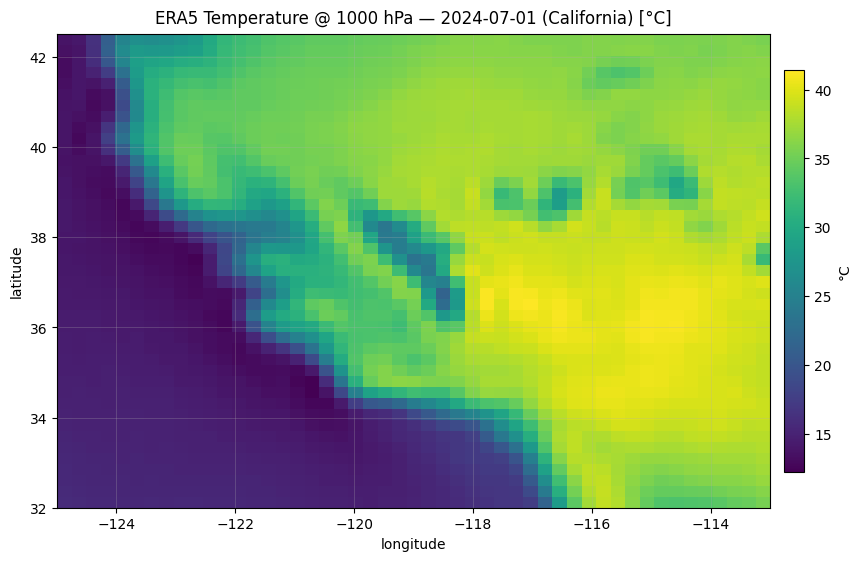

Saved map → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_tC_CA_1000hPa_2024-07-01.png


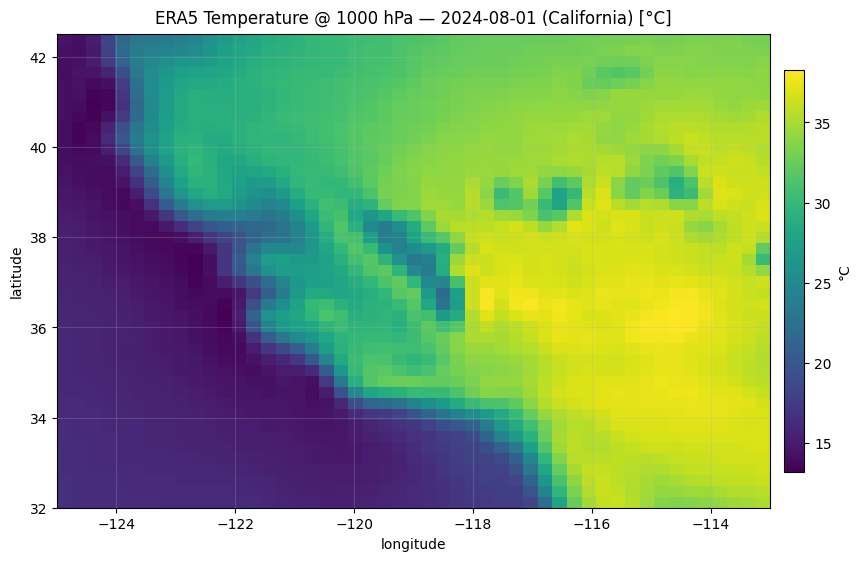

Saved map → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_tC_CA_1000hPa_2024-08-01.png


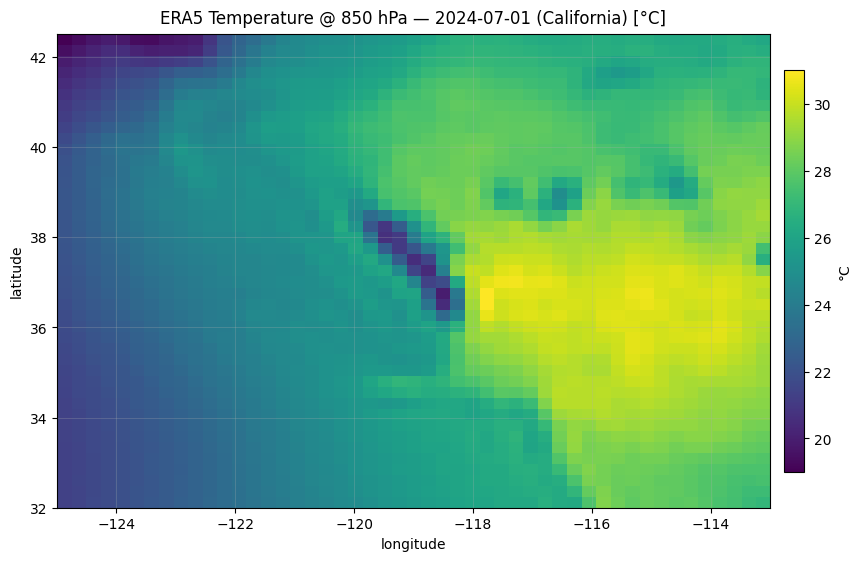

Saved map → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_tC_CA_850hPa_2024-07-01.png


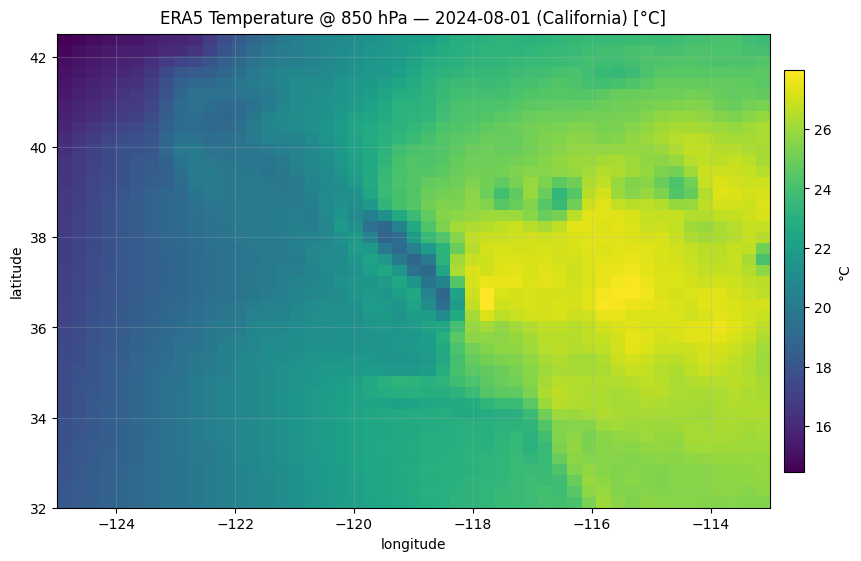

Saved map → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_tC_CA_850hPa_2024-08-01.png


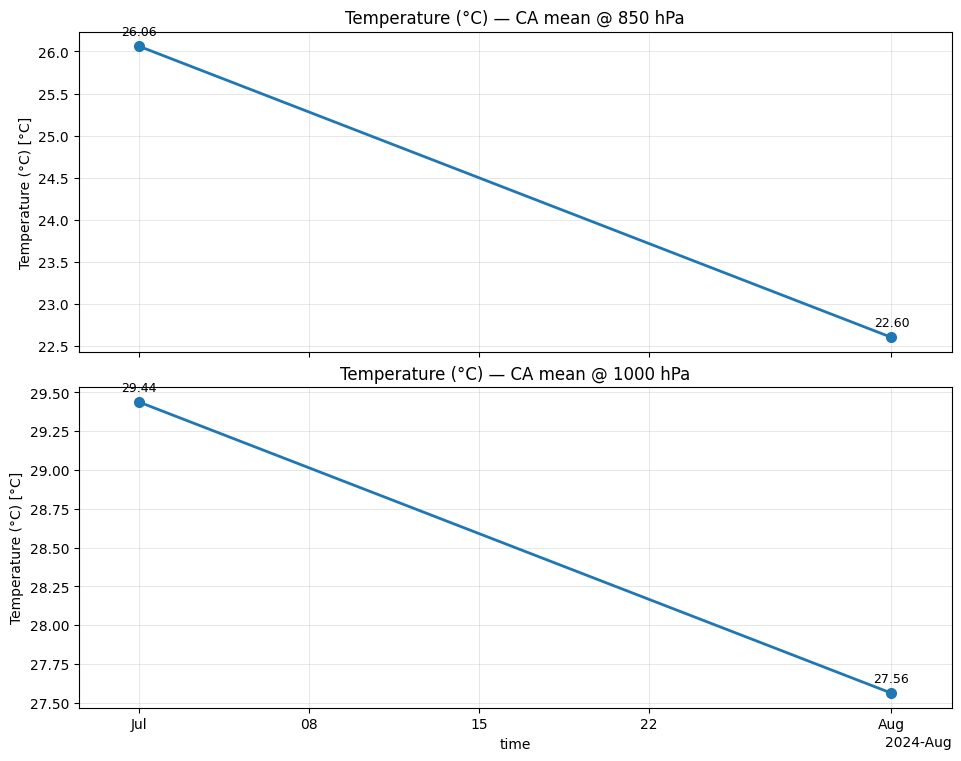

Saved plot → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_CA_timeseries_temperature_(°c).png


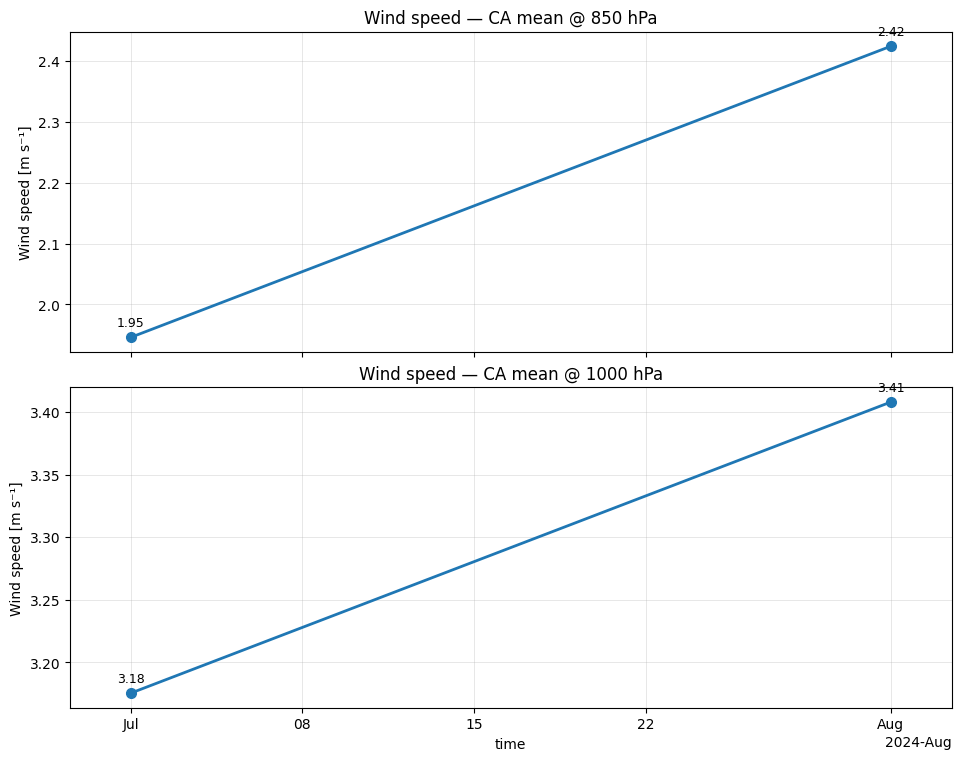

Saved plot → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_CA_timeseries_wind_speed.png


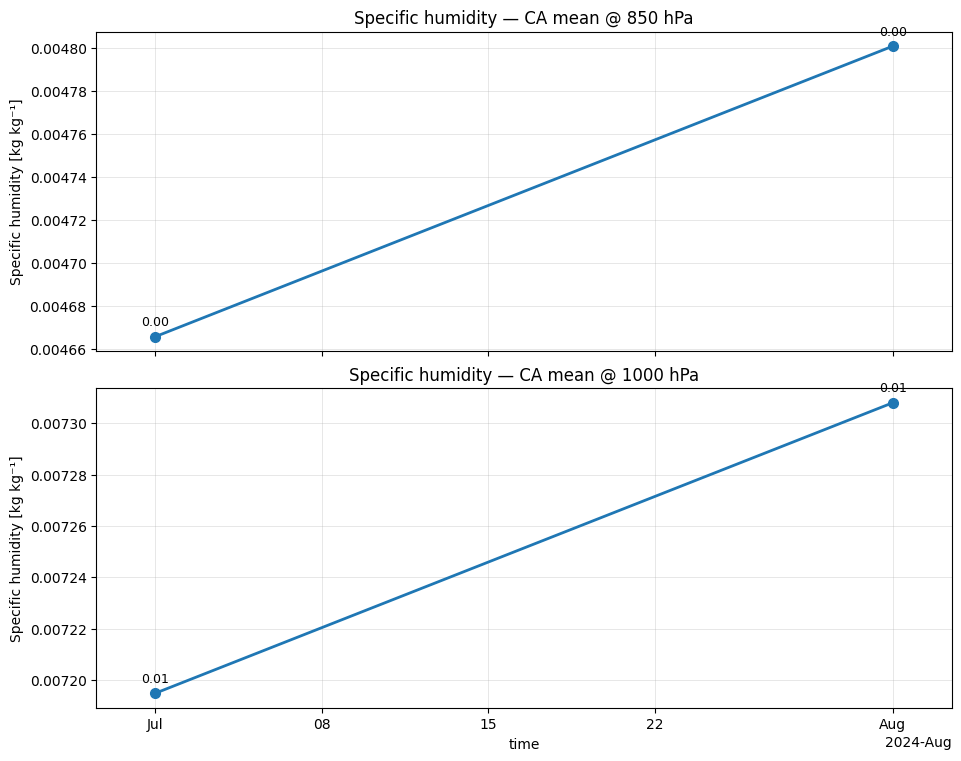

Saved plot → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_CA_timeseries_specific_humidity.png


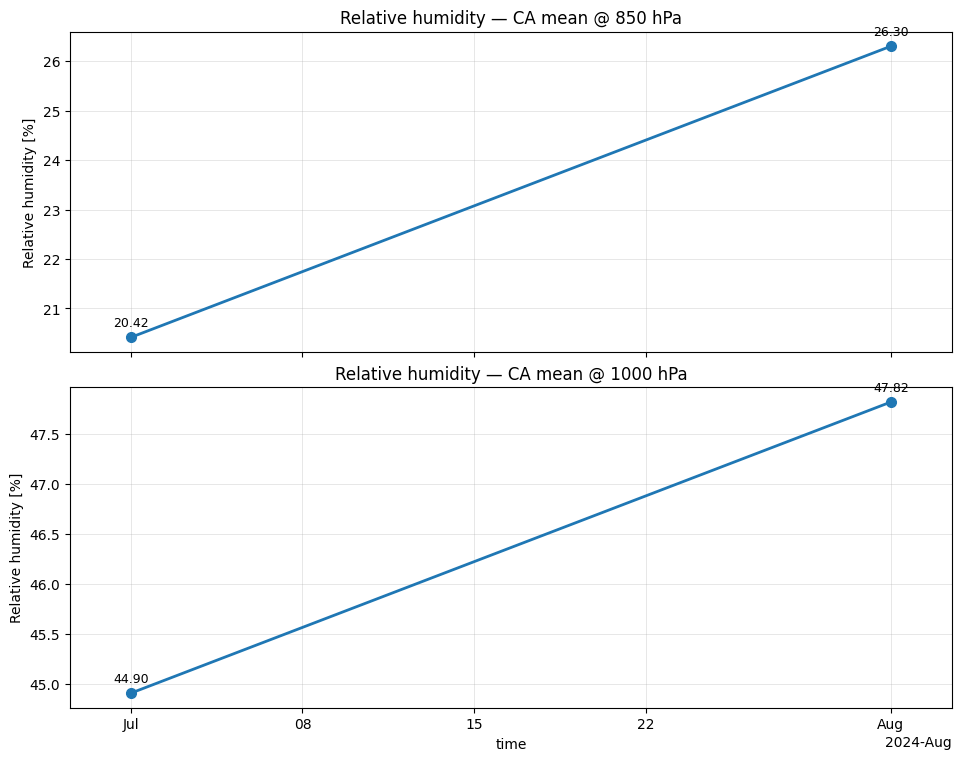

Saved plot → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_CA_timeseries_relative_humidity.png


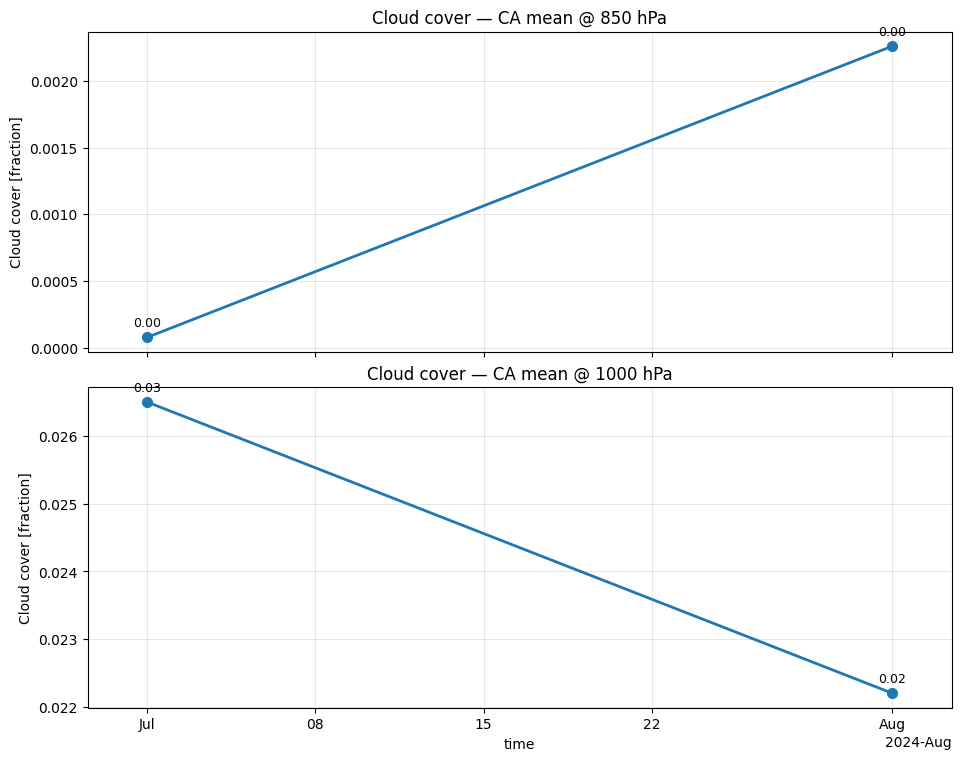

Saved plot → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_CA_timeseries_cloud_cover.png


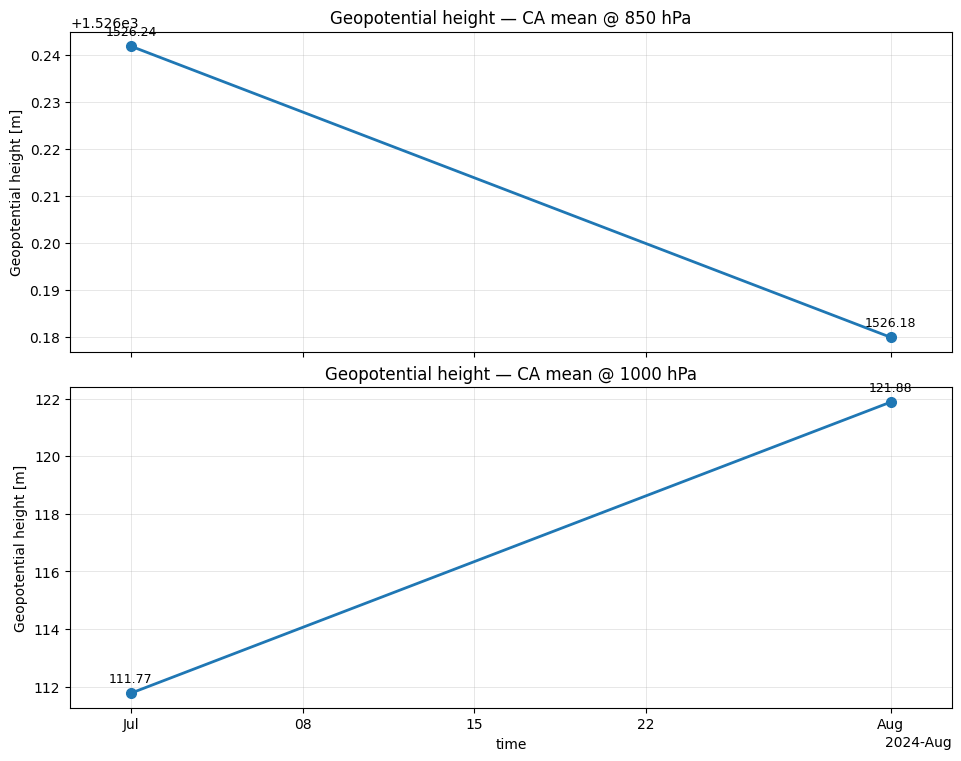

Saved plot → D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\_eda\era5_CA_timeseries_geopotential_height.png


In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr

FILE = r"D:\606Data\ERA5\a146370166d1a2f287c47c3cabcf4ec9\data_stream-moda_stepType-avgua.nc"
OUTDIR = Path(FILE).parent / "_eda"
OUTDIR.mkdir(exist_ok=True)

CA_LON_MIN, CA_LON_MAX = -125.0, -113.0
CA_LAT_MIN, CA_LAT_MAX = 32.0, 42.5

VARS = ["t","u","v","q","r","cc","z"]  
PLEVELS = [1000.0, 850.0]              

ds = xr.open_dataset(FILE)

time_name = "time" if "time" in ds.coords else ("valid_time" if "valid_time" in ds.coords else None)
lat_name  = "latitude" if "latitude" in ds.coords else ("lat" if "lat" in ds.coords else None)
lon_name  = "longitude" if "longitude" in ds.coords else ("lon" if "lon" in ds.coords else None)
plev_name = "pressure_level" if "pressure_level" in ds.coords else None

if not all([time_name, lat_name, lon_name, plev_name]):
    raise SystemExit(f"Could not find expected ERA5 coords. Found: {list(ds.coords)}")

lon = ds[lon_name]
lon180 = xr.where(lon > 180, lon - 360, lon)
ds = ds.assign_coords({lon_name: lon180}).sortby(lon_name)

present = [v for v in VARS if v in ds.data_vars]
missing = [v for v in VARS if v not in ds.data_vars]
if missing:
    print("Skipping missing vars:", missing)
sub = ds[present]

plevs_avail = set([float(v) for v in sub[plev_name].values])
plevs = [p for p in PLEVELS if p in plevs_avail]
if not plevs:
    raise SystemExit(f"No requested pressure levels found. Available: {sorted(plevs_avail)}")

sub_ca = sub.sel({lon_name: slice(CA_LON_MIN, CA_LON_MAX),
                  lat_name: slice(CA_LAT_MAX, CA_LAT_MIN)}, 
                 drop=True).sel({plev_name: plevs})

g0 = 9.80665  
if all(v in sub_ca for v in ["u","v"]):
    sub_ca = sub_ca.assign(ws = np.hypot(sub_ca["u"], sub_ca["v"]))  # m/s
if "z" in sub_ca:
    sub_ca = sub_ca.assign(gh = sub_ca["z"] / g0)  

def add_units(name, da):
    return da.attrs.get("units") or {"ws":"m s-1", "gh":"m"}.get(name, "")

records = []
for v in list(sub_ca.data_vars):
    da = sub_ca[v]
    mean_sp = da.mean(dim=[lat_name, lon_name], skipna=True)
    min_sp  = da.min(dim=[lat_name, lon_name], skipna=True)
    max_sp  = da.max(dim=[lat_name, lon_name], skipna=True)
    for t in sub_ca[time_name].values:
        for p in sub_ca[plev_name].values:
            m = float(mean_sp.sel({time_name: t, plev_name: p}).values)
            lo = float(min_sp.sel({time_name: t, plev_name: p}).values)
            hi = float(max_sp.sel({time_name: t, plev_name: p}).values)
            records.append({
                "variable": v,
                "units": add_units(v, da),
                "time": pd.to_datetime(t),
                "pressure_hPa": float(p),
                "CA_mean": m,
                "CA_min": lo,
                "CA_max": hi
            })

df = pd.DataFrame(records).sort_values(["variable","pressure_hPa","time"]).reset_index(drop=True)
csv_path = OUTDIR / "era5_CA_summary_timeseries.csv"
df.to_csv(csv_path, index=False)
print("Saved CA summary →", csv_path)
display(df.head(12))

def nice_title(var, p, t, units):
    tstr = pd.to_datetime(t).strftime("%Y-%m-%d")
    return f"ERA5 {var} @ {int(p)} hPa — {tstr} (California) [{units}]"

if "t" in sub_ca:
    t_plot = sub_ca["t"] - 273.15   
    t_units = "°C"
    lats = sub_ca[lat_name].values
    lons = sub_ca[lon_name].values
    extent = [lons.min(), lons.max(), lats.min(), lats.max()]

    for p in plevs:
        for t in sub_ca[time_name].values:
            arr = t_plot.sel({plev_name: p, time_name: t}).astype("float32").values
            fig, ax = plt.subplots(figsize=(8.5, 5.5), constrained_layout=True)
            im = ax.imshow(arr, origin="upper", extent=extent, aspect="auto")
            ax.set_title(nice_title("Temperature", p, t, t_units), pad=8)
            ax.set_xlabel("longitude"); ax.set_ylabel("latitude")
            cb = fig.colorbar(im, ax=ax, shrink=0.85, pad=0.02)
            cb.set_label(t_units)
            ax.grid(alpha=0.3, linewidth=0.6)
            png = OUTDIR / f"era5_tC_CA_{int(p)}hPa_{pd.to_datetime(t).date()}.png"
            fig.savefig(png, dpi=180)
            plt.show()
            print("Saved map →", png)

def plot_timeseries(df_var, var_label, units, yfmt="{:.2f}", ymin=None, ymax=None):
    levels = sorted(df_var["pressure_hPa"].unique())
    fig, axes = plt.subplots(
        nrows=len(levels), ncols=1,
        figsize=(9.5, 6 + 1.5*(len(levels)-1)),
        sharex=True, constrained_layout=True
    )
    if len(levels) == 1:
        axes = [axes]
    for ax, p in zip(axes, levels):
        dff = df_var[df_var["pressure_hPa"] == p].sort_values("time")
        ax.plot(dff["time"], dff["CA_mean"], marker="o", markersize=7, linewidth=2)
        ax.set_ylabel(f"{var_label} [{units}]")
        ax.set_title(f"{var_label} — CA mean @ {int(p)} hPa", pad=6)
        ax.grid(alpha=0.35, linewidth=0.6)
        if ymin is not None or ymax is not None:
            ax.set_ylim(ymin, ymax)
        if len(dff) <= 4:  # label points if only a couple
            for x, y in zip(dff["time"], dff["CA_mean"]):
                ax.annotate(yfmt.format(y), (x, y), textcoords="offset points",
                            xytext=(0, 8), ha="center", fontsize=9)
    axx = axes[-1]
    locator = mdates.AutoDateLocator(minticks=3, maxticks=6)
    axx.xaxis.set_major_locator(locator)
    axx.xaxis.set_major_formatter(mdates.ConciseDateFormatter(locator))
    axx.set_xlabel("time")
    for ax in axes:
        ax.margins(x=0.08)
    safe_var = var_label.lower().replace(" ", "_")
    fig.savefig(OUTDIR / f"era5_CA_timeseries_{safe_var}.png", dpi=180)
    plt.show()
    print("Saved plot →", OUTDIR / f"era5_CA_timeseries_{safe_var}.png")

headline = [v for v in ["t","ws","q","r","cc","gh"] if v in sub_ca]
for v in headline:
    label = {"t":"Temperature (°C)","ws":"Wind speed","q":"Specific humidity",
             "r":"Relative humidity","cc":"Cloud cover","gh":"Geopotential height"}.get(v, v)
    units = {"t":"°C","ws":"m s⁻¹","q":"kg kg⁻¹","r":"%","cc":"fraction","gh":"m"}.get(v, "")
    dff = df[df.variable == v].copy()
    if v == "t":
        dff["CA_mean"] = dff["CA_mean"] - 273.15  # convert for plotting only
    plot_timeseries(dff, label, units)

ds.close()


### HLS EDA 

Reading: D:\606Data\HLS_Dataset\HLS__metadata\hls_geotiff_metadata.csv

--- DIAGNOSTICS ---
Rows: 6700
Columns: ['file', 'path', 'product', 'tile', 'acqdate', 'band', 'size_mb', 'driver', 'crs', 'width', 'height', 'dtype', 'nodata', 'res_x', 'res_y', 'left', 'bottom', 'right', 'top', 'valid_px', 'pct_valid', 'min', 'max', 'mean', 'std']

Sample rows:


file                                               path  product  tile  \
0  HLS-VI.S30.T10SDG.2024229T184919.v2.0.EVI.tif  D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDG....      NaN   NaN   
1  HLS-VI.S30.T10SDG.2024232T185919.v2.0.EVI.tif  D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDG....      NaN   NaN   
2  HLS-VI.S30.T10SDH.2024214T184921.v2.0.EVI.tif  D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDH....      NaN   NaN   
3  HLS-VI.S30.T10SDH.2024229T184919.v2.0.EVI.tif  D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDH....      NaN   NaN   
4  HLS-VI.S30.T10SDH.2024232T185919.v2.0.EVI.tif  D:\606Data\HLS_Dataset\Data\HLS-VI.S30.T10SDH....      NaN   NaN   

   acqdate band  size_mb driver         crs  width  height  dtype   nodata  res_x  res_y      left     bottom  \
0      NaN  EVI     4.17  GTiff  EPSG:32610   3660    3660  int16 -19999.0   30.0   30.0  399960.0  4090200.0   
1      NaN  EVI    12.42  GTiff  EPSG:32610   3660    3660  int16 -19999.0   30.0   30.0  399960.0  4090200.0   
2      NaN  EVI     3.38  GTiff  EPSG:32610   3660    3660  int16 -19999.0   30.0   30.0  399960.0  4190220.0   
3      NaN  EVI     5.61  GTiff  EPSG:32610   3660    3660  int16 -19999.0   30.0   30.0  399960.0  4190220.0   
4      NaN  EVI    13.40  GTiff  EPSG:32610   3660    3660  int16 -19999.0   30.0   30.0  399960.0  4190220.0   

      right        top  valid_px  pct_valid      min      max         mean          std  
0  509760.0  4200000.0   1729847     12.914  -2707.0   2418.0   -42.061203    60.220764  
1  509760.0  4200000.0   7374507     55.052  -8096.0   2449.0    39.179848   110.554359  
2  509760.0  4300020.0   1855056     13.848  -1591.0  25446.0  3919.207764  1406.486206  
3  509760.0  4300020.0   2925738     21.841 -13372.0  11855.0  2638.375977  1979.845825  
4  509760.0  4300020.0   7893971     58.930 -13144.0  10927.0  1288.350098  1875.846802


Chosen file column: file

Product value counts (top 10):
product
EVI      670
FMASK    670
MSAVI    670
NBR      670
NBR2     670
NDMI     670
NDVI     670
NDWI     670
SAVI     670
TVI      670
Name: count, dtype: int64

Parsed non-null dates: 0

Detected numeric columns:
 valid_col: None
 pct_col  : None
 mean_col : mean
 min_col  : min
 max_col  : max

Saved:
 - D:\606Data\HLS_Dataset\HLS__metadata\HLS_prod_summary.csv
 - D:\606Data\HLS_Dataset\HLS__metadata\HLS_prod_date_span.csv
 - D:\606Data\HLS_Dataset\HLS__metadata\HLS_monthly_counts.csv

Preview: prod_summary


product  files  mean_of_means  global_min_of_min  global_max_of_max
0     EVI    670    1868.777437           -32768.0            32711.0
1   FMASK    670     103.354713               64.0              244.0
2   MSAVI    670    1765.277943            -6513.0             9889.0
3     NBR    670    1319.184513            -9974.0             9996.0
4    NBR2    670    1661.246314            -9950.0             9962.0
5    NDMI    670    -235.585407            -9974.0             9997.0
6    NDVI    670    3088.574919            -9993.0             9994.0
7    NDWI    670   -3972.187356            -9986.0             9996.0
8    SAVI    670    1920.800104            -6869.0             9756.0
9     TVI    670     553.860768            -5378.0             7591.0

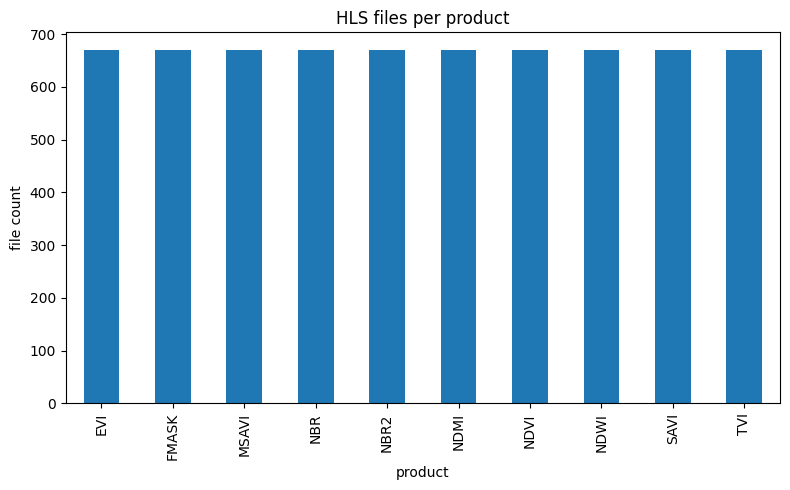

In [7]:
from pathlib import Path
from datetime import datetime
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

META_CSV = Path(r"D:\606Data\HLS_Dataset\HLS__metadata\hls_geotiff_metadata.csv")
QA_CSV   = Path(r"D:\606Data\HLS_Dataset\Data\hls_qa_value_counts.csv")  

OUTDIR = META_CSV.parent
print("Reading:", META_CSV)
meta = pd.read_csv(META_CSV)

print("\n--- DIAGNOSTICS ---")
print("Rows:", len(meta))
print("Columns:", list(meta.columns))
print("\nSample rows:")
display(meta.head(5))

def pick_file_column(df):
    cand_order = [
        "file", "filename", "basename", "name", "File", "Filename", "Name",
        "path", "Path", "fullpath", "FullPath", "filepath", "FilePath"
    ]
    cols_low = {c.lower(): c for c in df.columns}
    for c in cand_order:
        if c in df.columns: return c
        if c.lower() in cols_low: return cols_low[c.lower()]
    for c in df.columns:
        if df[c].dtype == "object" and df[c].astype(str).str.contains(r"[\\/].*\.tif$", regex=True).any():
            return c
    return None

file_col = pick_file_column(meta)
if file_col is None:
    meta["file"] = meta.index.astype(str)
    file_col = "file"
print("\nChosen file column:", file_col)

def to_basename(x):
    s = str(x)
    return os.path.basename(s)

meta["file_base"] = meta[file_col].apply(to_basename)

def parse_product(fname: str):
    s = str(fname)
    m = re.search(r'\.(EVI|NDVI|MSAVI|NBR|SAVI|NDMI|NDSI|QA|Fmask)\.tif$', s, re.IGNORECASE)
    if m: return m.group(1).upper()
    m2 = re.search(r'\.([A-Za-z0-9]+)\.tif$', s)
    if m2: return m2.group(1).upper()
    m3 = re.search(r'(EVI|NDVI|MSAVI|NBR|SAVI|NDMI|NDSI)', s, re.IGNORECASE)
    if m3: return m3.group(1).upper()
    return "UNKNOWN"

meta["product"] = meta["file_base"].apply(parse_product)
print("\nProduct value counts (top 10):")
print(meta["product"].value_counts().head(10))

def parse_date_from_name(fname: str):
    s = str(fname)
    m = re.search(r'\.(\d{8})T?\d{0,6}\.', s)
    if m:
        try: return datetime.strptime(m.group(1), "%Y%m%d").date()
        except: pass
    m2 = re.search(r'(\d{8})', s)
    if m2:
        y = int(m2.group(1)[:4])
        mm = int(m2.group(1)[4:6])
        dd = int(m2.group(1)[6:8])
        if 2000 <= y <= 2100 and 1 <= mm <= 12 and 1 <= dd <= 31:
            try: return datetime.strptime(m2.group(1), "%Y%m%d").date()
            except: pass
    return None

meta["date"] = meta["file_base"].apply(parse_date_from_name)

date_like_cols = [c for c in meta.columns if re.search(r"date|time|acq|acquisition|sensing", c, re.I)]
for c in date_like_cols:
    cand = pd.to_datetime(meta[c], errors="coerce", utc=True).dt.date
    if cand.notna().sum() > meta["date"].notna().sum():
        meta["date"] = cand

print("\nParsed non-null dates:", int(meta["date"].notna().sum()))
meta["month"] = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")

def find_col(df, cands):
    for c in df.columns:
        if str(c).lower() in [x.lower() for x in cands]:
            return c
    return None

valid_col = find_col(meta, ["valid_pixels", "validpix", "n_valid"])
pct_col   = find_col(meta, ["pct_nonzero", "pctnonzero", "percent_nonzero", "pct_non_zero"])
mean_col  = find_col(meta, ["mean", "val_mean"])
min_col   = find_col(meta, ["min", "val_min"])
max_col   = find_col(meta, ["max", "val_max"])

print("\nDetected numeric columns:")
print(" valid_col:", valid_col)
print(" pct_col  :", pct_col)
print(" mean_col :", mean_col)
print(" min_col  :", min_col)
print(" max_col  :", max_col)

agg = {"files": ("file_base", "count")}
if valid_col: agg["total_valid_pixels"] = (valid_col, "sum")
if pct_col:   agg["avg_pct_nonzero"]   = (pct_col, "mean")
if mean_col:  agg["mean_of_means"]     = (mean_col, "mean")
if min_col:   agg["global_min_of_min"] = (min_col, "min")
if max_col:   agg["global_max_of_max"] = (max_col, "max")

prod_summary = (
    meta.assign(product=meta["product"].fillna("UNKNOWN"))
        .groupby("product", dropna=False)
        .agg(**agg)
        .reset_index()
        .sort_values("files", ascending=False)
)

date_span = (
    meta.dropna(subset=["date"])
        .groupby("product")
        .agg(first_date=("date","min"), last_date=("date","max"), n_files=("file_base","count"))
        .reset_index()
        .sort_values("product")
)

monthly_counts = (
    meta.dropna(subset=["month"])
        .groupby(["month","product"]).size()
        .reset_index(name="count")
        .sort_values(["month","product"])
)

out_prod  = OUTDIR / "HLS_prod_summary.csv"
out_span  = OUTDIR / "HLS_prod_date_span.csv"
out_month = OUTDIR / "HLS_monthly_counts.csv"

prod_summary.to_csv(out_prod, index=False)
date_span.to_csv(out_span, index=False)
monthly_counts.to_csv(out_month, index=False)

print("\nSaved:")
print(" -", out_prod)
print(" -", out_span)
print(" -", out_month)

print("\nPreview: prod_summary")
display(prod_summary.head(20))

if not prod_summary.empty:
    counts = prod_summary.set_index("product")["files"].sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    counts.plot(kind="bar")
    plt.title("HLS files per product")
    plt.xlabel("product"); plt.ylabel("file count")
    plt.tight_layout(); plt.show()

if not monthly_counts.empty:
    tm = monthly_counts.groupby("month")["count"].sum().reset_index()
    tm["month_str"] = tm["month"].astype(str)
    plt.figure(figsize=(9,4.5))
    plt.plot(tm["month_str"], tm["count"], marker="o")
    plt.title("HLS total files per month (all products)")
    plt.xlabel("month"); plt.ylabel("file count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()

### MODIS Burned Area (MCD64A1 v061)

Reading: D:\606Data\MODISTera_GEOTIFF_File\_metadata\modis_ba_geotiff_metadata.csv
Reading: D:\606Data\MODISTera_GEOTIFF_File\_metadata\modis_ba_geotiff_doy_counts.csv

Saved:
 - D:\606Data\MODISTera_GEOTIFF_File\_eda\MODIS_BA_summary_by_tile.csv
 - D:\606Data\MODISTera_GEOTIFF_File\_eda\MODIS_BA_burned_by_month.csv
 - D:\606Data\MODISTera_GEOTIFF_File\_eda\MODIS_BA_top_doy.csv

By tile:



By month:


month  files  burned_pixels  valid_pixels  pct_burned
0  2024-07      5          38477      28800000    0.133601
1  2024-08      5          14566      28800000    0.050576


Top DOY bins (first 20):


DOY  count
24  207.0   4595
26  209.0   4205
25  208.0   3651
38  221.0   2480
13  196.0   2282
19  202.0   2269
27  210.0   2164
20  203.0   2143
23  206.0   1966
22  205.0   1817
11  194.0   1737
21  204.0   1535
37  220.0   1347
36  219.0   1344
14  197.0   1136
28  211.0   1076
39  222.0    931
12  195.0    928
17  200.0    885
29  212.0    829

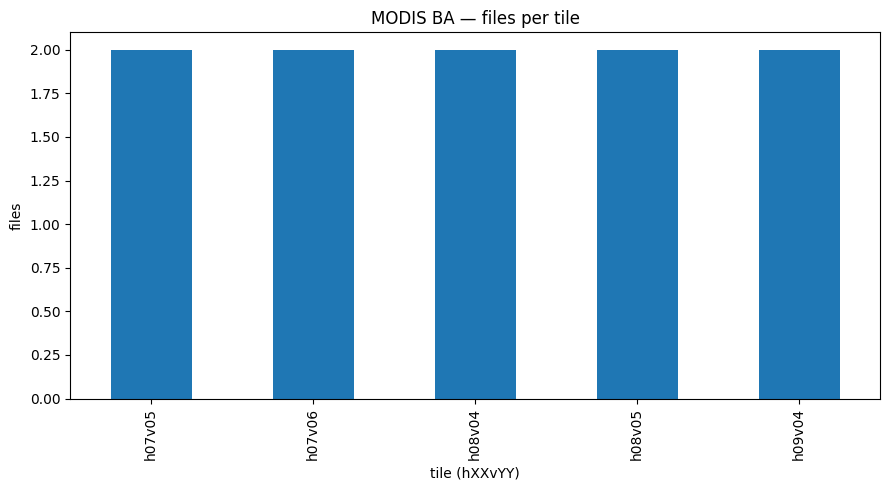

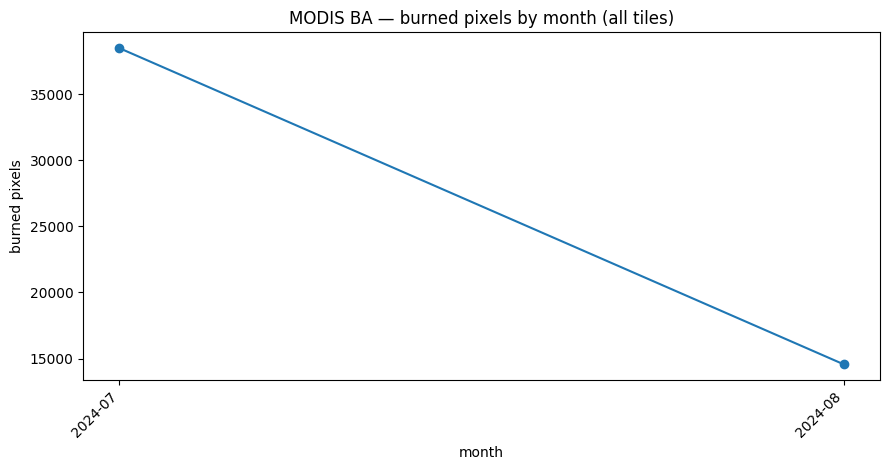

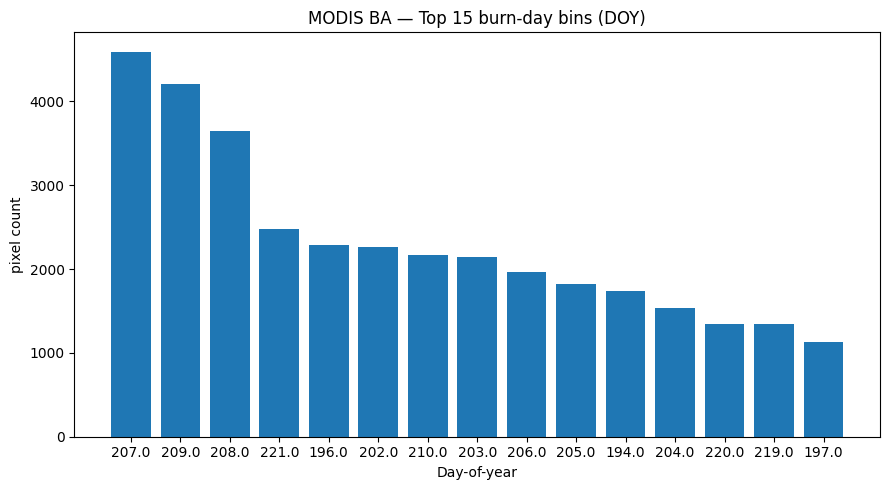

In [11]:
# === MODIS Burned Area (MCD64A1) — EDA tailored to your CSV schemas ==========
from pathlib import Path
from datetime import datetime, timedelta
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Paths (adjust BASE if needed) ------------------------------------------
BASE = Path(r"D:\606Data\MODISTera_GEOTIFF_File\_metadata")
META_CSV = BASE / "modis_ba_geotiff_metadata.csv"     # has valid_burn_pixels, pct_burned, etc.
DOY_CSV  = BASE / "modis_ba_geotiff_doy_counts.csv"   # has file, DOY, count

OUTDIR = BASE.parent / "_eda"
OUTDIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

# ---- Load --------------------------------------------------------------------
print("Reading:", META_CSV)
meta = pd.read_csv(META_CSV)

print("Reading:", DOY_CSV)
doy = pd.read_csv(DOY_CSV)

# ---- Helpers -----------------------------------------------------------------
def parse_tile(fname: str) -> str:
    m = re.search(r'h(\d{2})v(\d{2})', str(fname), re.IGNORECASE)
    return f"h{m.group(1)}v{m.group(2)}" if m else "h??v??"

def parse_yday(fname: str):
    # Pattern like: MCD64A1.AYYYYDDD.hXXvYY...
    m = re.search(r'\.A(\d{4})(\d{3})\.', str(fname))
    if not m:
        return None, None, None
    year = int(m.group(1)); doy = int(m.group(2))
    date = (datetime(year, 1, 1) + timedelta(doy-1)).date()
    return year, doy, date

# ---- Normalize filename base, tile, date ------------------------------------
meta["file_base"] = meta["file"].astype(str).apply(lambda s: Path(s).name)
meta["tile"] = meta["file_base"].apply(parse_tile)
meta["year"], meta["yday"], meta["date"] = zip(*meta["file_base"].apply(parse_yday))
meta["month"] = pd.to_datetime(meta["date"]).dt.to_period("M")

doy["file_base"] = doy["file"].astype(str).apply(lambda s: Path(s).name)
doy["tile"] = doy["file_base"].apply(parse_tile)

# ---- Burned pixels from DOY table (1..366) -----------------------------------
# Your DOY CSV already has DOY and count columns with those exact names.
doy["is_burned"] = doy["DOY"].between(1, 366)
burned_by_file = (
    doy[doy["is_burned"]]
    .groupby("file_base")["count"].sum()
    .reset_index()
    .rename(columns={"count": "burned_pixels_from_DOY"})
)

# Attach to metadata (compare to valid_burn_pixels if present)
meta = meta.merge(burned_by_file, on="file_base", how="left")
meta["burned_pixels_from_DOY"] = meta["burned_pixels_from_DOY"].fillna(0).astype(int)

# ---- Choose numeric columns already present in metadata ----------------------
# valid_burn_pixels = post-mask burned pixels (from your extraction)
# finite_pixels_before_filter = denominator for pct_burned
if "pct_burned" not in meta.columns and "finite_pixels_before_filter" in meta.columns:
    denom = meta["finite_pixels_before_filter"].replace(0, np.nan)
    meta["pct_burned"] = 100.0 * meta["valid_burn_pixels"] / denom

# ---- Summaries ---------------------------------------------------------------
# 1) By tile
by_tile = (meta.groupby("tile")
           .agg(files=("file_base","count"),
                burned_pixels=("valid_burn_pixels","sum"),
                burned_pixels_from_DOY=("burned_pixels_from_DOY","sum"),
                valid_pixels=("finite_pixels_before_filter","sum"),
                mean_pct_burned=("pct_burned","mean"))
           .reset_index()
           .sort_values("files", ascending=False))

# 2) By month (across all CA tiles you have)
by_month = (meta.dropna(subset=["month"])
            .groupby("month")
            .agg(files=("file_base","count"),
                 burned_pixels=("valid_burn_pixels","sum"),
                 valid_pixels=("finite_pixels_before_filter","sum"))
            .reset_index()
            .sort_values("month"))
by_month["pct_burned"] = np.where(by_month["valid_pixels"] > 0,
                                  100.0 * by_month["burned_pixels"] / by_month["valid_pixels"],
                                  np.nan)

# 3) Top DOY bins overall
top_doy = (doy[doy["is_burned"]]
           .groupby("DOY")["count"].sum()
           .reset_index()
           .sort_values("count", ascending=False))

# ---- Save tidy outputs -------------------------------------------------------
out_by_tile  = OUTDIR / "MODIS_BA_summary_by_tile.csv"
out_by_month = OUTDIR / "MODIS_BA_burned_by_month.csv"
out_top_doy  = OUTDIR / "MODIS_BA_top_doy.csv"

by_tile.to_csv(out_by_tile, index=False)
by_month.to_csv(out_by_month, index=False)
top_doy.to_csv(out_top_doy, index=False)

print("\nSaved:")
print(" -", out_by_tile)
print(" -", out_by_month)
print(" -", out_top_doy)

# ---- Inline previews ---------------------------------------------------------
print("\nBy tile:")
display(by_tile.head(20).style.format({
    "burned_pixels": "{:,.0f}",
    "burned_pixels_from_DOY": "{:,.0f}",
    "valid_pixels": "{:,.0f}",
    "mean_pct_burned": "{:.3f}",
}))

print("\nBy month:")
display(by_month.head(20))

print("\nTop DOY bins (first 20):")
display(top_doy.head(20))

# ---- Charts ------------------------------------------------------------------
# Files per tile
plt.figure(figsize=(9,5))
(by_tile.set_index("tile")["files"]
        .sort_values(ascending=False)
        .plot(kind="bar"))
plt.title("MODIS BA — files per tile")
plt.xlabel("tile (hXXvYY)"); plt.ylabel("files")
plt.tight_layout(); plt.show()

# Burned pixels by month
if not by_month.empty:
    plt.figure(figsize=(9,4.8))
    x = by_month["month"].astype(str)
    y = by_month["burned_pixels"]
    plt.plot(x, y, marker="o")
    plt.title("MODIS BA — burned pixels by month (all tiles)")
    plt.xlabel("month"); plt.ylabel("burned pixels")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()

# Top DOY (bar, top 15)
n_top = min(15, len(top_doy))
if n_top:
    plt.figure(figsize=(9,5))
    plt.bar(top_doy["DOY"].head(n_top).astype(str), top_doy["count"].head(n_top))
    plt.title(f"MODIS BA — Top {n_top} burn-day bins (DOY)")
    plt.xlabel("Day-of-year"); plt.ylabel("pixel count")
    plt.tight_layout(); plt.show()


### OPERA

Reading metadata: D:\606Data\OPERA_Dataset\OPERA__metadata\opera_geotiff_metadata.csv
Reading value-counts: D:\606Data\OPERA_Dataset\OPERA__metadata\opera_value_counts.csv

Saved:
 - D:\606Data\OPERA_Dataset\_eda\OPERA_summary_by_product.csv
 - D:\606Data\OPERA_Dataset\_eda\OPERA_summary_by_month.csv
 - D:\606Data\OPERA_Dataset\_eda\OPERA_value_counts_overall.csv

By product:



By month:


month  files  valid_pixels  nonzero_pixels  pct_nonzero
0  2024-08  10450   35206486138     35206486138        100.0


Top values overall (first 20):


value       count
194    200  6462675005
0        1  5639646794
973   1321  1255956761
1        2  1251412314
976   1324  1217818714
966   1314  1146050252
972   1320  1017770208
974   1322   987590947
970   1318   910133091
968   1316   898811042
978   1326   847717524
977   1325   773282317
975   1323   732130523
969   1317   726079507
2        3   661787632
965   1313   562055548
971   1319   545074958
6        7   526667308
980   1328   453706654
979   1327   353372350

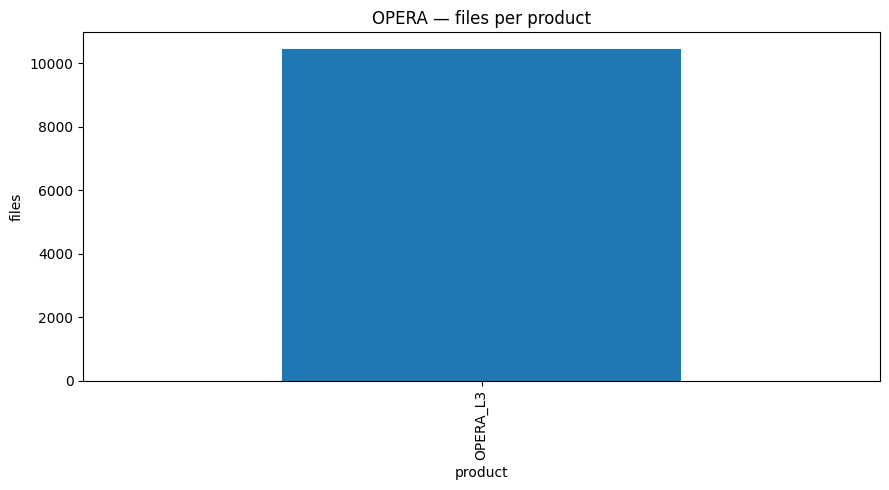

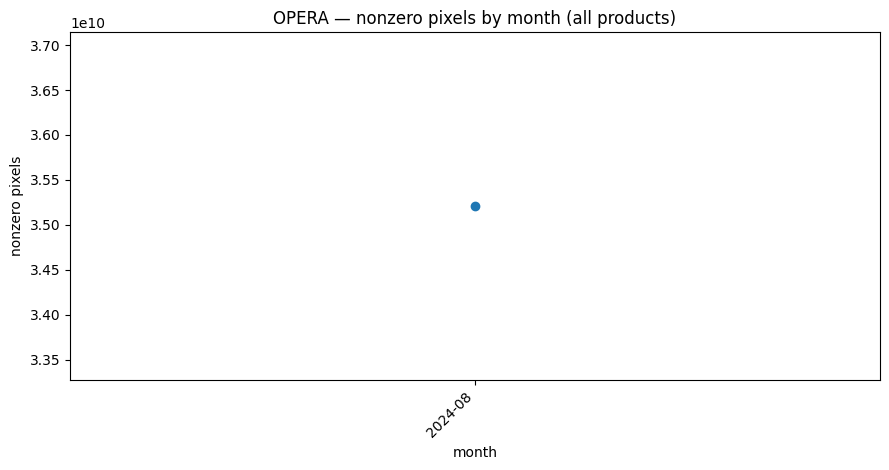

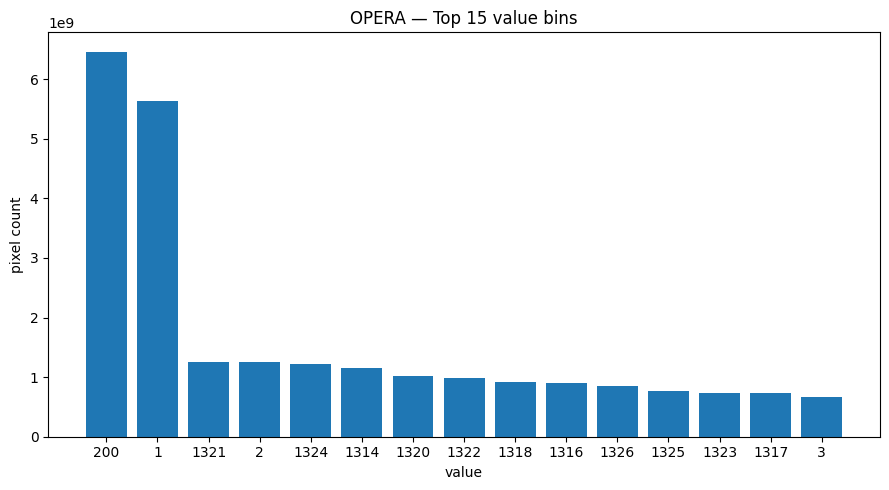

In [12]:
# === OPERA GeoTIFFs — EDA from saved metadata (robust) =======================
from pathlib import Path
from datetime import datetime
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path(r"D:\606Data\OPERA_Dataset\Data")
META_DIR = Path(r"D:\606Data\OPERA_Dataset\OPERA__metadata")
OUTDIR   = META_DIR.parent / "_eda"
OUTDIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

# ---- Find metadata/value-counts CSVs ----------------------------------------
def find_first_csv(folder: Path, patterns):
    pats = [p.lower() for p in patterns]
    cands = sorted(folder.glob("*.csv"))
    for fp in cands:
        name = fp.name.lower()
        if any(p in name for p in pats):
            return fp
    return None

meta_csv = find_first_csv(META_DIR, ["summary", "metadata"])
vc_csv   = find_first_csv(META_DIR, ["value_counts", "val_counts", "counts"])

if meta_csv is None:
    raise SystemExit(f"No metadata CSV found in {META_DIR}. "
                     f"Expected a file named like 'OPERA_summary.csv' or '*metadata*.csv'.")

print("Reading metadata:", meta_csv)
meta = pd.read_csv(meta_csv)

if vc_csv:
    print("Reading value-counts:", vc_csv)
    vcounts = pd.read_csv(vc_csv)
else:
    vcounts = None
    print("No value-counts CSV found (optional).")

# ---- Helpers -----------------------------------------------------------------
def basename(x): return Path(str(x)).name

def parse_date(fname: str):
    """
    Try YYYYMMDD (most common). If not present, try YYYY-MM-DD.
    Return datetime.date or None.
    """
    s = str(fname)
    m = re.search(r'(\d{4})(\d{2})(\d{2})', s)  # YYYYMMDD
    if m:
        y, mm, dd = map(int, m.groups())
        try: return datetime(y, mm, dd).date()
        except: return None
    m2 = re.search(r'(\d{4})-(\d{2})-(\d{2})', s)  # YYYY-MM-DD
    if m2:
        y, mm, dd = map(int, m2.groups())
        try: return datetime(y, mm, dd).date()
        except: return None
    return None

def parse_product(fname: str):
    """
    Heuristic: take the token right before the .tif (e.g., 'NBR', 'MASK', 'ALERT'),
    or the first uppercase token after 'OPERA_' if present.
    Adjust if your filenames have a known convention.
    """
    s = basename(fname)
    m = re.search(r'\.([A-Za-z0-9]+)\.tif$', s)
    if m:
        return m.group(1).upper()
    m2 = re.search(r'(OPERA_[A-Za-z0-9\-]+)', s)
    if m2:
        return m2.group(1).upper()
    # fallback: prefix chunk
    return s.split('_')[0].upper()

# ---- Normalize columns -------------------------------------------------------
# Ensure a filename column exists to parse from
file_col = None
for c in meta.columns:
    if c.lower() in {"file", "filename", "basename", "name"}:
        file_col = c
        break
if file_col is None:
    file_col = "path" if "path" in meta.columns else meta.columns[0]

meta["file_base"] = meta[file_col].astype(str).apply(basename)
meta["product"]   = meta["file_base"].apply(parse_product)
meta["date"]      = meta["file_base"].apply(parse_date)
meta["month"]     = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")

# Try to detect common numeric columns that earlier scripts produced
def find_col(df, cands):
    low = {c.lower(): c for c in df.columns}
    for k in cands:
        if k in df.columns: return k
        if k.lower() in low: return low[k.lower()]
    return None

valid_col  = find_col(meta, ["valid_pixels"])
nonzero_c  = find_col(meta, ["nonzero_pixels"])
pct_col    = find_col(meta, ["pct_nonzero"])
height_col = find_col(meta, ["height"])
width_col  = find_col(meta, ["width"])

# ---- Summaries ---------------------------------------------------------------
# by product
agg = {"files": ("file_base", "count")}
if valid_col: agg["total_valid_pixels"] = (valid_col, "sum")
if nonzero_c: agg["total_nonzero_pixels"] = (nonzero_c, "sum")
if pct_col:   agg["avg_pct_nonzero"] = (pct_col, "mean")

by_product = (
    meta.groupby("product", dropna=False)
        .agg(**agg)
        .reset_index()
        .sort_values("files", ascending=False)
)

# by month (across products)
by_month = (
    meta.dropna(subset=["month"])
        .groupby("month")
        .agg(files=("file_base","count"),
             valid_pixels=(valid_col,"sum") if valid_col else ("file_base","count"),
             nonzero_pixels=(nonzero_c,"sum") if nonzero_c else ("file_base","count"))
        .reset_index()
        .sort_values("month")
)
if valid_col and nonzero_c and not by_month.empty:
    by_month["pct_nonzero"] = np.where(by_month["valid_pixels"] > 0,
                                       100.0 * by_month["nonzero_pixels"] / by_month["valid_pixels"],
                                       np.nan)

# Optional: top frequent values across the stack (from value_counts CSV)
vc_top = pd.DataFrame()
if vcounts is not None:
    # try to harmonize columns
    file_c  = find_col(vcounts, ["file","filename","basename","path"])
    value_c = find_col(vcounts, ["value","val","class","code"])
    count_c = find_col(vcounts, ["count","n","freq","pixels"])
    if all([file_c, value_c, count_c]):
        vc_top = (
            vcounts.groupby(value_c)[count_c].sum()
                   .reset_index()
                   .rename(columns={value_c: "value", count_c: "count"})
                   .sort_values("count", ascending=False)
        )

# ---- Save CSVs ---------------------------------------------------------------
out_by_prod  = OUTDIR / "OPERA_summary_by_product.csv"
out_by_month = OUTDIR / "OPERA_summary_by_month.csv"
out_values   = OUTDIR / "OPERA_value_counts_overall.csv"

by_product.to_csv(out_by_prod, index=False)
by_month.to_csv(out_by_month, index=False)
if not vc_top.empty:
    vc_top.to_csv(out_values, index=False)

print("\nSaved:")
print(" -", out_by_prod)
print(" -", out_by_month)
print(" -", (out_values if not vc_top.empty else "(no value-counts written)"))

# ---- Inline previews ---------------------------------------------------------
print("\nBy product:")
display(by_product.head(20).style.format({
    "total_valid_pixels": "{:,.0f}",
    "total_nonzero_pixels": "{:,.0f}",
    "avg_pct_nonzero": "{:.2f}",
}))

print("\nBy month:")
display(by_month.head(20))

if not vc_top.empty:
    print("\nTop values overall (first 20):")
    display(vc_top.head(20))

# ---- Charts ------------------------------------------------------------------
# 1) Files per product
if not by_product.empty:
    plt.figure(figsize=(9,5))
    by_product.set_index("product")["files"].sort_values(ascending=False).plot(kind="bar")
    plt.title("OPERA — files per product")
    plt.xlabel("product")
    plt.ylabel("files")
    plt.tight_layout()
    plt.show()

# 2) Nonzero pixels by month
if not by_month.empty and "nonzero_pixels" in by_month.columns:
    plt.figure(figsize=(9,4.8))
    x = by_month["month"].astype(str)
    y = by_month["nonzero_pixels"]
    plt.plot(x, y, marker="o")
    plt.title("OPERA — nonzero pixels by month (all products)")
    plt.xlabel("month"); plt.ylabel("nonzero pixels")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 3) Top value bins (bar of top 15)
if not vc_top.empty:
    n_top = min(15, len(vc_top))
    plt.figure(figsize=(9,5))
    plt.bar(vc_top["value"].astype(str).head(n_top), vc_top["count"].head(n_top))
    plt.title(f"OPERA — Top {n_top} value bins")
    plt.xlabel("value"); plt.ylabel("pixel count")
    plt.tight_layout()
    plt.show()


### SMAP Enhanced L3 9km (V006)

Reading metadata: D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006\SMAP9__metadata\smap9_file_summary.csv
No QA/value-counts CSV found (optional).

Detected columns:
  file_col   : file
  sm_mean_col: val_mean
  sm_min_col : val_min
  sm_max_col : val_max
  valid_col  : None
  nonzero_col: None
  pct_col    : None

Saved:
 - D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006\_eda\SMAP9_monthly_summary.csv
 - D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006\_eda\SMAP9_overall_summary.csv

Monthly summary (first 20 rows):


month  files  sm_mean_monthly  sm_min_monthly  sm_max_monthly
0  2024-07     12         0.209172            0.02        0.868441
1  2024-08     20         0.209072            0.02        0.859692


Overall summary:


files  sm_mean_overall  sm_min_overall  sm_max_overall
0     32          0.20911            0.02        0.862973

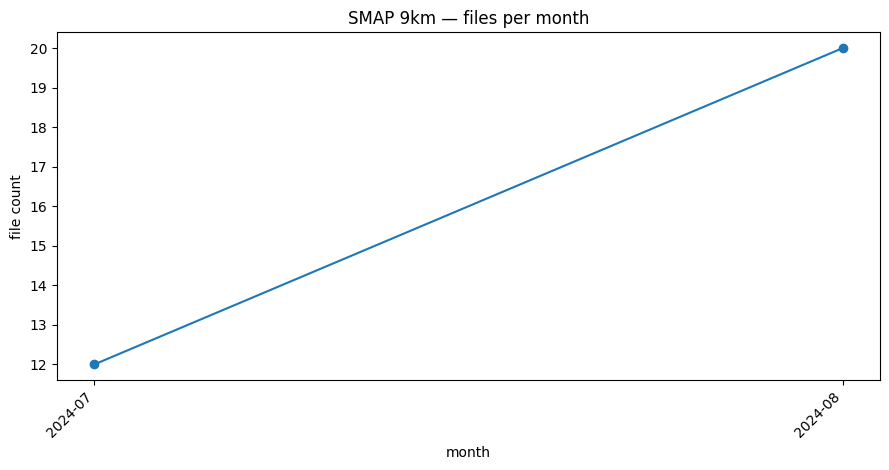

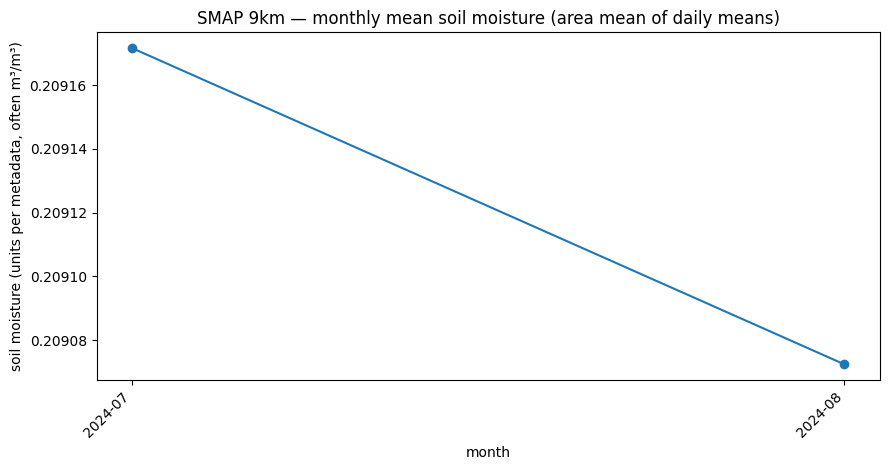

In [13]:
# === SMAP Enhanced L3 9km (V006) — EDA from saved metadata ===================
from pathlib import Path
from datetime import datetime
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path(r"D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006\Data")
META_DIR = Path(r"D:\606Data\SMAP_Enhanced_L3_Radiometer_Global_and_PolarGrid_Daily_9km_EASE_Grid_SoilMoisture_V006\SMAP9__metadata")
OUTDIR   = META_DIR.parent / "_eda"
OUTDIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)
pd.set_option("display.width", 160)

# ---- Find metadata/value-counts CSVs ----------------------------------------
def find_first_csv(folder: Path, patterns):
    pats = [p.lower() for p in patterns]
    cands = sorted(folder.glob("*.csv"))
    for fp in cands:
        name = fp.name.lower()
        if any(p in name for p in pats):
            return fp
    return None

meta_csv = find_first_csv(META_DIR, ["metadata", "summary"])
qa_csv   = find_first_csv(META_DIR, ["qa", "value_counts", "flags", "bit"])

if meta_csv is None:
    raise SystemExit(f"No metadata CSV found in {META_DIR}. "
                     f"Expected something like '*metadata*.csv' or '*summary*.csv'.")

print("Reading metadata:", meta_csv)
meta = pd.read_csv(meta_csv)

if qa_csv:
    print("Reading QA/value-counts (optional):", qa_csv)
    qa = pd.read_csv(qa_csv)
else:
    qa = None
    print("No QA/value-counts CSV found (optional).")

# ---- Helpers -----------------------------------------------------------------
def basename(x): return Path(str(x)).name

def parse_date(fname: str):
    """
    Try to extract acquisition date from SMAP filenames.
    Common tokens: YYYYMMDD or YYYYMMDDThhmmss.
    """
    s = str(fname)
    m = re.search(r'(\d{8})T?\d{0,6}', s)  # YYYYMMDD
    if m:
        try:
            return datetime.strptime(m.group(1), "%Y%m%d").date()
        except Exception:
            return None
    return None

def find_col(df, candidates_exact=(), candidates_contains=()):
    low = {c.lower(): c for c in df.columns}
    for k in candidates_exact:
        if k in df.columns: return k
        if k.lower() in low: return low[k.lower()]
    for c in df.columns:
        name = c.lower()
        if any(tok.lower() in name for tok in candidates_contains):
            return c
    return None

# ---- Normalize filename column and parse dates -------------------------------
file_col = find_col(meta, candidates_exact=("file","filename","basename","name","path"),
                    candidates_contains=("file","name","path"))
if file_col is None:
    file_col = meta.columns[0]

meta["file_base"] = meta[file_col].astype(str).apply(basename)
meta["date"]      = meta["file_base"].apply(parse_date)
meta["month"]     = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")

# ---- Detect useful numeric columns ------------------------------------------
# Try to find soil moisture stats and pixel counts produced by your earlier scanner
sm_mean_col = find_col(meta, ("sm_mean","soil_moisture_mean","mean"),
                       ("soil_moisture","sm_mean","val_mean","mean"))
sm_min_col  = find_col(meta, ("sm_min","soil_moisture_min","min"), ("sm_min","val_min","min"))
sm_max_col  = find_col(meta, ("sm_max","soil_moisture_max","max"), ("sm_max","val_max","max"))
valid_col   = find_col(meta, ("valid_pixels","n_valid","validpix"), ("valid","n_valid","validpix"))
nonzero_col = find_col(meta, ("nonzero_pixels","n_nonzero"), ("nonzero","n_nonzero"))
pct_col     = find_col(meta, ("pct_nonzero","pct_burned","percent_nonzero"), ("pct","percent"))

print("\nDetected columns:")
print("  file_col   :", file_col)
print("  sm_mean_col:", sm_mean_col)
print("  sm_min_col :", sm_min_col)
print("  sm_max_col :", sm_max_col)
print("  valid_col  :", valid_col)
print("  nonzero_col:", nonzero_col)
print("  pct_col    :", pct_col)

# ---- Monthly summaries -------------------------------------------------------
monthly = meta.dropna(subset=["month"]).copy()

agg = {"files": ("file_base","count")}
if sm_mean_col: agg["sm_mean_monthly"] = (sm_mean_col, "mean")
if sm_min_col:  agg["sm_min_monthly"]  = (sm_min_col, "mean")   # average of daily mins
if sm_max_col:  agg["sm_max_monthly"]  = (sm_max_col, "mean")   # average of daily max
if valid_col:   agg["valid_pixels_sum"] = (valid_col, "sum")
if nonzero_col: agg["nonzero_pixels_sum"] = (nonzero_col, "sum")
if pct_col:     agg["pct_nonzero_monthly"] = (pct_col, "mean")

by_month = (monthly
            .groupby("month")
            .agg(**agg)
            .reset_index()
            .sort_values("month"))

# If we have both valid & nonzero, compute share
if valid_col and nonzero_col and not by_month.empty:
    by_month["pct_nonzero_from_counts"] = np.where(
        by_month["valid_pixels_sum"]>0,
        100.0*by_month["nonzero_pixels_sum"]/by_month["valid_pixels_sum"],
        np.nan
    )

# ---- Overall summary ---------------------------------------------------------
overall = {
    "files": int(meta["file_base"].nunique()),
}
for name, col in [("sm_mean_overall", sm_mean_col),
                  ("sm_min_overall", sm_min_col),
                  ("sm_max_overall", sm_max_col),
                  ("valid_pixels_total", valid_col),
                  ("nonzero_pixels_total", nonzero_col)]:
    if col and col in meta.columns:
        if "pixels" in name:
            overall[name] = int(pd.to_numeric(meta[col], errors="coerce").fillna(0).sum())
        else:
            overall[name] = float(pd.to_numeric(meta[col], errors="coerce").mean())
overall_df = pd.DataFrame([overall])

# ---- Save tidy outputs -------------------------------------------------------
out_month = OUTDIR / "SMAP9_monthly_summary.csv"
out_over  = OUTDIR / "SMAP9_overall_summary.csv"

by_month.to_csv(out_month, index=False)
overall_df.to_csv(out_over, index=False)

print("\nSaved:")
print(" -", out_month)
print(" -", out_over)

# ---- Inline previews ---------------------------------------------------------
print("\nMonthly summary (first 20 rows):")
display(by_month.head(20))

print("\nOverall summary:")
display(overall_df)

# ---- Charts ------------------------------------------------------------------
# 1) Files per month
if not by_month.empty:
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month["files"], marker="o")
    plt.title("SMAP 9km — files per month")
    plt.xlabel("month"); plt.ylabel("file count")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 2) Monthly mean soil moisture (if available)
if "sm_mean_monthly" in by_month.columns and not by_month["sm_mean_monthly"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month["sm_mean_monthly"], marker="o")
    plt.title("SMAP 9km — monthly mean soil moisture (area mean of daily means)")
    plt.xlabel("month"); plt.ylabel("soil moisture (units per metadata, often m³/m³)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 3) % nonzero by month (if available)
cand_pct = None
for c in ["pct_nonzero_monthly","pct_nonzero_from_counts"]:
    if c in by_month.columns and not by_month[c].isna().all():
        cand_pct = c; break

if cand_pct:
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month[cand_pct], marker="o")
    plt.title("SMAP 9km — monthly percent nonzero")
    plt.xlabel("month"); plt.ylabel("%")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# ---- Optional: QA/value counts summary --------------------------------------
if qa is not None and not qa.empty:
    # try harmonize columns: file/value/count
    def norm_col(df, name):
        for c in df.columns:
            if c.lower() == name.lower(): return c
        return None
    file_c  = norm_col(qa, "file")  or norm_col(qa, "path")
    value_c = norm_col(qa, "value") or norm_col(qa, "class") or norm_col(qa, "code")
    count_c = norm_col(qa, "count") or norm_col(qa, "pixels") or norm_col(qa, "freq")
    if all([file_c, value_c, count_c]):
        qa_top = (qa.groupby(value_c)[count_c].sum()
                    .reset_index()
                    .rename(columns={value_c:"value", count_c:"count"})
                    .sort_values("count", ascending=False))
        out_qa = OUTDIR / "SMAP9_QA_value_counts_overall.csv"
        qa_top.to_csv(out_qa, index=False)
        print("Saved QA value-counts →", out_qa)
        print("\nQA top values (first 20):")
        display(qa_top.head(20))


### SMAP L3 Daily 36 km (V009)

Reading metadata: D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009\SMAP36__metadata\smap36_file_summary.csv
No QA/value-counts CSV found (optional).

Detected columns:
  file_col   : file
  sm_mean_col: val_mean
  sm_min_col : val_min
  sm_max_col : val_max
  valid_col  : None
  nonzero_col: None
  pct_col    : None

Saved:
 - D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009\_eda\SMAP36_monthly_summary.csv
 - D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009\_eda\SMAP36_overall_summary.csv

Monthly summary (first 20 rows):


month  files  sm_mean_monthly  sm_min_monthly  sm_max_monthly
0  2024-07     12         0.207453            0.02        0.773510
1  2024-08     20         0.207673            0.02        0.800576


Overall summary:


files  sm_mean_overall  sm_min_overall  sm_max_overall
0     32          0.20759            0.02        0.790426

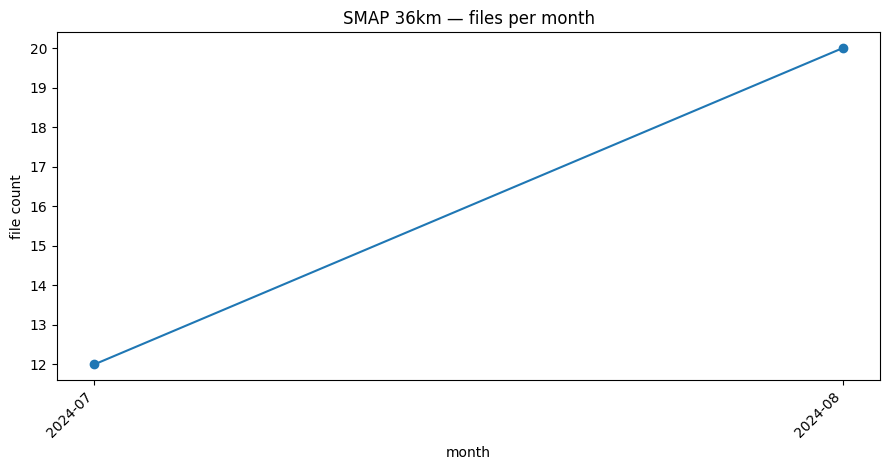

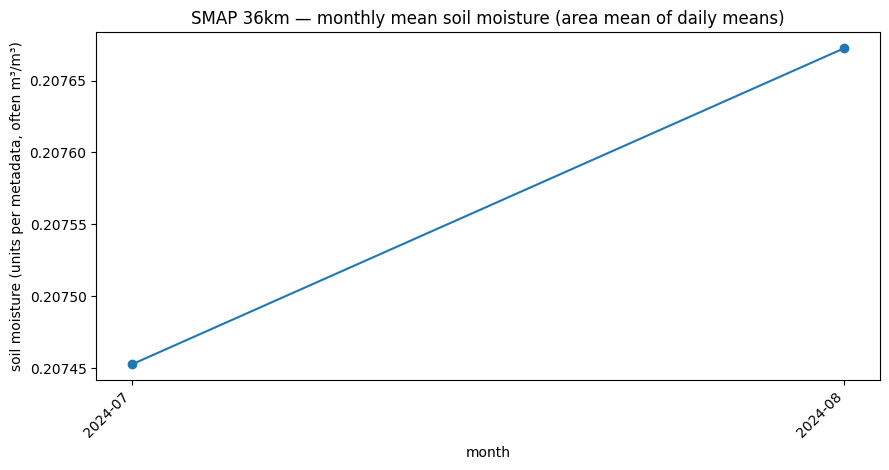

In [14]:
# === SMAP L3 Daily 36 km (V009) — EDA from saved metadata ====================
from pathlib import Path
from datetime import datetime
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = Path(r"D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009\Data")
META_DIR = Path(r"D:\606Data\SMAP_L3_Radiometer_Global_Daily_36km_EAS_Grid_Soil_Moisture_V009\SMAP36__metadata")
OUTDIR   = META_DIR.parent / "_eda"
OUTDIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 60)
pd.set_option("display.width", 160)

# ---- Locate metadata CSV -----------------------------------------------------
def find_first_csv(folder: Path, patterns):
    pats = [p.lower() for p in patterns]
    for fp in sorted(folder.glob("*.csv")):
        name = fp.name.lower()
        if any(p in name for p in pats):
            return fp
    return None

meta_csv = find_first_csv(META_DIR, ["metadata", "summary"])
qa_csv   = find_first_csv(META_DIR, ["qa", "value_counts", "flags", "bit"])  # optional

if meta_csv is None:
    raise SystemExit(f"No metadata CSV found in {META_DIR}. "
                     f"Expected something like '*metadata*.csv' or '*summary*.csv'.")

print("Reading metadata:", meta_csv)
meta = pd.read_csv(meta_csv)

if qa_csv:
    print("Reading QA/value-counts (optional):", qa_csv)
    qa = pd.read_csv(qa_csv)
else:
    qa = None
    print("No QA/value-counts CSV found (optional).")

# ---- Helpers -----------------------------------------------------------------
def basename(x): return Path(str(x)).name

def parse_date(fname: str):
    """
    Extract acquisition date from SMAP filenames (YYYYMMDD or YYYYMMDDThhmmss).
    Returns datetime.date or None.
    """
    s = str(fname)
    m = re.search(r'(\d{8})T?\d{0,6}', s)  # YYYYMMDD
    if m:
        try:    return datetime.strptime(m.group(1), "%Y%m%d").date()
        except: return None
    return None

def find_col(df, candidates_exact=(), candidates_contains=()):
    low = {c.lower(): c for c in df.columns}
    for k in candidates_exact:
        if k in df.columns: return k
        if k.lower() in low: return low[k.lower()]
    for c in df.columns:
        name = c.lower()
        if any(tok.lower() in name for tok in candidates_contains):
            return c
    return None

# ---- Normalize filename column & parse dates ---------------------------------
file_col = find_col(meta, candidates_exact=("file","filename","basename","name","path"),
                    candidates_contains=("file","name","path"))
if file_col is None:
    file_col = meta.columns[0]

meta["file_base"] = meta[file_col].astype(str).apply(basename)
meta["date"]      = meta["file_base"].apply(parse_date)
meta["month"]     = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")

# ---- Detect useful numeric columns (soil moisture stats & pixel counts) ------
sm_mean_col = find_col(meta, ("sm_mean","soil_moisture_mean","mean"),
                       ("soil_moisture","sm_mean","val_mean","mean"))
sm_min_col  = find_col(meta, ("sm_min","soil_moisture_min","min"), ("sm_min","val_min","min"))
sm_max_col  = find_col(meta, ("sm_max","soil_moisture_max","max"), ("sm_max","val_max","max"))
valid_col   = find_col(meta, ("valid_pixels","n_valid","validpix"), ("valid","n_valid","validpix"))
nonzero_col = find_col(meta, ("nonzero_pixels","n_nonzero"), ("nonzero","n_nonzero"))
pct_col     = find_col(meta, ("pct_nonzero","pct_burned","percent_nonzero"), ("pct","percent"))

print("\nDetected columns:")
print("  file_col   :", file_col)
print("  sm_mean_col:", sm_mean_col)
print("  sm_min_col :", sm_min_col)
print("  sm_max_col :", sm_max_col)
print("  valid_col  :", valid_col)
print("  nonzero_col:", nonzero_col)
print("  pct_col    :", pct_col)

# ---- Monthly summaries -------------------------------------------------------
monthly = meta.dropna(subset=["month"]).copy()

agg = {"files": ("file_base","count")}
if sm_mean_col: agg["sm_mean_monthly"] = (sm_mean_col, "mean")
if sm_min_col:  agg["sm_min_monthly"]  = (sm_min_col, "mean")
if sm_max_col:  agg["sm_max_monthly"]  = (sm_max_col, "mean")
if valid_col:   agg["valid_pixels_sum"] = (valid_col, "sum")
if nonzero_col: agg["nonzero_pixels_sum"] = (nonzero_col, "sum")
if pct_col:     agg["pct_nonzero_monthly"] = (pct_col, "mean")

by_month = (monthly
            .groupby("month")
            .agg(**agg)
            .reset_index()
            .sort_values("month"))

# If we have valid & nonzero, compute share
if valid_col and nonzero_col and not by_month.empty:
    by_month["pct_nonzero_from_counts"] = np.where(
        by_month["valid_pixels_sum"]>0,
        100.0*by_month["nonzero_pixels_sum"]/by_month["valid_pixels_sum"],
        np.nan
    )

# ---- Overall summary ---------------------------------------------------------
overall = {"files": int(meta["file_base"].nunique())}
for name, col in [("sm_mean_overall", sm_mean_col),
                  ("sm_min_overall", sm_min_col),
                  ("sm_max_overall", sm_max_col),
                  ("valid_pixels_total", valid_col),
                  ("nonzero_pixels_total", nonzero_col)]:
    if col and col in meta.columns:
        if "pixels" in name:
            overall[name] = int(pd.to_numeric(meta[col], errors="coerce").fillna(0).sum())
        else:
            overall[name] = float(pd.to_numeric(meta[col], errors="coerce").mean())
overall_df = pd.DataFrame([overall])

# ---- Save tidy outputs -------------------------------------------------------
out_month = OUTDIR / "SMAP36_monthly_summary.csv"
out_over  = OUTDIR / "SMAP36_overall_summary.csv"
by_month.to_csv(out_month, index=False)
overall_df.to_csv(out_over, index=False)

print("\nSaved:")
print(" -", out_month)
print(" -", out_over)

# ---- Inline previews ---------------------------------------------------------
print("\nMonthly summary (first 20 rows):")
display(by_month.head(20))

print("\nOverall summary:")
display(overall_df)

# ---- Charts ------------------------------------------------------------------
# 1) Files per month
if not by_month.empty:
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month["files"], marker="o")
    plt.title("SMAP 36km — files per month")
    plt.xlabel("month"); plt.ylabel("file count")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 2) Monthly mean soil moisture (if available)
if "sm_mean_monthly" in by_month.columns and not by_month["sm_mean_monthly"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month["sm_mean_monthly"], marker="o")
    plt.title("SMAP 36km — monthly mean soil moisture (area mean of daily means)")
    plt.xlabel("month"); plt.ylabel("soil moisture (units per metadata, often m³/m³)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 3) % nonzero by month (if available)
cand_pct = None
for c in ["pct_nonzero_monthly","pct_nonzero_from_counts"]:
    if c in by_month.columns and not by_month[c].isna().all():
        cand_pct = c; break

if cand_pct:
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month[cand_pct], marker="o")
    plt.title("SMAP 36km — monthly percent nonzero")
    plt.xlabel("month"); plt.ylabel("%")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# ---- Optional: QA/value counts summary --------------------------------------
if qa is not None and not qa.empty:
    # Harmonize columns to file / value / count
    def norm_col(df, name):
        for c in df.columns:
            if c.lower() == name.lower(): return c
        return None
    file_c  = norm_col(qa, "file")  or norm_col(qa, "path")
    value_c = norm_col(qa, "value") or norm_col(qa, "class") or norm_col(qa, "code")
    count_c = norm_col(qa, "count") or norm_col(qa, "pixels") or norm_col(qa, "freq")
    if all([file_c, value_c, count_c]):
        qa_top = (qa.groupby(value_c)[count_c].sum()
                    .reset_index()
                    .rename(columns={value_c:"value", count_c:"count"})
                    .sort_values("count", ascending=False))
        out_qa = OUTDIR / "SMAP36_QA_value_counts_overall.csv"
        qa_top.to_csv(out_qa, index=False)
        print("Saved QA value-counts →", out_qa)
        print("\nQA top values (first 20):")
        display(qa_top.head(20))


### SMAP–Sentinel-1 L2 (3 km, V003)

Reading metadata: D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003\SMAPS1L2__metadata\smap_s1l2_file_summary.csv
Reading QA/value-counts (optional): D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003\SMAPS1L2__metadata\smap_s1l2_qa_counts.csv

Detected columns:
  file_col   : file
  sm_mean_col: val_mean
  sm_min_col : val_min
  sm_max_col : val_max
  sm_unc_col : val_std
  valid_col  : None
  nonzero_col: None
  pct_col    : None

Saved:
 - D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003\_eda\SMAPS1L2_monthly_summary.csv
 - D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003\_eda\SMAPS1L2_pass_by_month.csv
 - D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003\_eda\SMAPS1L2_overall_summary.csv

Monthly summary (first 20 rows):


month  files  sm_mean_monthly  sm_min_monthly  sm_max_monthly  sm_unc_monthly
0  2024-07     73      5757.219131     5598.369863     5916.068493       91.999919
1  2024-08    116      5751.663747     5593.422414     5909.905172       91.648925


Pass × Month (first 30 rows):


month pass  files      sm_mean
0  2024-07  UNK     73  5757.219131
1  2024-08  UNK    116  5751.663747


Overall summary:


files        passes  sm_mean_overall  sm_min_overall  sm_max_overall  sm_unc_overall
0    189  {'UNK': 189}      5753.809477     5595.333333     5912.285714       91.784494

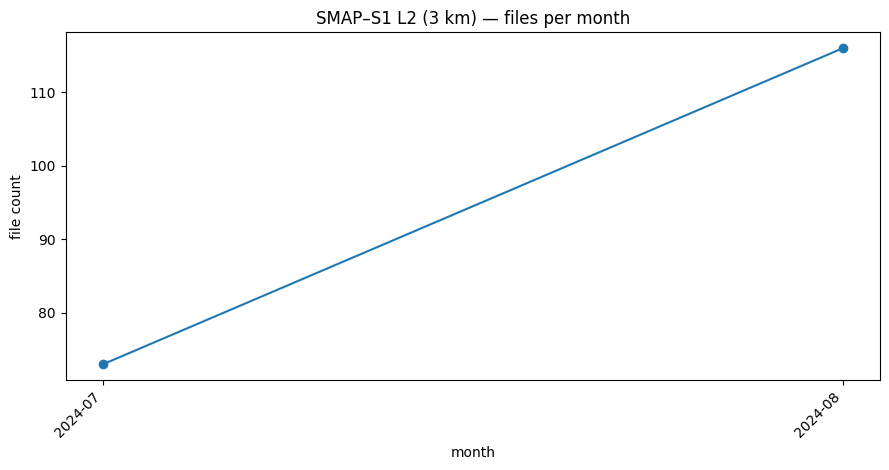

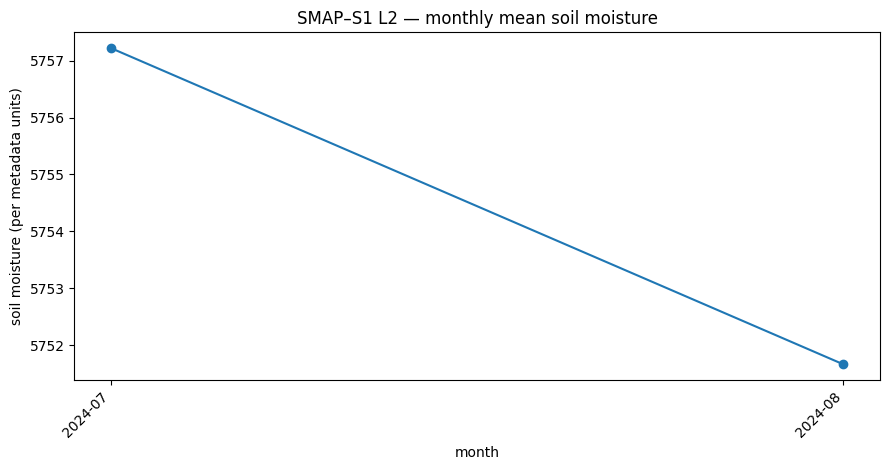

Saved QA value-counts → D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003\_eda\SMAPS1L2_QA_value_counts_overall.csv

QA top values (first 20):


value    count
7    199  8025724
1      1  2104632
0      0  1795943
2     65   387509
3    129    48812
5    193     7596
4    133     1246
6    197      883

In [15]:
# === SMAP–Sentinel-1 L2 (3 km, V003) — EDA from saved metadata ===============
from pathlib import Path
from datetime import datetime
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = Path(r"D:\606Data\SMAPSentinel_1_L2_RadiometerRadar_30_Second_Scene_3_km_EASE_Grid_Soil_Moisture_V003")
META_DIR = BASE_DIR / "SMAPS1L2__metadata"
OUTDIR   = BASE_DIR / "_eda"
OUTDIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", 80)
pd.set_option("display.width", 180)

# ---------- Find metadata / QA CSVs ----------
def find_first_csv(folder: Path, patterns):
    pats = [p.lower() for p in patterns]
    for fp in sorted(folder.glob("*.csv")):
        if any(p in fp.name.lower() for p in pats):
            return fp
    return None

meta_csv = find_first_csv(META_DIR, ["metadata", "summary"])
qa_csv   = find_first_csv(META_DIR, ["qa", "value_counts", "flags", "bit"])  # optional

if meta_csv is None:
    raise SystemExit(f"No metadata CSV found in {META_DIR}. "
                     f"Expected something like '*metadata*.csv' or '*summary*.csv'.")

print("Reading metadata:", meta_csv)
meta = pd.read_csv(meta_csv)

if qa_csv:
    print("Reading QA/value-counts (optional):", qa_csv)
    qa = pd.read_csv(qa_csv)
else:
    qa = None
    print("No QA/value-counts CSV found (optional).")

# ---------- Helpers ----------
def basename(x): 
    return Path(str(x)).name

def parse_datetime(fname: str):
    """
    Try SMAP/S1 style tokens like YYYYMMDDThhmmss or YYYYMMDD_hhmmss.
    Returns (date, time_str) where time_str is 'hh:mm:ss' or None.
    """
    s = str(fname)
    m = re.search(r'(\d{8})[T_]?(\d{6})', s)  # YYYYMMDD + hhmmss
    if m:
        d, t = m.group(1), m.group(2)
        try:
            dt = datetime.strptime(d + t, "%Y%m%d%H%M%S")
            return dt.date(), dt.strftime("%H:%M:%S")
        except Exception:
            return None, None
    # fallback: just date
    m2 = re.search(r'(\d{8})', s)
    if m2:
        try:
            dt = datetime.strptime(m2.group(1), "%Y%m%d")
            return dt.date(), None
        except:
            pass
    return None, None

def infer_pass(fname: str):
    """
    Heuristic for orbit direction from filename tokens:
    look for 'A'/'ASC' vs 'D'/'DES' tokens.
    """
    s = basename(fname).upper()
    # common patterns: '_A_', '.A.', '-A-', 'ASC', 'ASCENDING', etc.
    if re.search(r'(^|[_\.-])ASC(ENDING)?([_\.-]|$)', s): return "ASC"
    if re.search(r'(^|[_\.-])DES(CENDING)?([_\.-]|$)', s): return "DES"
    if re.search(r'(^|[_\.-])A([_\.-]|$)', s): return "ASC"
    if re.search(r'(^|[_\.-])D([_\.-]|$)', s): return "DES"
    return "UNK"

def find_col(df, exact=(), contains=()):
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in df.columns: return k
        if k.lower() in low: return low[k.lower()]
    for c in df.columns:
        name = c.lower()
        if any(tok.lower() in name for tok in contains):
            return c
    return None

# ---------- Normalize filename, parse dates / pass ----------
file_col = find_col(meta, exact=("file","filename","basename","name","path"),
                    contains=("file","name","path"))
if file_col is None:
    file_col = meta.columns[0]

meta["file_base"] = meta[file_col].astype(str).apply(basename)
dates, times = [], []
passes = []
for f in meta["file_base"]:
    d, t = parse_datetime(f)
    dates.append(d); times.append(t)
    passes.append(infer_pass(f))
meta["date"]  = dates
meta["time"]  = times
meta["pass"]  = passes
meta["month"] = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")

# ---------- Detect useful numeric columns ----------
# Soil-moisture stats (mean/min/max), pixel counts, and uncertainty if present
sm_mean_col = find_col(meta, exact=("sm_mean","soil_moisture_mean"),
                       contains=("soil_moisture","sm_mean","val_mean","mean"))
sm_min_col  = find_col(meta, exact=("sm_min","soil_moisture_min"), contains=("sm_min","val_min","min"))
sm_max_col  = find_col(meta, exact=("sm_max","soil_moisture_max"), contains=("sm_max","val_max","max"))
sm_unc_col  = find_col(meta, exact=("sm_unc","soil_moisture_uncertainty","sm_stdev"),
                       contains=("uncert","stdev","std"))
valid_col   = find_col(meta, exact=("valid_pixels","n_valid","validpix"),
                       contains=("valid","n_valid","validpix"))
nonzero_col = find_col(meta, exact=("nonzero_pixels","n_nonzero"),
                       contains=("nonzero","n_nonzero"))
pct_col     = find_col(meta, exact=("pct_nonzero","percent_nonzero"),
                       contains=("pct","percent"))

print("\nDetected columns:")
print("  file_col   :", file_col)
print("  sm_mean_col:", sm_mean_col)
print("  sm_min_col :", sm_min_col)
print("  sm_max_col :", sm_max_col)
print("  sm_unc_col :", sm_unc_col)
print("  valid_col  :", valid_col)
print("  nonzero_col:", nonzero_col)
print("  pct_col    :", pct_col)

# ---------- Monthly summaries ----------
monthly = meta.dropna(subset=["month"]).copy()

agg = {"files": ("file_base","count")}
if sm_mean_col: agg["sm_mean_monthly"] = (sm_mean_col, "mean")
if sm_min_col:  agg["sm_min_monthly"]  = (sm_min_col, "mean")
if sm_max_col:  agg["sm_max_monthly"]  = (sm_max_col, "mean")
if sm_unc_col:  agg["sm_unc_monthly"]  = (sm_unc_col, "mean")
if valid_col:   agg["valid_pixels_sum"]   = (valid_col, "sum")
if nonzero_col: agg["nonzero_pixels_sum"] = (nonzero_col, "sum")
if pct_col:     agg["pct_nonzero_monthly"] = (pct_col, "mean")

by_month = (monthly
            .groupby("month")
            .agg(**agg)
            .reset_index()
            .sort_values("month"))

# pass × month (ASC/DES/UNK)
by_pass_month = (monthly
                 .groupby(["month","pass"])
                 .agg(files=("file_base","count"),
                      sm_mean=("file_base", "count") if not sm_mean_col else (sm_mean_col, "mean"))
                 .reset_index()
                 .sort_values(["month","pass"]))

# If we have valid & nonzero, compute share
if valid_col and nonzero_col and not by_month.empty:
    by_month["pct_nonzero_from_counts"] = np.where(
        by_month["valid_pixels_sum"]>0,
        100.0*by_month["nonzero_pixels_sum"]/by_month["valid_pixels_sum"],
        np.nan
    )

# ---------- Overall summary ----------
overall = {"files": int(meta["file_base"].nunique()),
           "passes": dict(meta["pass"].value_counts())}
for name, col in [("sm_mean_overall", sm_mean_col),
                  ("sm_min_overall", sm_min_col),
                  ("sm_max_overall", sm_max_col),
                  ("sm_unc_overall", sm_unc_col),
                  ("valid_pixels_total", valid_col),
                  ("nonzero_pixels_total", nonzero_col)]:
    if col and col in meta.columns:
        if "pixels" in name:
            overall[name] = int(pd.to_numeric(meta[col], errors="coerce").fillna(0).sum())
        else:
            overall[name] = float(pd.to_numeric(meta[col], errors="coerce").mean())
overall_df = pd.DataFrame([overall])

# ---------- Save tidy outputs ----------
out_month = OUTDIR / "SMAPS1L2_monthly_summary.csv"
out_passm = OUTDIR / "SMAPS1L2_pass_by_month.csv"
out_over  = OUTDIR / "SMAPS1L2_overall_summary.csv"

by_month.to_csv(out_month, index=False)
by_pass_month.to_csv(out_passm, index=False)
overall_df.to_csv(out_over, index=False)

print("\nSaved:")
print(" -", out_month)
print(" -", out_passm)
print(" -", out_over)

# ---------- Inline previews ----------
print("\nMonthly summary (first 20 rows):")
display(by_month.head(20))

print("\nPass × Month (first 30 rows):")
display(by_pass_month.head(30))

print("\nOverall summary:")
display(overall_df)

# ---------- Charts ----------
# 1) Files per month
if not by_month.empty:
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month["files"], marker="o")
    plt.title("SMAP–S1 L2 (3 km) — files per month")
    plt.xlabel("month"); plt.ylabel("file count")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 2) Monthly mean soil moisture (if available)
if "sm_mean_monthly" in by_month.columns and not by_month["sm_mean_monthly"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month["sm_mean_monthly"], marker="o")
    plt.title("SMAP–S1 L2 — monthly mean soil moisture")
    plt.xlabel("month"); plt.ylabel("soil moisture (per metadata units)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 3) % nonzero by month (if available)
cand_pct = None
for c in ["pct_nonzero_monthly","pct_nonzero_from_counts"]:
    if c in by_month.columns and not by_month[c].isna().all():
        cand_pct = c; break
if cand_pct:
    plt.figure(figsize=(9,4.8))
    plt.plot(by_month["month"].astype(str), by_month[cand_pct], marker="o")
    plt.title("SMAP–S1 L2 — monthly percent nonzero")
    plt.xlabel("month"); plt.ylabel("%")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 4) Pass split (ASC vs DES) per month if present
if not by_pass_month.empty and by_pass_month["pass"].nunique() > 1:
    pivot = (by_pass_month.pivot(index="month", columns="pass", values="files")
                             .fillna(0).sort_index())
    plt.figure(figsize=(9,5))
    for col in pivot.columns:
        plt.plot(pivot.index.astype(str), pivot[col], marker="o", label=col)
    plt.title("SMAP–S1 L2 — files per month by pass (ASC/DES)")
    plt.xlabel("month"); plt.ylabel("files")
    plt.xticks(rotation=45, ha="right"); plt.legend()
    plt.tight_layout(); plt.show()

# ---------- Optional: QA/value counts overall ----------
if qa is not None and not qa.empty:
    def norm_col(df, name):
        for c in df.columns:
            if c.lower() == name.lower(): return c
        return None
    file_c  = norm_col(qa, "file")  or norm_col(qa, "path")
    value_c = norm_col(qa, "value") or norm_col(qa, "class") or norm_col(qa, "code")
    count_c = norm_col(qa, "count") or norm_col(qa, "pixels") or norm_col(qa, "freq")
    if all([file_c, value_c, count_c]):
        qa_top = (qa.groupby(value_c)[count_c].sum()
                    .reset_index()
                    .rename(columns={value_c:"value", count_c:"count"})
                    .sort_values("count", ascending=False))
        out_qa = OUTDIR / "SMAPS1L2_QA_value_counts_overall.csv"
        qa_top.to_csv(out_qa, index=False)
        print("Saved QA value-counts →", out_qa)
        print("\nQA top values (first 20):")
        display(qa_top.head(20))


### VIIRS JPSS-1 Active Fires

Metadata CSV: D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002\VIIRSJPSS1__metadata\viirs_jpss1_l2_file_summary.csv
Detections CSV: (will search for many *.detections.csv under Data)
Loaded detections rows: 94568

Detected in metadata:
  file_col     : file
  det_count_col: detections
  mean_conf_col: confidence_mean
  mean_frp_col : frp_mean
  min_frp_col  : frp_min
  max_frp_col  : frp_max

Detected in detections:
  det_file_col: file_base
  lat_col     : latitude
  lon_col     : longitude
  conf_col    : confidence
  frp_col     : FRP
  doy_col     : DayOfYear

Saved:
 - D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002\_eda\VIIRSJPSS1_monthly_summary.csv
 - D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002\_eda\VIIRSJPSS1_top_tiles.csv

Monthly summary (first 20 rows):


C:\Users\sanjay\AppData\Local\Temp\ipykernel_8792\3687774957.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(parts, ignore_index=True) if parts else pd.DataFrame()


month  files  detections
0  2024-07     73       63350
1  2024-08    121       77614


Top hotspot tiles (~0.5° bins; first 20):


lat_bin  lon_bin  detections
883      40.0   -121.5        4096
1154     44.5   -120.0        3265
1183     45.0   -119.5        3258
1122     44.0   -119.0        3225
1158     44.5   -117.5        2979
882      40.0   -122.0        2928
1256     46.5   -121.0        2130
1087     43.5   -122.5        2120
1406     50.5   -121.5        2083
1184     45.0   -119.0        2060
620      35.5   -118.5        1872
655      36.0   -118.5        1782
1515     53.5   -126.0        1637
917      40.5   -121.5        1406
1182     45.0   -120.0        1198
1391     50.0   -115.5        1090
1230     46.0   -121.5        1061
916      40.5   -122.0        1061
1663     56.5   -107.5        1040
1498     53.0   -121.5        1036

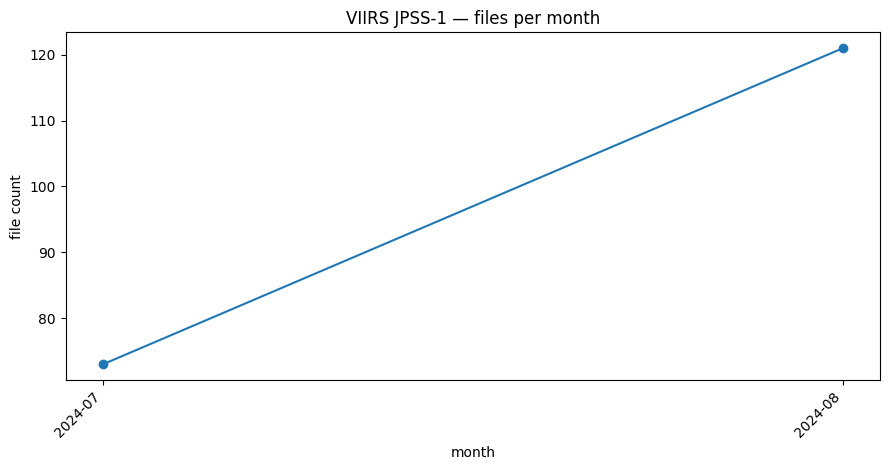

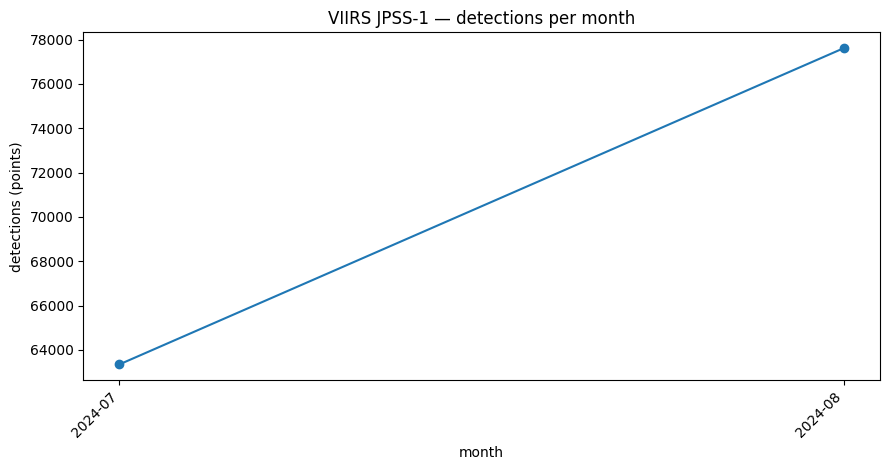

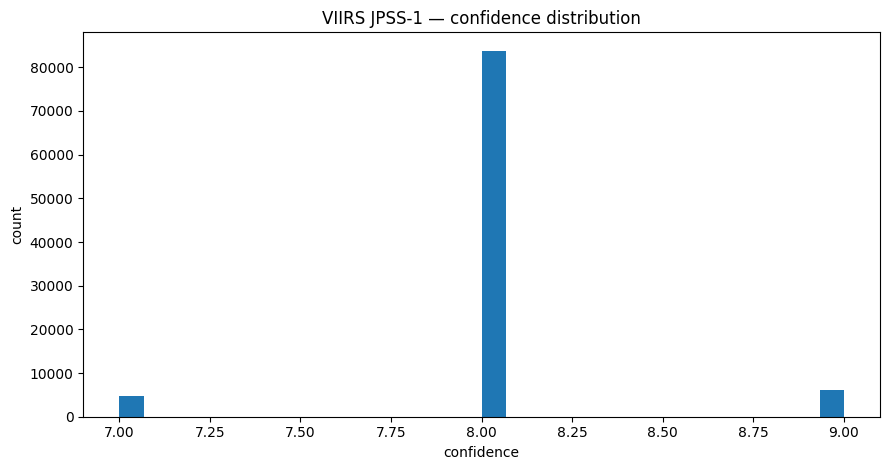

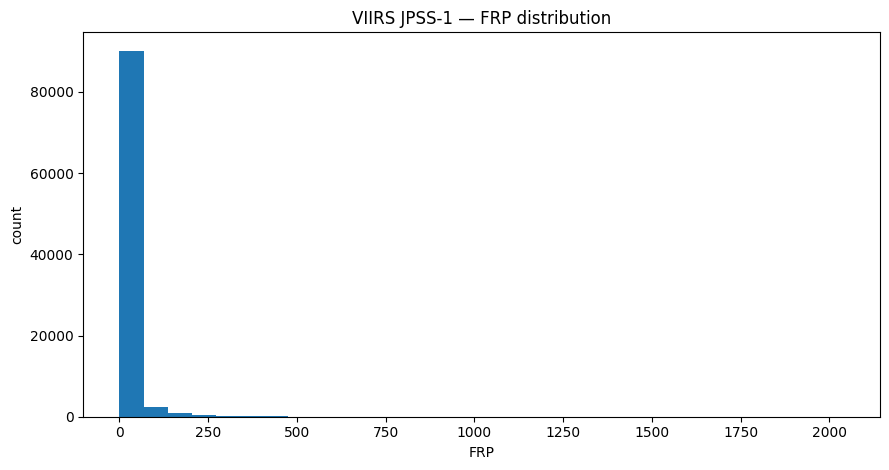

In [16]:
# === VIIRS JPSS-1 Active Fires (VJ114IMG, 375 m) — EDA from saved metadata ===
from pathlib import Path
from datetime import datetime, timedelta
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = Path(r"D:\606Data\VIIRSJPSS1_Active_Fires_6Min_L2Swath_375m_V002")
META_DIR = BASE_DIR / "VIIRSJPSS1__metadata"
OUTDIR   = BASE_DIR / "_eda"
OUTDIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 180)

# ---------- Find metadata / detections CSVs ----------
def find_first_csv(folder: Path, patterns):
    if not folder.exists(): return None
    pats = tuple(p.lower() for p in patterns)
    for fp in sorted(folder.glob("*.csv")):
        if any(p in fp.name.lower() for p in pats):
            return fp
    return None

# Try to find a per-file metadata CSV (your earlier scripts may name it "*metadata*.csv" or "*summary*.csv")
meta_csv = find_first_csv(META_DIR, ["metadata", "summary", "per_file"])
# Try to find a single, consolidated detections CSV (optional)
detections_csv = find_first_csv(META_DIR, ["detections", "points", "all_detections", "fire_pixels"])

print("Metadata CSV:", meta_csv)
print("Detections CSV:", detections_csv or "(will search for many *.detections.csv under Data)")

if meta_csv is None:
    raise SystemExit(f"No metadata CSV found in {META_DIR}. Put your per-file metadata there (e.g., '*metadata*.csv').")

# ---------- Load per-file metadata ----------
meta = pd.read_csv(meta_csv)

# If we don't have a single detections CSV, look for per-granule ones under Data and concat (carefully)
def try_concat_perfile_detections(data_root: Path, limit_files: int = None, max_rows: int = 2_000_000):
    cands = sorted(list(data_root.rglob("*.detections.csv")))
    if not cands:
        return pd.DataFrame()
    if limit_files:
        cands = cands[:limit_files]
    parts = []
    rows = 0
    for i, fp in enumerate(cands, 1):
        try:
            df = pd.read_csv(fp)
            df["file_base"] = Path(fp.stem.replace(".detections","")).name
            parts.append(df)
            rows += len(df)
            if rows >= max_rows:
                break
        except Exception:
            pass
    return pd.concat(parts, ignore_index=True) if parts else pd.DataFrame()

if detections_csv:
    det = pd.read_csv(detections_csv)
else:
    # Change limit_files=None to read all; keep it modest first to avoid RAM spikes
    det = try_concat_perfile_detections(BASE_DIR, limit_files=None, max_rows=2_000_000)

print("Loaded detections rows:", 0 if det is None else len(det))

# ---------- Helpers ----------
def basename(x): return Path(str(x)).name

def parse_viirs_date(fname: str):
    """
    Parse VJ114IMG.AYYYYDDD.HHMM... (A + year + day_of_year + subdaily).
    Returns (date, year, doy).
    """
    s = str(fname)
    m = re.search(r'\.A(\d{4})(\d{3})\.', s)  # .AYYYYDDD.
    if not m:
        return None, None, None
    year, doy = int(m.group(1)), int(m.group(2))
    try:
        date = (datetime(year,1,1) + timedelta(doy-1)).date()
    except Exception:
        date = None
    return date, year, doy

def find_col(df, exact=(), contains=()):
    if df is None or df.empty: return None
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in df.columns: return k
        if k.lower() in low: return low[k.lower()]
    for c in df.columns:
        name = c.lower()
        if any(tok.lower() in name for tok in contains):
            return c
    return None

# ---------- Prepare per-file metadata ----------
# Expect at least a filename/path column
file_col = find_col(meta, exact=("file","filename","basename","name","path"), contains=("file","name","path"))
if file_col is None:
    file_col = meta.columns[0]

meta["file_base"] = meta[file_col].astype(str).apply(basename)
dates, years, doys = [], [], []
for f in meta["file_base"]:
    d,y,dy = parse_viirs_date(f)
    dates.append(d); years.append(y); doys.append(dy)
meta["date"]  = dates
meta["month"] = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")
meta["year"]  = years
meta["yday"]  = doys

# Useful numeric columns that your earlier pipeline may have written:
# (we detect flexibly; skip if missing)
det_count_col = find_col(meta, exact=("detections","n_detections","points","rows"), contains=("detect","count","rows"))
mean_conf_col = find_col(meta, exact=("mean_confidence","conf_mean","confidence_mean"), contains=("conf","confidence"))
mean_frp_col  = find_col(meta, exact=("mean_frp","frp_mean","power_mean"), contains=("frp","power"))
min_frp_col   = find_col(meta, exact=("min_frp","frp_min"), contains=("frp_min","min_frp"))
max_frp_col   = find_col(meta, exact=("max_frp","frp_max"), contains=("frp_max","max_frp"))

print("\nDetected in metadata:")
print("  file_col     :", file_col)
print("  det_count_col:", det_count_col)
print("  mean_conf_col:", mean_conf_col)
print("  mean_frp_col :", mean_frp_col)
print("  min_frp_col  :", min_frp_col)
print("  max_frp_col  :", max_frp_col)

# ---------- If we have a detections table, normalize its key columns ----------
if det is not None and not det.empty:
    # filename key
    det_file_col = find_col(det, exact=("file","file_base","granule","source"), contains=("file","granule","source"))
    if det_file_col is None:
        # if not present, rely on 'file_base' added during concat; else try to reconstruct from columns
        det_file_col = "file_base" if "file_base" in det.columns else None

    # lat/lon
    lat_col = find_col(det, exact=("FP_latitude","latitude","lat"), contains=("lat"))
    lon_col = find_col(det, exact=("FP_longitude","longitude","lon"), contains=("lon"))
    # confidence
    conf_col = find_col(det, exact=("FP_confidence","confidence","conf"), contains=("confidence","conf"))
    # FRP/power
    frp_col  = find_col(det, exact=("FP_power","FP_FRP","FRP","power"), contains=("frp","power"))
    # day-of-year inside table (sometimes provided)
    doy_col  = find_col(det, exact=("FP_day","doy","DOY"), contains=("doy","day"))

    print("\nDetected in detections:")
    print("  det_file_col:", det_file_col)
    print("  lat_col     :", lat_col)
    print("  lon_col     :", lon_col)
    print("  conf_col    :", conf_col)
    print("  frp_col     :", frp_col)
    print("  doy_col     :", doy_col)

    # Basic cleaning / clipping to plausible geo bounds
    if lat_col and lon_col:
        det = det[np.isfinite(pd.to_numeric(det[lat_col], errors="coerce")) &
                  np.isfinite(pd.to_numeric(det[lon_col], errors="coerce"))]
        det = det[(det[lat_col] >= -90) & (det[lat_col] <= 90)]
        # many products provide lon in [-180,180]; if not, don't force

# ---------- Build monthly summaries ----------
# From per-file metadata
meta_month = (meta.dropna(subset=["month"])
              .groupby("month")
              .agg(files=("file_base","count"))
              .reset_index()
              .sort_values("month"))

# Add counts of detections per month if we have either:
# (a) a det_count_col on meta, or (b) a detections table we can group
if det_count_col and det_count_col in meta.columns:
    tmp = (meta.dropna(subset=["month"])
           .groupby("month")[det_count_col].sum()
           .reset_index()
           .rename(columns={det_count_col: "detections"}))
    meta_month = meta_month.merge(tmp, on="month", how="left")
elif det is not None and not det.empty:
    # Need to join detections to meta's month via file_base key
    det_file_col = det_file_col or "file_base"
    if det_file_col in det.columns:
        # map file_base -> month using meta
        key = meta[["file_base","month"]].dropna()
        det2 = det.merge(key, left_on=det_file_col, right_on="file_base", how="left")
        tmp = det2.dropna(subset=["month"]).groupby("month").size().reset_index(name="detections")
        meta_month = meta_month.merge(tmp, on="month", how="left")

# Confidence/FRP monthly means (if we have detections table)
if det is not None and not det.empty and ("month" in locals()):
    det_file_col = det_file_col or "file_base"
    if det_file_col in det.columns:
        key = meta[["file_base","month"]].dropna()
        det2 = det.merge(key, left_on=det_file_col, right_on="file_base", how="left")
        grp = det2.dropna(subset=["month"]).groupby("month")
        if conf_col:
            conf_m = grp[conf_col].mean(numeric_only=True).reset_index().rename(columns={conf_col:"mean_conf"})
            meta_month = meta_month.merge(conf_m, on="month", how="left")
        if frp_col:
            frp_m  = grp[frp_col].mean(numeric_only=True).reset_index().rename(columns={frp_col:"mean_frp"})
            meta_month = meta_month.merge(frp_m, on="month", how="left")

# ---------- Top tiles / hotspots ----------
top_tiles = pd.DataFrame()
if det is not None and not det.empty and lat_col and lon_col:
    # coarse binning to ~0.5° grid for quick hotspot view
    lat_bin = (pd.to_numeric(det[lat_col], errors="coerce") * 2).round()/2
    lon_bin = (pd.to_numeric(det[lon_col], errors="coerce") * 2).round()/2
    tmp = (pd.DataFrame({"lat_bin":lat_bin, "lon_bin":lon_bin})
             .dropna()
             .groupby(["lat_bin","lon_bin"]).size()
             .reset_index(name="detections")
             .sort_values("detections", ascending=False))
    top_tiles = tmp.head(50)

# ---------- Save tidy outputs ----------
out_month = OUTDIR / "VIIRSJPSS1_monthly_summary.csv"
out_tiles = OUTDIR / "VIIRSJPSS1_top_tiles.csv"
meta_month.to_csv(out_month, index=False)
if not top_tiles.empty:
    top_tiles.to_csv(out_tiles, index=False)

print("\nSaved:")
print(" -", out_month)
print(" -", (out_tiles if not top_tiles.empty else "(no tiles file written; no detections table found)"))

# ---------- Inline previews ----------
print("\nMonthly summary (first 20 rows):")
display(meta_month.head(20))

if not top_tiles.empty:
    print("\nTop hotspot tiles (~0.5° bins; first 20):")
    display(top_tiles.head(20))

# ---------- Charts ----------
# 1) Files per month
if not meta_month.empty:
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["files"], marker="o")
    plt.title("VIIRS JPSS-1 — files per month")
    plt.xlabel("month"); plt.ylabel("file count")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 2) Detections per month (if present)
if "detections" in meta_month.columns and not meta_month["detections"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["detections"], marker="o")
    plt.title("VIIRS JPSS-1 — detections per month")
    plt.xlabel("month"); plt.ylabel("detections (points)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 3) Confidence / FRP monthly means (if present)
if "mean_conf" in meta_month.columns and not meta_month["mean_conf"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["mean_conf"], marker="o")
    plt.title("VIIRS JPSS-1 — monthly mean confidence")
    plt.xlabel("month"); plt.ylabel("confidence (0–100)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

if "mean_frp" in meta_month.columns and not meta_month["mean_frp"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["mean_frp"], marker="o")
    plt.title("VIIRS JPSS-1 — monthly mean FRP")
    plt.xlabel("month"); plt.ylabel("FRP (units per metadata, usually MW)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# 4) Confidence/FRP distributions (detections table)
if det is not None and not det.empty:
    if conf_col:
        plt.figure(figsize=(9,4.8))
        pd.to_numeric(det[conf_col], errors="coerce").dropna().plot(kind="hist", bins=30)
        plt.title("VIIRS JPSS-1 — confidence distribution")
        plt.xlabel("confidence"); plt.ylabel("count")
        plt.tight_layout(); plt.show()
    if frp_col:
        plt.figure(figsize=(9,4.8))
        pd.to_numeric(det[frp_col], errors="coerce").dropna().plot(kind="hist", bins=30)
        plt.title("VIIRS JPSS-1 — FRP distribution")
        plt.xlabel("FRP"); plt.ylabel("count")
        plt.tight_layout(); plt.show()


### VIIRS NPP Active Fires

Metadata CSV: D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002\VIIRSNPP__metadata\viirs_snpp_l2_file_summary.csv
Detections CSV: (will search for many *.detections.csv under Data)
Loaded detections rows: 2842

Detected in metadata:
  file_col     : file
  det_count_col: detections
  mean_conf_col: confidence_mean
  mean_frp_col : frp_mean
  min_frp_col  : frp_min
  max_frp_col  : frp_max

Detected in detections:
  det_file_col: file_base
  lat_col     : latitude
  lon_col     : longitude
  conf_col    : confidence
  frp_col     : FRP
  doy_col     : DayOfYear

Saved:
 - D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002\_eda\VIIRSNPP_monthly_summary.csv
 - D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002\_eda\VIIRSNPP_top_tiles.csv

Monthly summary (first 20 rows):


month  files  detections  mean_conf  mean_frp
0  2024-07     40       37765   8.016538  5.334203
1  2024-08    126       82345        NaN       NaN


Top hotspot tiles (~0.5° bins; first 20):


lat_bin  lon_bin  detections
65      44.5   -117.5         465
66      45.0   -120.0         256
106     58.5   -121.0         198
61      44.0   -119.0         141
20      36.0   -118.5         141
105     58.5   -121.5         135
67      45.0   -119.5         118
111     59.0   -122.5         111
113     59.0   -121.5         111
83      50.5   -121.5         106
107     58.5   -120.5         100
60      44.0   -119.5          97
68      45.0   -119.0          87
52      43.5   -122.5          69
57      44.0   -122.5          45
51      43.5   -123.0          35
117     59.5   -123.5          34
109     58.5   -115.0          32
81      50.0   -117.5          29
21      36.0   -118.0          29

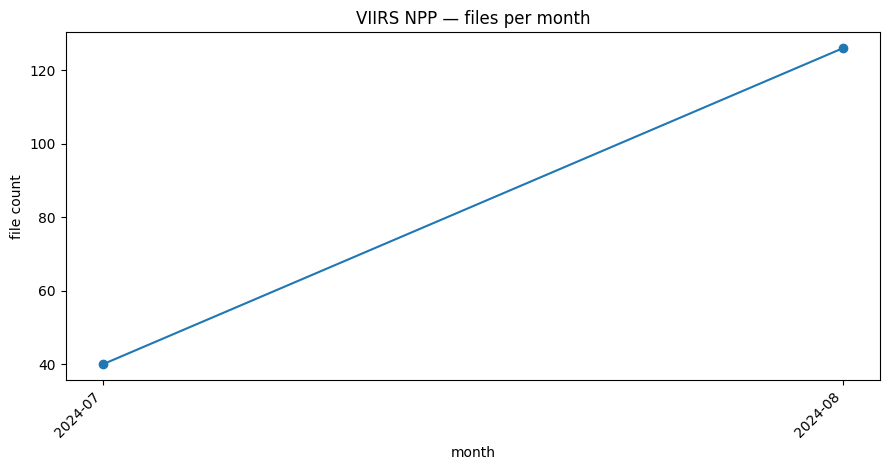

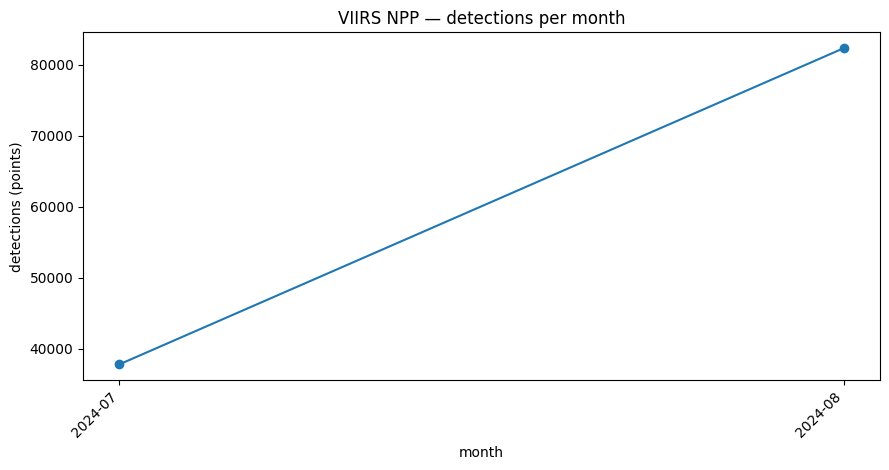

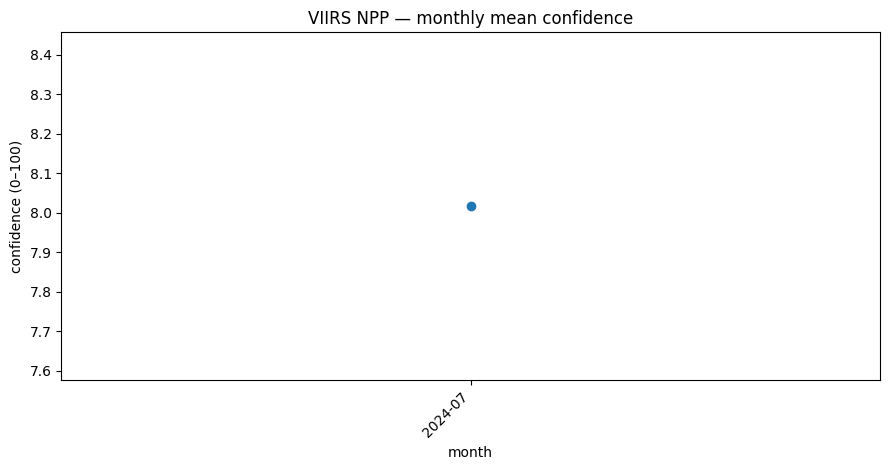

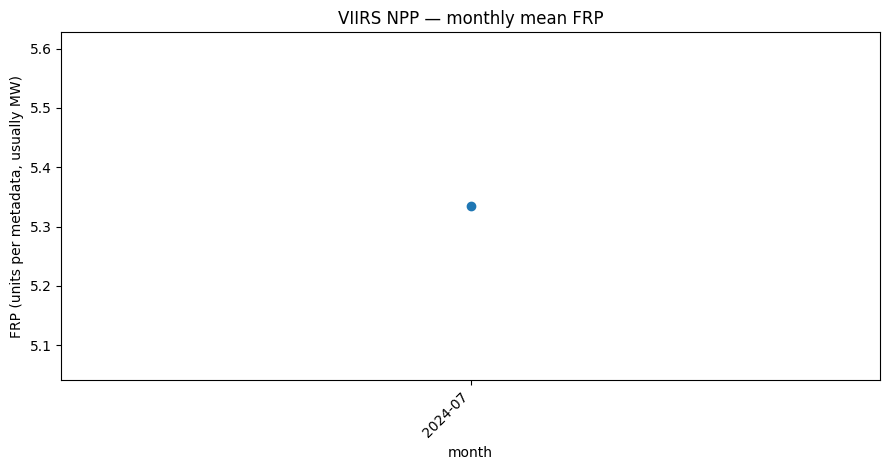

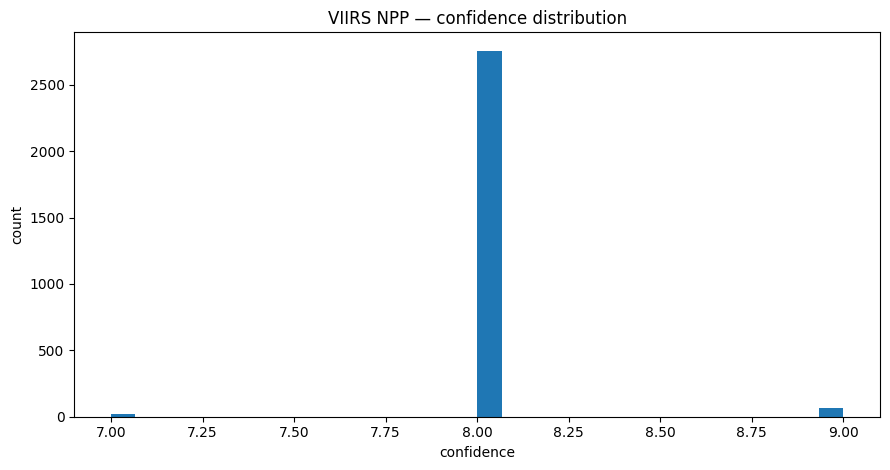

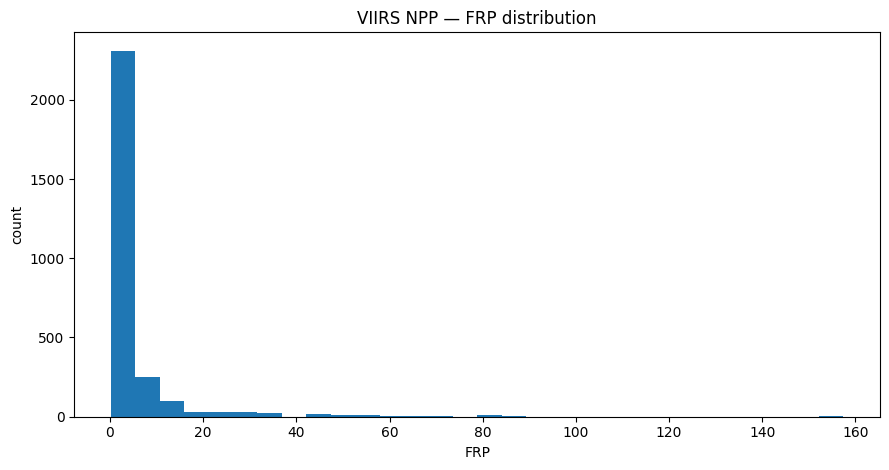

In [17]:
# === VIIRS NPP Active Fires (VNP14IMG, 375 m) — EDA from saved metadata ======
from pathlib import Path
from datetime import datetime, timedelta
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE_DIR = Path(r"D:\606Data\VIIRSNPP_ActiveFires_6Min_L2Swath_375m_V002")
META_DIR = BASE_DIR / "VIIRSNPP__metadata"
OUTDIR   = BASE_DIR / "_eda"
OUTDIR.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 180)

# ---------- Find metadata / detections CSVs ----------
def find_first_csv(folder: Path, patterns):
    if not folder.exists(): return None
    pats = tuple(p.lower() for p in patterns)
    for fp in sorted(folder.glob("*.csv")):
        if any(p in fp.name.lower() for p in pats):
            return fp
    return None

meta_csv = find_first_csv(META_DIR, ["metadata", "summary", "per_file"])
detections_csv = find_first_csv(META_DIR, ["detections", "points", "all_detections", "fire_pixels"])

print("Metadata CSV:", meta_csv)
print("Detections CSV:", detections_csv or "(will search for many *.detections.csv under Data)")

if meta_csv is None:
    raise SystemExit(f"No metadata CSV found in {META_DIR}. Put your per-file metadata there (e.g., '*metadata*.csv').")

# ---------- Load per-file metadata ----------
meta = pd.read_csv(meta_csv)

# If we don't have a single detections CSV, look for per-granule ones and concat
def try_concat_perfile_detections(data_root: Path, limit_files: int = None, max_rows: int = 2_000_000):
    cands = sorted(list(data_root.rglob("*.detections.csv")))
    if not cands:
        return pd.DataFrame()
    if limit_files:
        cands = cands[:limit_files]
    parts, rows = [], 0
    for fp in cands:
        try:
            df = pd.read_csv(fp)
            # store source granule name (strip ".detections")
            src = Path(fp.name).name.replace(".detections.csv", "")
            df["file_base"] = src
            parts.append(df)
            rows += len(df)
            if rows >= max_rows: break
        except Exception:
            pass
    return pd.concat(parts, ignore_index=True) if parts else pd.DataFrame()

if detections_csv:
    det = pd.read_csv(detections_csv)
else:
    det = try_concat_perfile_detections(BASE_DIR, limit_files=None, max_rows=2_000_000)

print("Loaded detections rows:", 0 if det is None else len(det))

# ---------- Helpers ----------
def basename(x): return Path(str(x)).name

def parse_viirs_date(fname: str):
    """
    Parse VNP14IMG.AYYYYDDD.... → (date, year, doy)
    """
    s = str(fname)
    m = re.search(r'\.A(\d{4})(\d{3})\.', s)  # .AYYYYDDD.
    if not m:
        return None, None, None
    year, doy = int(m.group(1)), int(m.group(2))
    try:
        date = (datetime(year,1,1) + timedelta(doy-1)).date()
    except Exception:
        date = None
    return date, year, doy

def find_col(df, exact=(), contains=()):
    if df is None or df.empty: return None
    low = {c.lower(): c for c in df.columns}
    for k in exact:
        if k in df.columns: return k
        if k.lower() in low: return low[k.lower()]
    for c in df.columns:
        name = c.lower()
        if any(tok.lower() in name for tok in contains):
            return c
    return None

# ---------- Prepare per-file metadata ----------
file_col = find_col(meta, exact=("file","filename","basename","name","path"), contains=("file","name","path"))
if file_col is None:
    file_col = meta.columns[0]

meta["file_base"] = meta[file_col].astype(str).apply(basename)
dates, years, doys = [], [], []
for f in meta["file_base"]:
    d,y,dy = parse_viirs_date(f)
    dates.append(d); years.append(y); doys.append(dy)
meta["date"]  = dates
meta["month"] = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")
meta["year"]  = years
meta["yday"]  = doys

# Try common numeric columns written by earlier pipeline (flexible detection)
det_count_col = find_col(meta, exact=("detections","n_detections","points","rows"), contains=("detect","count","rows"))
mean_conf_col = find_col(meta, exact=("mean_confidence","conf_mean","confidence_mean"), contains=("conf","confidence"))
mean_frp_col  = find_col(meta, exact=("mean_frp","frp_mean","power_mean"), contains=("frp","power"))
min_frp_col   = find_col(meta, exact=("min_frp","frp_min"), contains=("frp_min","min_frp"))
max_frp_col   = find_col(meta, exact=("max_frp","frp_max"), contains=("frp_max","max_frp"))

print("\nDetected in metadata:")
print("  file_col     :", file_col)
print("  det_count_col:", det_count_col)
print("  mean_conf_col:", mean_conf_col)
print("  mean_frp_col :", mean_frp_col)
print("  min_frp_col  :", min_frp_col)
print("  max_frp_col  :", max_frp_col)

# ---------- Normalize detections columns (if present) ----------
if det is not None and not det.empty:
    det_file_col = find_col(det, exact=("file","file_base","granule","source"), contains=("file","granule","source"))
    if det_file_col is None:
        det_file_col = "file_base" if "file_base" in det.columns else None

    lat_col = find_col(det, exact=("FP_latitude","latitude","lat"), contains=("lat",))
    lon_col = find_col(det, exact=("FP_longitude","longitude","lon"), contains=("lon",))
    conf_col = find_col(det, exact=("FP_confidence","confidence","conf"), contains=("confidence","conf"))
    frp_col  = find_col(det, exact=("FP_power","FP_FRP","FRP","power"), contains=("frp","power"))
    doy_col  = find_col(det, exact=("FP_day","doy","DOY"), contains=("doy","day"))

    print("\nDetected in detections:")
    print("  det_file_col:", det_file_col)
    print("  lat_col     :", lat_col)
    print("  lon_col     :", lon_col)
    print("  conf_col    :", conf_col)
    print("  frp_col     :", frp_col)
    print("  doy_col     :", doy_col)

    # Basic cleaning / bounds
    if lat_col and lon_col:
        lat = pd.to_numeric(det[lat_col], errors="coerce")
        lon = pd.to_numeric(det[lon_col], errors="coerce")
        det = det[lat.between(-90,90) & lon.between(-180,180)]

# ---------- Monthly summaries ----------
meta_month = (meta.dropna(subset=["month"])
              .groupby("month")
              .agg(files=("file_base","count"))
              .reset_index()
              .sort_values("month"))

# Add detections per month — via metadata counts or detections table
if det_count_col and det_count_col in meta.columns:
    tmp = (meta.dropna(subset=["month"])
           .groupby("month")[det_count_col].sum()
           .reset_index()
           .rename(columns={det_count_col: "detections"}))
    meta_month = meta_month.merge(tmp, on="month", how="left")
elif det is not None and not det.empty:
    det_file_col = det_file_col or "file_base"
    if det_file_col in det.columns:
        key = meta[["file_base","month"]].dropna()
        det2 = det.merge(key, left_on=det_file_col, right_on="file_base", how="left")
        tmp = det2.dropna(subset=["month"]).groupby("month").size().reset_index(name="detections")
        meta_month = meta_month.merge(tmp, on="month", how="left")

# Confidence/FRP monthly means (if detections present)
if det is not None and not det.empty:
    det_file_col = det_file_col or "file_base"
    if det_file_col in det.columns:
        key = meta[["file_base","month"]].dropna()
        det2 = det.merge(key, left_on=det_file_col, right_on="file_base", how="left")
        grp = det2.dropna(subset=["month"]).groupby("month")
        if conf_col:
            conf_m = grp[conf_col].mean(numeric_only=True).reset_index().rename(columns={conf_col:"mean_conf"})
            meta_month = meta_month.merge(conf_m, on="month", how="left")
        if frp_col:
            frp_m  = grp[frp_col].mean(numeric_only=True).reset_index().rename(columns={frp_col:"mean_frp"})
            meta_month = meta_month.merge(frp_m, on="month", how="left")

# ---------- Hotspot tiles (~0.5° bins) ----------
top_tiles = pd.DataFrame()
if det is not None and not det.empty and lat_col and lon_col:
    lat_bin = (pd.to_numeric(det[lat_col], errors="coerce") * 2).round()/2
    lon_bin = (pd.to_numeric(det[lon_col], errors="coerce") * 2).round()/2
    tmp = (pd.DataFrame({"lat_bin":lat_bin, "lon_bin":lon_bin})
             .dropna()
             .groupby(["lat_bin","lon_bin"]).size()
             .reset_index(name="detections")
             .sort_values("detections", ascending=False))
    top_tiles = tmp.head(50)

# ---------- Save tidy outputs ----------
out_month = OUTDIR / "VIIRSNPP_monthly_summary.csv"
out_tiles = OUTDIR / "VIIRSNPP_top_tiles.csv"
meta_month.to_csv(out_month, index=False)
if not top_tiles.empty:
    top_tiles.to_csv(out_tiles, index=False)

print("\nSaved:")
print(" -", out_month)
print(" -", (out_tiles if not top_tiles.empty else "(no tiles file written; no detections table found)"))

# ---------- Inline previews ----------
print("\nMonthly summary (first 20 rows):")
display(meta_month.head(20))

if not top_tiles.empty:
    print("\nTop hotspot tiles (~0.5° bins; first 20):")
    display(top_tiles.head(20))

# ---------- Charts ----------
# Files per month
if not meta_month.empty:
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["files"], marker="o")
    plt.title("VIIRS NPP — files per month")
    plt.xlabel("month"); plt.ylabel("file count")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# Detections per month (if present)
if "detections" in meta_month.columns and not meta_month["detections"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["detections"], marker="o")
    plt.title("VIIRS NPP — detections per month")
    plt.xlabel("month"); plt.ylabel("detections (points)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# Confidence / FRP monthly means (if present)
if "mean_conf" in meta_month.columns and not meta_month["mean_conf"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["mean_conf"], marker="o")
    plt.title("VIIRS NPP — monthly mean confidence")
    plt.xlabel("month"); plt.ylabel("confidence (0–100)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

if "mean_frp" in meta_month.columns and not meta_month["mean_frp"].isna().all():
    plt.figure(figsize=(9,4.8))
    plt.plot(meta_month["month"].astype(str), meta_month["mean_frp"], marker="o")
    plt.title("VIIRS NPP — monthly mean FRP")
    plt.xlabel("month"); plt.ylabel("FRP (units per metadata, usually MW)")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

# Confidence/FRP distributions (detections table)
if det is not None and not det.empty:
    if conf_col:
        plt.figure(figsize=(9,4.8))
        pd.to_numeric(det[conf_col], errors="coerce").dropna().plot(kind="hist", bins=30)
        plt.title("VIIRS NPP — confidence distribution")
        plt.xlabel("confidence"); plt.ylabel("count")
        plt.tight_layout(); plt.show()
    if frp_col:
        plt.figure(figsize=(9,4.8))
        pd.to_numeric(det[frp_col], errors="coerce").dropna().plot(kind="hist", bins=30)
        plt.title("VIIRS NPP — FRP distribution")
        plt.xlabel("FRP"); plt.ylabel("count")
        plt.tight_layout(); plt.show()


### VIIRS NPP Thermal Anomalies & Fire L3 Daily (1km SIN, V002)

Reading metadata: D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002\VIIRS_L3__metadata\viirs_l3_file_summary.csv
Reading value/class counts: D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002\VIIRS_L3__metadata\viirs_l3_value_counts.csv

Saved:
 - D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002\_eda\VIIRS_L3_monthly_summary.csv
 - D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002\_eda\VIIRS_L3_top_tiles.csv
 - D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002\_eda\VIIRS_L3_class_counts_overall.csv
 - D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002\_eda\VIIRS_L3_class_counts_by_month.csv

Monthly summary:


month  files  frp_mean_monthly  frp_min_monthly  frp_max_monthly  conf_mean_monthly
0  2024-07     35         73.561902         6.854546       757.868195           4.629636
1  2024-08    100         62.528627         6.433333       532.703342           4.626215


Top tiles:


tile  files   frp_mean
0  h07v05     27        NaN
1  h07v06     27  25.546667
2  h08v04     27  71.357307
3  h08v05     27  59.472575
4  h09v04     27  73.902540


FireMask class totals (overall):


value      count
0      3  125580968
2      5   60214336
1      4    8597127
6      9       4402
5      8       2703
4      7        358
3      6        106


FireMask class totals by month:


month  value     count
0   2024-07      3  31553982
2   2024-07      5  15437542
1   2024-07      4   3405436
6   2024-07      9      1915
5   2024-07      8       991
4   2024-07      7       119
3   2024-07      6        15
7   2024-08      3  94026986
9   2024-08      5  44776794
8   2024-08      4   5191691
13  2024-08      9      2487
12  2024-08      8      1712
11  2024-08      7       239
10  2024-08      6        91

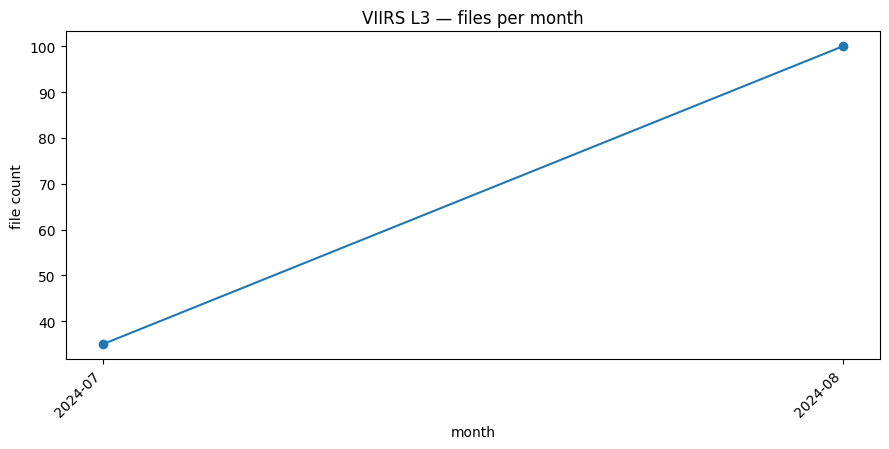

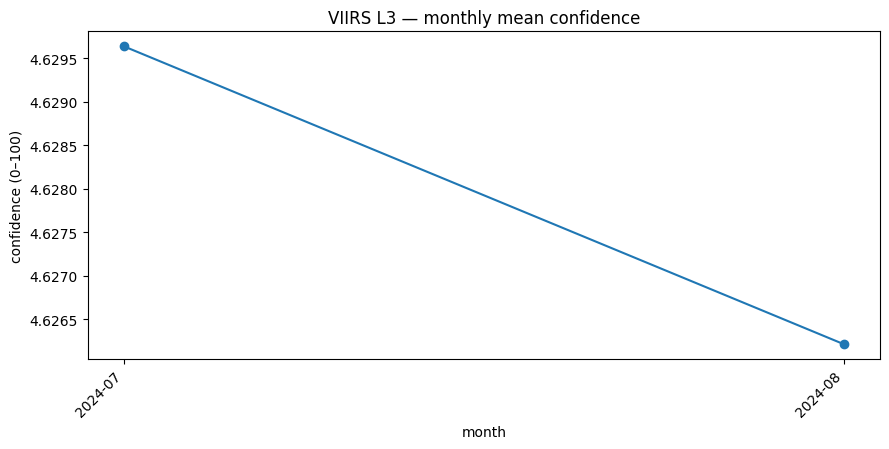

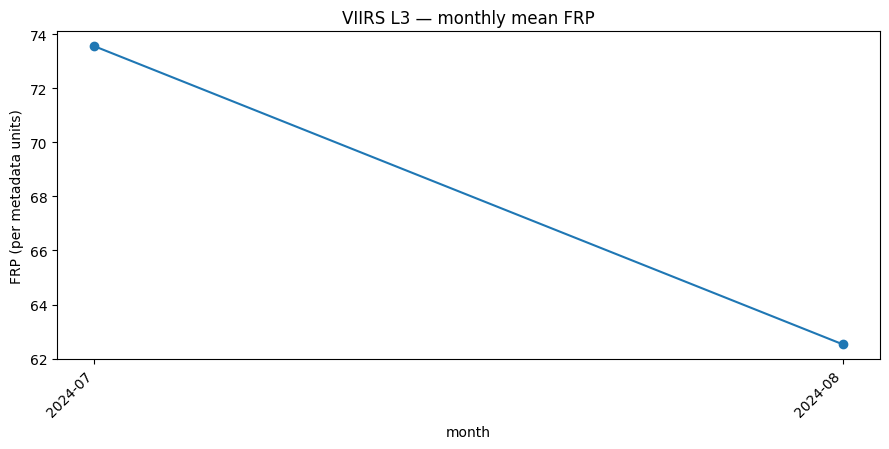

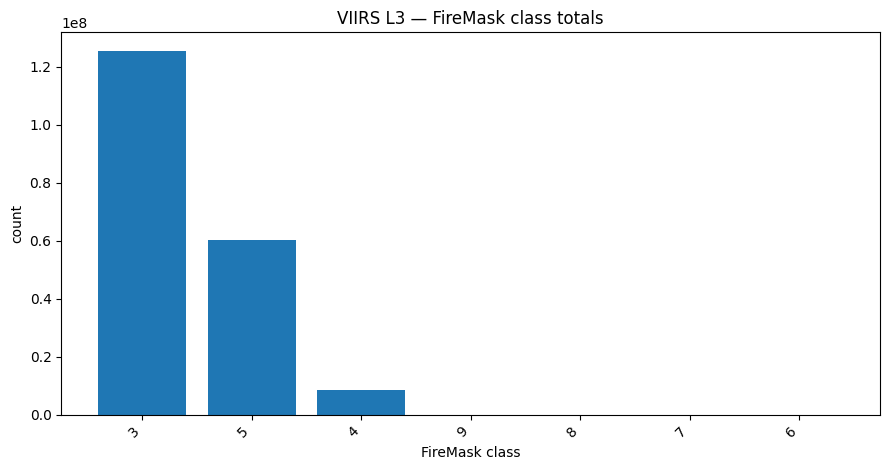

In [19]:
from pathlib import Path
from datetime import datetime, timedelta
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

META_DIR = Path(r"D:\606Data\VIIRSNPP_Thermal_Anomalies_and_Fire_Daily_L3_Global_1km_SIN_rid_V002\VIIRS_L3__metadata")
OUTDIR   = META_DIR.parent / "_eda"
OUTDIR.mkdir(exist_ok=True, parents=True)

meta_csv = META_DIR / "viirs_l3_file_summary.csv"
vals_csv = META_DIR / "viirs_l3_value_counts.csv" 

print("Reading metadata:", meta_csv)
meta = pd.read_csv(meta_csv)

vals = None
if vals_csv.exists():
    print("Reading value/class counts:", vals_csv)
    vals = pd.read_csv(vals_csv)
else:
    print("No value/class counts file found (skipping class histograms).")

def basename(x): return Path(str(x)).name

def parse_date_tile(fname: str):
    s = str(fname)
    m_date = re.search(r'\.A(\d{4})(\d{3})\.', s)  
    m_tile = re.search(r'\.h(\d{2})v(\d{2})\.', s, re.IGNORECASE)
    date = None; tile = None
    if m_date:
        year, doy = int(m_date.group(1)), int(m_date.group(2))
        date = (datetime(year,1,1) + timedelta(doy-1)).date()
    if m_tile:
        tile = f"h{int(m_tile.group(1)):02d}v{int(m_tile.group(2)):02d}"
    return date, tile

file_col = "file" if "file" in meta.columns else meta.columns[0]
meta["file_base"] = meta[file_col].astype(str).apply(basename)
meta[["date","tile"]] = meta["file_base"].apply(lambda f: pd.Series(parse_date_tile(f)))
meta["month"] = pd.to_datetime(meta["date"], errors="coerce").dt.to_period("M")

num_cols = [
    "frp_mean","frp_min","frp_max","frp_count",
    "confidence_mean","confidence_min","confidence_max","confidence_count",
    "t4_mean","t4_min","t4_max","t4_count",
    "t5_mean","t5_min","t5_max","t5_count",
]
for c in num_cols:
    if c in meta.columns:
        meta[c] = pd.to_numeric(meta[c], errors="coerce")

monthly = meta.dropna(subset=["month"]).copy()
agg = {"files": ("file_base","count")}
if "frp_mean" in monthly:          agg["frp_mean_monthly"] = ("frp_mean","mean")
if "frp_min" in monthly:           agg["frp_min_monthly"]  = ("frp_min","mean")
if "frp_max" in monthly:           agg["frp_max_monthly"]  = ("frp_max","mean")
if "confidence_mean" in monthly:   agg["conf_mean_monthly"] = ("confidence_mean","mean")

by_month = (monthly.groupby("month")
                    .agg(**agg)
                    .reset_index()
                    .sort_values("month"))

top_tiles = pd.DataFrame()
if "tile" in monthly.columns and not monthly["tile"].isna().all():
    agg_tile = {"files": ("file_base","count")}
    if "frp_mean" in monthly: agg_tile["frp_mean"] = ("frp_mean","mean")
    top_tiles = (monthly.dropna(subset=["tile"])
                        .groupby("tile")
                        .agg(**agg_tile)
                        .reset_index()
                        .sort_values(["files"], ascending=False)
                        .head(25))

class_overall = pd.DataFrame()
class_monthly = pd.DataFrame()
if isinstance(vals, pd.DataFrame) and not vals.empty:
    rename_map = {}
    for want in ["file","variable","value","count"]:
        for c in vals.columns:
            if c.lower() == want:
                rename_map[c] = want
    vals = vals.rename(columns=rename_map)
    if {"value","count"}.issubset(vals.columns):
        vals["count"] = pd.to_numeric(vals["count"], errors="coerce")
        vals = vals.dropna(subset=["count"])
        class_overall = (vals.groupby("value")["count"].sum()
                           .reset_index()
                           .sort_values("count", ascending=False))
        # link each value row back to a month via filename
        if "file" in vals.columns:
            key = meta[["file_base","month"]].copy()
            tmp = vals.copy()
            tmp["file_base"] = tmp["file"].astype(str).apply(basename)
            vm = tmp.merge(key, on="file_base", how="left").dropna(subset=["month"])
            class_monthly = (vm.groupby(["month","value"])["count"].sum()
                               .reset_index()
                               .sort_values(["month","count"], ascending=[True, False]))

out_month   = OUTDIR / "VIIRS_L3_monthly_summary.csv"
out_tiles   = OUTDIR / "VIIRS_L3_top_tiles.csv"
out_classes = OUTDIR / "VIIRS_L3_class_counts_overall.csv"
out_classes_m = OUTDIR / "VIIRS_L3_class_counts_by_month.csv"

by_month.to_csv(out_month, index=False)
if not top_tiles.empty:      top_tiles.to_csv(out_tiles, index=False)
if not class_overall.empty:  class_overall.to_csv(out_classes, index=False)
if not class_monthly.empty:  class_monthly.to_csv(out_classes_m, index=False)

print("\nSaved:")
print(" -", out_month)
print(" -", (out_tiles if not top_tiles.empty else "(no tiles CSV)"))
print(" -", (out_classes if not class_overall.empty else "(no class CSV)"))
print(" -", (out_classes_m if not class_monthly.empty else "(no class-by-month CSV)"))

print("\nMonthly summary:")
display(by_month.head(20))
if not top_tiles.empty:
    print("\nTop tiles:")
    display(top_tiles.head(20))
if not class_overall.empty:
    print("\nFireMask class totals (overall):")
    display(class_overall.head(20))
if not class_monthly.empty:
    print("\nFireMask class totals by month:")
    display(class_monthly.head(20))

if not by_month.empty:
    plt.figure(figsize=(9,4.6))
    plt.plot(by_month["month"].astype(str), by_month["files"], marker="o")
    plt.title("VIIRS L3 — files per month")
    plt.xlabel("month"); plt.ylabel("file count")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

    if "conf_mean_monthly" in by_month.columns:
        plt.figure(figsize=(9,4.6))
        plt.plot(by_month["month"].astype(str), by_month["conf_mean_monthly"], marker="o")
        plt.title("VIIRS L3 — monthly mean confidence")
        plt.xlabel("month"); plt.ylabel("confidence (0–100)")
        plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

    if "frp_mean_monthly" in by_month.columns:
        plt.figure(figsize=(9,4.6))
        plt.plot(by_month["month"].astype(str), by_month["frp_mean_monthly"], marker="o")
        plt.title("VIIRS L3 — monthly mean FRP")
        plt.xlabel("month"); plt.ylabel("FRP (per metadata units)")
        plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

if not class_overall.empty:
    plt.figure(figsize=(9,4.8))
    plt.bar(class_overall["value"].astype(str), class_overall["count"].astype(int))
    plt.title("VIIRS L3 — FireMask class totals")
    plt.xlabel("FireMask class"); plt.ylabel("count")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()
